# CAR PRICE PREDICTION

With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some
cars are in demand hence making them costly and some are not in demand hence cheaper. One
of our clients works with small traders, who sell used cars. With the change in market due to covid
19 impact, our client is facing problems with their previous car price valuation machine learning
models. So, they are looking for new machine learning models from new data. We have to make
car price valuation model. This project contains two phases.

## Data Collection Phase:-

We have to scrape at least 5000 used cars data. You can scrape more data as well, it’s up to you.
more the data better the model.
In this section we need to scrape the data of used cars from websites (Olx, cardekho, Cars24
etc.) You need web scraping for this. We have to fetch data for different locations. The number of
columns for data doesn’t have limit, it’s up to you and your creativity. Generally, these columns are
Brand, model, variant, manufacturing year, driven kilometers, fuel, number of owners, location and
at last target variable Price of the car. This data is to give you a hint about important variables in
used car model. You can make changes to it, you can add or you can remove some columns, it
completely depends on the website from which you are fetching the data.
Try to include all types of cars in your data for example- SUV, Sedans, Coupe, minivan,
Hatchback.

## Model Building Phase:-

After collecting the data, you need to build a machine learning model. Before model building do all
data pre-processing steps. Try different models with different hyper parameters and select the best
model.

Follow the complete life cycle of data science. Include all the steps like.

### 1. Data Cleaning
### 2. Exploratory Data Analysis
### 3. Data Pre-processing
### 4. Model Building
### 5. Model Evaluation
### 6. Selecting the best model

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing the data
cars = pd.read_csv('CARSS_price_csv')
cars.head()

Car_Brand     Model Variant  Manufacturing_Year   Location Fuel_type  \
0       BMW        X3  XDRIVE                2013  GHAZIABAD    Diesel   
1   Renault      Kwid     RXL                2016  GHAZIABAD    Petrol   
2    Toyota  Fortuner     2.8                2018  GHAZIABAD    Diesel   
3      Tata     NEXON     XZA                2021  GHAZIABAD    Petrol   
4      Tata     NEXON      XE                2019  GHAZIABAD    Petrol   

  Transmission previous_owners Accidental_History Kilometers_Travelled  \
0    AUTOMATIC       2nd Owner     Non-Accidental               71,479   
1       MANUAL       2nd Owner     Non-Accidental               33,139   
2    AUTOMATIC       1st Owner     Non-Accidental               86,175   
3    AUTOMATIC       1st Owner     Non-Accidental                8,730   
4       MANUAL       1st Owner     Non-Accidental               22,353   

   Length      Price                              Airbags  
0  4648.0  10,24,000                                  NaN  
1  3679.0   2,40,000                                  NaN  
2  3993.0  28,01,000  2 Airbags (Driver, Front Passenger)  
3  3993.0  11,08,000  2 Airbags (Driver, Front Passenger)  
4  3679.0   6,20,000                    1 Airbag (Driver)

In [3]:
# We another csv file
cars_an =  pd.read_csv('carz_price.csv')
cars_an.head()

Car_Brand   Model Variant  Manufacturing_Year Location Fuel_type  \
0       KIA  SELTOS     HTK                2020    DELHI    Petrol   
1   Hyundai   Grand     i10                2018    DELHI    Petrol   
2    Maruti   Swift   Dzire                2010    DELHI    Petrol   
3       KIA  SELTOS     HTK                2020    DELHI    Petrol   
4   Hyundai     i20   MAGNA                2011    DELHI    Petrol   

  Transmission previous_owners Accidental_History Kilometers_Travelled  \
0       MANUAL       1st Owner     Non-Accidental                4,804   
1       MANUAL       1st Owner     Non-Accidental                5,505   
2       MANUAL       1st Owner     Non-Accidental               29,766   
3       MANUAL       1st Owner     Non-Accidental               11,146   
4       MANUAL       1st Owner     Non-Accidental               41,050   

   Length      Price                              Airbags  
0    4315  12,41,000  2 Airbags (Driver, Front Passenger)  
1    3765   5,20,000                    1 Airbag (Driver)  
2    4160   2,49,000                                  NaN  
3    4315  11,41,000  2 Airbags (Driver, Front Passenger)  
4    3995   2,75,000                                  NaN

In [4]:
# Merging these two data frames using pd.concat
Cars_data = pd.concat([cars,cars_an],ignore_index=True)
# using ignore index feature to get the continuous index

In [5]:
Cars_data.shape

(4583, 13)

In [6]:
df = Cars_data.sample(frac=1).reset_index(drop=True)

In [7]:
df.head()

Car_Brand    Model Variant  Manufacturing_Year   Location Fuel_type  \
0    Maruti    Swift     VXI                2017  BANGALORE    Petrol   
1   Hyundai    Elite     i20                2019  BANGALORE    Petrol   
2    Maruti  Celerio    ZXI+                2022  HYDERABAD    Petrol   
3   Hyundai      NEW  SANTRO                2019  BANGALORE    Petrol   
4   Hyundai      NEW  SANTRO                2020     MUMBAI    Petrol   

  Transmission previous_owners Accidental_History Kilometers_Travelled  \
0       MANUAL       1st Owner     Non-Accidental               64,382   
1       MANUAL       1st Owner     Non-Accidental               22,247   
2       MANUAL       1st Owner     Non-Accidental               15,368   
3       MANUAL       1st Owner     Non-Accidental               40,607   
4    AUTOMATIC       1st Owner     Non-Accidental               13,092   

   Length     Price                              Airbags  
0  3395.0  5,88,000  2 Airbags (Driver, Front Passenger)  
1  3886.0  7,89,000                                  NaN  
2  3985.0  6,40,000  2 Airbags (Driver, Front Passenger)  
3  3731.0  5,01,000                                  NaN  
4  3971.0  5,74,000                                  NaN

In [8]:
# We have to remove the comma off the kilometers travelled and Price columns
df['Kilometers_Travelled'] = df['Kilometers_Travelled'].str.replace(',','')
df['Price'] = df['Price'].str.replace(',','')

In [9]:
# checking the dataframe again
df.sample(5)

Car_Brand   Model  Variant  Manufacturing_Year   Location     Fuel_type  \
38     Hyundai  Santro     Xing                2011  BANGALORE        Petrol   
3538     Skoda   Rapid      1.6                2019  BANGALORE        Petrol   
2309    Toyota   URBAN  CRUISER                2021  BANGALORE        Petrol   
1235   Hyundai   VENUE        S                2020    CHENNAI        Petrol   
1078    Maruti    Alto      LXI                2019  HYDERABAD  Petrol + CNG   

     Transmission previous_owners Accidental_History Kilometers_Travelled  \
38         MANUAL       2nd Owner     Non-Accidental                62166   
3538    AUTOMATIC       2nd Owner     Non-Accidental                55007   
2309       MANUAL       2nd Owner     Non-Accidental                 4287   
1235       MANUAL       1st Owner     Non-Accidental                42824   
1078       MANUAL       1st Owner     Non-Accidental                70507   

      Length    Price                              Airbags  
38    3990.0   287000                                  NaN  
3538  3430.0   904000                                  NaN  
2309  3955.0  1069000  2 Airbags (Driver, Front Passenger)  
1235  3985.0   796000  2 Airbags (Driver, Front Passenger)  
1078  3995.0   386000                                  NaN

In [10]:
# setting the plots style,grid and size
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (10,7)
plt.rcParams['figure.facecolor'] = '#FFE554'

In [11]:
# To look at all the features 
# Inorder to view all the columns while printing we are setting an option to display the maximum columns and rows
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [12]:
# looking at the first 10 rows
df.head(10)

Car_Brand    Model Variant  Manufacturing_Year   Location     Fuel_type  \
0    Maruti    Swift     VXI                2017  BANGALORE        Petrol   
1   Hyundai    Elite     i20                2019  BANGALORE        Petrol   
2    Maruti  Celerio    ZXI+                2022  HYDERABAD        Petrol   
3   Hyundai      NEW  SANTRO                2019  BANGALORE        Petrol   
4   Hyundai      NEW  SANTRO                2020     MUMBAI        Petrol   
5   Hyundai      i20  Active                2015  GHAZIABAD  Petrol + CNG   
6      Tata    NEXON      XM                2018      DELHI        Petrol   
7   Hyundai    Creta     1.6                2015  BANGALORE        Petrol   
8      Audi       A6     2.0                2015      DELHI        Petrol   
9    Maruti    Swift     VXI                2013      DELHI        Petrol   

  Transmission previous_owners Accidental_History Kilometers_Travelled  \
0       MANUAL       1st Owner     Non-Accidental                64382   
1       MANUAL       1st Owner     Non-Accidental                22247   
2       MANUAL       1st Owner     Non-Accidental                15368   
3       MANUAL       1st Owner     Non-Accidental                40607   
4    AUTOMATIC       1st Owner     Non-Accidental                13092   
5       MANUAL       2nd Owner     Non-Accidental                94372   
6       MANUAL       1st Owner     Non-Accidental                22725   
7       MANUAL       1st Owner     Non-Accidental                62665   
8    AUTOMATIC       2nd Owner     Non-Accidental                77595   
9       MANUAL       2nd Owner     Non-Accidental                51595   

   Length    Price                              Airbags  
0  3395.0   588000  2 Airbags (Driver, Front Passenger)  
1  3886.0   789000                                  NaN  
2  3985.0   640000  2 Airbags (Driver, Front Passenger)  
3  3731.0   501000                                  NaN  
4  3971.0   574000                                  NaN  
5  4390.0   496000                    1 Airbag (Driver)  
6  4270.0   721000  2 Airbags (Driver, Front Passenger)  
7  3565.0   821000  2 Airbags (Driver, Front Passenger)  
8  4456.0  1823000  2 Airbags (Driver, Front Passenger)  
9  3971.0   351000  2 Airbags (Driver, Front Passenger)

In [13]:
# looking at the last 10 rows
df.tail(10)

Car_Brand    Model  Variant  Manufacturing_Year   Location  \
4573      Maruti   Baleno    DELTA                2019      DELHI   
4574     Hyundai    VENUE      1.0                2019      DELHI   
4575  Volkswagen     Polo       GT                2019  BANGALORE   
4576     Hyundai      Eon    MAGNA                2018  BANGALORE   
4577      Maruti  Celerio      VXI                2020      DELHI   
4578      Maruti      New  Wagon-R                2019     MUMBAI   
4579     Renault   Duster      RXL                2016  BANGALORE   
4580      Maruti  Celerio      ZXI                2016     MUMBAI   
4581      Maruti    IGNIS    DELTA                2018      DELHI   
4582      Maruti    Swift    Dzire                2010  GHAZIABAD   

         Fuel_type Transmission previous_owners Accidental_History  \
4573        Petrol       MANUAL       1st Owner     Non-Accidental   
4574        Petrol    AUTOMATIC       1st Owner     Non-Accidental   
4575        Petrol    AUTOMATIC       1st Owner     Non-Accidental   
4576        Petrol       MANUAL       2nd Owner     Non-Accidental   
4577        Petrol       MANUAL       1st Owner     Non-Accidental   
4578  Petrol + CNG       MANUAL       1st Owner     Non-Accidental   
4579        Diesel    AUTOMATIC       2nd Owner     Non-Accidental   
4580        Petrol    AUTOMATIC       2nd Owner     Non-Accidental   
4581        Petrol       MANUAL       1st Owner     Non-Accidental   
4582        Petrol       MANUAL       2nd Owner     Non-Accidental   

     Kilometers_Travelled  Length    Price  \
4573                25920  3679.0   601000   
4574                16373  3995.0  1130000   
4575                75808  3955.0  1026000   
4576                13890  3585.0   391000   
4577                57696  3746.0   539000   
4578                38290  3430.0   583000   
4579                85263  3731.0   788000   
4580                28285  3985.0   413000   
4581                29535  3545.0   489000   
4582                77946  4395.0   266000   

                                                Airbags  
4573                                  1 Airbag (Driver)  
4574                2 Airbags (Driver, Front Passenger)  
4575                                  1 Airbag (Driver)  
4576                2 Airbags (Driver, Front Passenger)  
4577                                                NaN  
4578                                                NaN  
4579                                                NaN  
4580                2 Airbags (Driver, Front Passenger)  
4581                2 Airbags (Driver, Front Passenger)  
4582  4 Airbags (Driver, Front Passenger, Driver Sid...

In [14]:
# checking the info
df.info()

# It seems there are alot of null values in Airbags feature which means there are no airbags in those cars

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4583 entries, 0 to 4582
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Car_Brand             4583 non-null   object 
 1   Model                 4583 non-null   object 
 2   Variant               4583 non-null   object 
 3   Manufacturing_Year    4583 non-null   int64  
 4   Location              4582 non-null   object 
 5   Fuel_type             4583 non-null   object 
 6   Transmission          4454 non-null   object 
 7   previous_owners       4583 non-null   object 
 8   Accidental_History    4583 non-null   object 
 9   Kilometers_Travelled  4583 non-null   object 
 10  Length                4582 non-null   float64
 11  Price                 4583 non-null   object 
 12  Airbags               2544 non-null   object 
dtypes: float64(1), int64(1), object(11)
memory usage: 465.6+ KB


In [15]:
# checking the datatypes
df.dtypes

# We can see that Length and Kilometers travelled columns are in object dtype
# We need to change their datatype later

Car_Brand                object
Model                    object
Variant                  object
Manufacturing_Year        int64
Location                 object
Fuel_type                object
Transmission             object
previous_owners          object
Accidental_History       object
Kilometers_Travelled     object
Length                  float64
Price                    object
Airbags                  object
dtype: object

In [16]:
df['Price'] = df['Price'].astype('int')  
print(df.dtypes)

Car_Brand                object
Model                    object
Variant                  object
Manufacturing_Year        int64
Location                 object
Fuel_type                object
Transmission             object
previous_owners          object
Accidental_History       object
Kilometers_Travelled     object
Length                  float64
Price                     int32
Airbags                  object
dtype: object


In [17]:
## Checking Null values
df.isnull().sum()

Car_Brand                  0
Model                      0
Variant                    0
Manufacturing_Year         0
Location                   1
Fuel_type                  0
Transmission             129
previous_owners            0
Accidental_History         0
Kilometers_Travelled       0
Length                     1
Price                      0
Airbags                 2039
dtype: int64

In [18]:
df.shape

(4583, 13)

In [19]:
## plotting a heatmap

# df = np.asarray(df).reshape(13,)

# sns.heatmap(df.isnull().sum())

# I was not able to run the code to create a heatmap
# There might be special characters in the data

In [20]:
# Checking if the data is having any special characters in any of the rows and columns
# checking if any other column has blank values(' '),special characters(?,-,_) etc to make sure the data is clean
chars =[" ","?","-"," ?"," -","? ","- "," ? "," - ","NA","N/A"," NA"," N/A","N/A ",'nan ']

for i in df.columns:
    for j in chars:
        print(f"{j} in {i} = ",end= " ")
        print((df[i] == j).sum())
        
# We can see there aren't any special characters in any of the columns

# We cannot see any special characters from this

  in Car_Brand =  0
? in Car_Brand =  0
- in Car_Brand =  0
 ? in Car_Brand =  0
 - in Car_Brand =  0
?  in Car_Brand =  0
-  in Car_Brand =  0
 ?  in Car_Brand =  0
 -  in Car_Brand =  0
NA in Car_Brand =  0
N/A in Car_Brand =  0
 NA in Car_Brand =  0
 N/A in Car_Brand =  0
N/A  in Car_Brand =  0
nan  in Car_Brand =  0
  in Model =  0
? in Model =  0
- in Model =  0
 ? in Model =  0
 - in Model =  0
?  in Model =  0
-  in Model =  0
 ?  in Model =  0
 -  in Model =  0
NA in Model =  0
N/A in Model =  0
 NA in Model =  0
 N/A in Model =  0
N/A  in Model =  0
nan  in Model =  0
  in Variant =  0
? in Variant =  0
- in Variant =  0
 ? in Variant =  0
 - in Variant =  0
?  in Variant =  0
-  in Variant =  0
 ?  in Variant =  0
 -  in Variant =  0
NA in Variant =  0
N/A in Variant =  0
 NA in Variant =  0
 N/A in Variant =  0
N/A  in Variant =  0
nan  in Variant =  0
  in Manufacturing_Year =  0
? in Manufacturing_Year =  0
- in Manufacturing_Year =  0
 ? in Manufacturing_Year =  0
 - in M

In [21]:
# Let's try to check the unique values of each column
for i in df.columns:
    print('Unique values in',i,':-',df[i].unique())
    print('\n')

Unique values in Car_Brand :- ['Maruti' 'Hyundai' 'Tata' 'Audi' 'Renault' 'Honda' 'Toyota' 'Skoda'
 'Ford' 'Volkswagen' 'Datsun' 'MG' 'Mahindra' 'KIA' 'Nissan' 'Jeep'
 'MARUTI' 'BMW' 'Fiat' 'Mercedes' 'Jaguar' 'SKODA']


Unique values in Model :- ['Swift' 'Elite' 'Celerio' 'NEW' 'i20' 'NEXON' 'Creta' 'A6' 'New' 'Vitara'
 'Alto' 'IGNIS' 'i10' 'Kwid' 'ALTROZ' 'Jazz' 'Corolla' 'S' 'Rapid' 'Brio'
 'Baleno' 'Dzire' 'Santro' 'Kiger' 'Etios' 'Ecosport' 'Verna' 'Vento'
 'Safari' 'WR-V' 'Hexa' 'City' 'Redi' 'Grand' 'HECTOR' 'TUV300' 'SONET'
 'SELTOS' 'Thar' 'Eon' 'VENUE' 'Harrier' 'Wagon' 'Camry' 'Accord' 'Polo'
 'Ciaz' 'URBAN' 'Eeco' 'MAGNITE' 'GRAND' 'Tiago' 'XL6' 'XUV500' 'A'
 'Amaze' 'Captur' 'XUV' 'Ertiga' 'Bolero' 'TAIGUN' 'Duster' 'TIGOR'
 'YARIS' 'Micra' 'Scorpio' 'MARAZZO' 'Glanza' 'ASTOR' 'Innova' 'Civic'
 'KUSHAQ' 'Compass' 'BR-V' 'A3' 'BREZZA' 'Endeavour' 'Xcent' 'Zen' 'AURA'
 'Ritz' 'Ameo' 'FREESTYLE' 'TRIBER' 'Go' 'TIGUAN' 'Zest' 'OMNI' 'TIAGO'
 'XUV700' 'CARENS' '5' 'KUV' 'BOLERO

In [22]:
df['Airbags'].value_counts()

2 Airbags (Driver, Front Passenger)                                                               1931
1 Airbag (Driver)                                                                                  267
6 Airbags (Driver, Front Passenger, 2 Curtain, Driver Side, Front Passenger Side)                  196
4 Airbags (Driver, Front Passenger, Driver Side, Front Passenger Side)                              41
2 (Driver & Co-Driver)                                                                              35
7 Airbags (Driver, Front Passenger, 2 Curtain, Driver Side, Front Passenger Side, Driver Knee)      22
Yes                                                                                                 10
2 Airbags (Driver, Passenger)                                                                        7
Remote                                                                                               4
2                                                                        

In [23]:
# checking the % of null values in each column
for i in df.columns:
    print('% of null values in',i,': ',round(df[i].isnull().sum()/4583*100,1),'dtype: ',df[i].dtype)
    print('\n')
    
# We can see that there are more than 44% of null values in the Airbags column

% of null values in Car_Brand :  0.0 dtype:  object


% of null values in Model :  0.0 dtype:  object


% of null values in Variant :  0.0 dtype:  object


% of null values in Manufacturing_Year :  0.0 dtype:  int64


% of null values in Location :  0.0 dtype:  object


% of null values in Fuel_type :  0.0 dtype:  object


% of null values in Transmission :  2.8 dtype:  object


% of null values in previous_owners :  0.0 dtype:  object


% of null values in Accidental_History :  0.0 dtype:  object


% of null values in Kilometers_Travelled :  0.0 dtype:  object


% of null values in Length :  0.0 dtype:  float64


% of null values in Price :  0.0 dtype:  int32


% of null values in Airbags :  44.5 dtype:  object




In [24]:
# Now let's check the mode of the transmission column to replace it with the null values
print('Mode of',i,'is',df['Transmission'].mode())

# We can see that the mode is manual for transmission column

Mode of Airbags is 0    MANUAL
dtype: object


In [25]:
# replacing the null values in transmission using mode
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values = np.nan,strategy = 'most_frequent',verbose=0)
si = si.fit(df[['Transmission']])
# transforming the values to mode
df[['Transmission']] = si.transform(df[['Transmission']]) 

In [26]:
# checking the null values in Transmission again
df['Transmission'].isnull().sum()

# We can see there are no null values anymore

0

In [27]:
# let's check the values in airbags column
df['Airbags'].value_counts()

2 Airbags (Driver, Front Passenger)                                                               1931
1 Airbag (Driver)                                                                                  267
6 Airbags (Driver, Front Passenger, 2 Curtain, Driver Side, Front Passenger Side)                  196
4 Airbags (Driver, Front Passenger, Driver Side, Front Passenger Side)                              41
2 (Driver & Co-Driver)                                                                              35
7 Airbags (Driver, Front Passenger, 2 Curtain, Driver Side, Front Passenger Side, Driver Knee)      22
Yes                                                                                                 10
2 Airbags (Driver, Passenger)                                                                        7
Remote                                                                                               4
2                                                                        

In [28]:
# first let's rename the values or just give only the number of airbags present in the car
# Here for some cars the specific number of airbags are not mentioned so let's make them 2
airbag_values = ['2 Airbags (Driver, Front Passenger','2 (Driver & Co-Driver)','2 Airbags (Driver, Passenger)','Remote','Fabric','Vinyl','With Key','Yes']
for i in airbag_values:
    df['Airbags'] = df['Airbags'].replace({i:2})

In [29]:
# checking the values
df['Airbags'].head()

0    2 Airbags (Driver, Front Passenger)
1                                    NaN
2    2 Airbags (Driver, Front Passenger)
3                                    NaN
4                                    NaN
Name: Airbags, dtype: object

In [30]:
df['Airbags'].replace({'2 Airbags (Driver, Front Passenger)':2},inplace = True)

In [31]:
df['Airbags'].value_counts()

2                                                                                                 1996
1 Airbag (Driver)                                                                                  267
6 Airbags (Driver, Front Passenger, 2 Curtain, Driver Side, Front Passenger Side)                  196
4 Airbags (Driver, Front Passenger, Driver Side, Front Passenger Side)                              41
7 Airbags (Driver, Front Passenger, 2 Curtain, Driver Side, Front Passenger Side, Driver Knee)      22
2                                                                                                    4
1 (Driver Only)                                                                                      4
6 Airbags                                                                                            3
1                                                                                                    3
7 Airbags                                                                

In [32]:
# Now let's change the other values as well
df['Airbags'].replace({'1 Airbag (Driver)':1},inplace = True)

df['Airbags'].replace({'6 Airbags (Driver, Front Passenger, 2 Curtain, Driver Side, Front Passenger Side)':6},inplace = True)

df['Airbags'].replace({'4 Airbags (Driver, Front Passenger, Driver Side, Front Passenger Side)':4},inplace = True)

df['Airbags'].replace({'7 Airbags (Driver, Front Passenger, 2 Curtain, Driver Side, Front Passenger Side, Driver Knee)':7},inplace = True)

df['Airbags'].replace({'1 (Driver Only)':1},inplace = True)

df['Airbags'].replace({'6 Airbags':6},inplace = True)

df['Airbags'].replace({'3 Airbags':3},inplace = True)

df['Airbags'].replace({'6 Airbags (Driver, Passenger, 2 Curtain, Driver Side, Front Passenger Side)':6},inplace = True)

df['Airbags'].replace({'7 Airbags':7},inplace = True)


In [33]:
# Checking the values again
df['Airbags'].value_counts()

2    1996
1     271
6     201
4      41
7      24
2       4
1       3
3       2
4       2
Name: Airbags, dtype: int64

In [34]:
df['Airbags'].isnull().sum()

2039

In [35]:
df['Airbags'].dtype

dtype('O')

In [36]:
# Let's use random imputation method
# writing a function to try imputing using median and random imputation methods
def impute_nan(df,feature,median):
    df[feature+'median'] = df[feature].fillna(median)
    df[feature+'random'] = df[feature]
    
    random_sample = df[feature].dropna().sample(df['Airbags'].isnull().sum(),random_state=0)
    # below here if want to merge the data the indexes have to be same so we are giving 
    random_sample.index = df[df[feature].isnull()].index
    
    df.loc[df[feature].isnull(),feature+'random'] = random_sample
    

In [37]:
median = df['Airbags'].median()
median

2.0

In [38]:
impute_nan(df,'Airbags',median)

In [39]:
df.isnull().sum()

Car_Brand                  0
Model                      0
Variant                    0
Manufacturing_Year         0
Location                   1
Fuel_type                  0
Transmission               0
previous_owners            0
Accidental_History         0
Kilometers_Travelled       0
Length                     1
Price                      0
Airbags                 2039
Airbagsmedian              0
Airbagsrandom              0
dtype: int64

In [40]:
# Let's remove the Airbagsmedian and Airbags columns as we have used random imputation
df.drop(['Airbags','Airbagsmedian'],axis=1,inplace=True)

In [41]:
# And let's drop the null values if there are any
df = df.dropna()

In [42]:
## Checking the null values again
df.isnull().sum()

Car_Brand               0
Model                   0
Variant                 0
Manufacturing_Year      0
Location                0
Fuel_type               0
Transmission            0
previous_owners         0
Accidental_History      0
Kilometers_Travelled    0
Length                  0
Price                   0
Airbagsrandom           0
dtype: int64

In [43]:
# Let's drop the duplicates 
duplicates = df[df.duplicated()]
duplicates

# There are no duplicates 

Empty DataFrame
Columns: [Car_Brand, Model, Variant, Manufacturing_Year, Location, Fuel_type, Transmission, previous_owners, Accidental_History, Kilometers_Travelled, Length, Price, Airbagsrandom]
Index: []

In [44]:
# let's check datatypes again
df.dtypes

Car_Brand                object
Model                    object
Variant                  object
Manufacturing_Year        int64
Location                 object
Fuel_type                object
Transmission             object
previous_owners          object
Accidental_History       object
Kilometers_Travelled     object
Length                  float64
Price                     int32
Airbagsrandom            object
dtype: object

In [45]:
# let's change the Airbags random datatype
df['Airbagsrandom'] = df['Airbagsrandom'].astype('int')
df['Airbagsrandom'].dtype

# It has been changed

dtype('int32')

In [46]:
df.head(4)

Car_Brand    Model Variant  Manufacturing_Year   Location Fuel_type  \
0    Maruti    Swift     VXI                2017  BANGALORE    Petrol   
1   Hyundai    Elite     i20                2019  BANGALORE    Petrol   
2    Maruti  Celerio    ZXI+                2022  HYDERABAD    Petrol   
3   Hyundai      NEW  SANTRO                2019  BANGALORE    Petrol   

  Transmission previous_owners Accidental_History Kilometers_Travelled  \
0       MANUAL       1st Owner     Non-Accidental                64382   
1       MANUAL       1st Owner     Non-Accidental                22247   
2       MANUAL       1st Owner     Non-Accidental                15368   
3       MANUAL       1st Owner     Non-Accidental                40607   

   Length   Price  Airbagsrandom  
0  3395.0  588000              2  
1  3886.0  789000              2  
2  3985.0  640000              2  
3  3731.0  501000              2

In [66]:
df['Kilometers_Travelled'] = df['Kilometers_Travelled'].astype('float')
df['Kilometers_Travelled'].dtype

dtype('float64')

In [67]:
df.dtypes

Car_Brand                object
Model                    object
Variant                  object
Manufacturing_Year        int64
Location                 object
Fuel_type                object
Transmission             object
previous_owners          object
Kilometers_Travelled    float64
Length                  float64
Price                     int32
Airbagsrandom             int32
Age                       int64
dtype: object

## EDA

In [68]:
# Description of the data
df.describe().T

# There can be outliers in the data
# And Skewness might also present

count           mean            std       min  \
Manufacturing_Year    4581.0    2017.691770       2.695086    2009.0   
Kilometers_Travelled  4581.0   39843.854180   25160.384801      64.0   
Length                4581.0    3909.930146     383.239564       2.0   
Price                 4581.0  696671.358437  351691.677282  131000.0   
Airbagsrandom         4581.0       2.296005       1.266689       1.0   
Age                   4581.0       4.308230       2.695086       0.0   

                           25%       50%       75%        max  
Manufacturing_Year      2016.0    2018.0    2020.0     2022.0  
Kilometers_Travelled   19655.0   35689.0   57337.0   455601.0  
Length                  3655.0    3985.0    3995.0     4961.0  
Price                 451000.0  606000.0  863000.0  2984000.0  
Airbagsrandom              2.0       2.0       2.0        7.0  
Age                        2.0       4.0       6.0       13.0

In [69]:
df.describe(include='O')


Car_Brand Model Variant   Location Fuel_type Transmission  \
count       4581  4581    4581       4581      4581         4581   
unique        22   109     183          6         3            2   
top       Maruti  Alto     VXI  GHAZIABAD    Petrol       MANUAL   
freq        1960   351     328       1234      3571         3773   

       previous_owners  
count             4581  
unique               3  
top          1st Owner  
freq              3615

In [70]:
# Let's see the number of unique values in each column
for i in df.columns:
    print('Number of Unique Values in',i,':-',df[i].nunique())

Number of Unique Values in Car_Brand :- 22
Number of Unique Values in Model :- 109
Number of Unique Values in Variant :- 183
Number of Unique Values in Manufacturing_Year :- 14
Number of Unique Values in Location :- 6
Number of Unique Values in Fuel_type :- 3
Number of Unique Values in Transmission :- 2
Number of Unique Values in previous_owners :- 3
Number of Unique Values in Kilometers_Travelled :- 3519
Number of Unique Values in Length :- 112
Number of Unique Values in Price :- 1213
Number of Unique Values in Airbagsrandom :- 6
Number of Unique Values in Age :- 14


In [71]:
# We can observe taht Accidental History has 1 unique feature which says that all these cars have never met with any accident
# We can drop this feature because it is not useful for model building
df.drop(['Accidental_History'],axis=1,inplace=True)

# Already deleted it so showing error

KeyError: "['Accidental_History'] not found in axis"

In [51]:
# Now we can extract new features using some columns in the data
# Let's create a new column which shows the age of vehicle using the Manufacturing_Year
# Subtracting the current year(2022) and the Manufacturing_Year of the vehicle gives us the Age
df['Age'] = 2022 - df['Manufacturing_Year'] 

In [52]:
df['Age'].head()

0    5
1    3
2    0
3    3
4    2
Name: Age, dtype: int64

In [53]:
df['Model'].unique()

array(['Swift', 'Elite', 'Celerio', 'NEW', 'i20', 'NEXON', 'Creta', 'A6',
       'New', 'Vitara', 'Alto', 'IGNIS', 'i10', 'Kwid', 'ALTROZ', 'Jazz',
       'Corolla', 'S', 'Rapid', 'Brio', 'Baleno', 'Dzire', 'Santro',
       'Kiger', 'Etios', 'Ecosport', 'Verna', 'Vento', 'Safari', 'WR-V',
       'Hexa', 'City', 'Redi', 'Grand', 'HECTOR', 'TUV300', 'SONET',
       'SELTOS', 'Thar', 'Eon', 'VENUE', 'Harrier', 'Wagon', 'Camry',
       'Accord', 'Polo', 'Ciaz', 'URBAN', 'Eeco', 'MAGNITE', 'GRAND',
       'Tiago', 'XL6', 'XUV500', 'A', 'Amaze', 'Captur', 'XUV', 'Ertiga',
       'Bolero', 'TAIGUN', 'Duster', 'TIGOR', 'YARIS', 'Scorpio',
       'MARAZZO', 'Glanza', 'ASTOR', 'Innova', 'Civic', 'KUSHAQ',
       'Compass', 'BR-V', 'A3', 'BREZZA', 'Endeavour', 'Xcent', 'Zen',
       'AURA', 'Ritz', 'Micra', 'Ameo', 'FREESTYLE', 'TRIBER', 'Go',
       'TIGUAN', 'Zest', 'OMNI', 'TIAGO', 'XUV700', 'CARENS', '5', 'KUV',
       'BOLERO', 'Terrano', 'Figo', 'Octavia', 'Tucson', 'Fortuner',
       'Kuv1

In [72]:
# Now let's seperate the columns according to their datatype
# seperating catregorical columns
cat_cols = df.dtypes[df.dtypes == 'object'].index.tolist()
cat_cols

['Car_Brand',
 'Model',
 'Variant',
 'Location',
 'Fuel_type',
 'Transmission',
 'previous_owners']

In [73]:
# Continuous or discrete continuous columns
cont_cols = df.dtypes[df.dtypes != 'object'].index.tolist()
cont_cols

['Manufacturing_Year',
 'Kilometers_Travelled',
 'Length',
 'Price',
 'Airbagsrandom',
 'Age']

## Univariate Analysis

Maruti        1960
Hyundai       1149
Honda          397
Tata           208
Renault        207
Mahindra       123
Ford           113
Toyota         100
KIA             94
Volkswagen      69
Skoda           44
MG              35
Datsun          34
Nissan          14
Jeep            14
Audi             6
MARUTI           6
BMW              2
Mercedes         2
Jaguar           2
Fiat             1
SKODA            1
Name: Car_Brand, dtype: int64


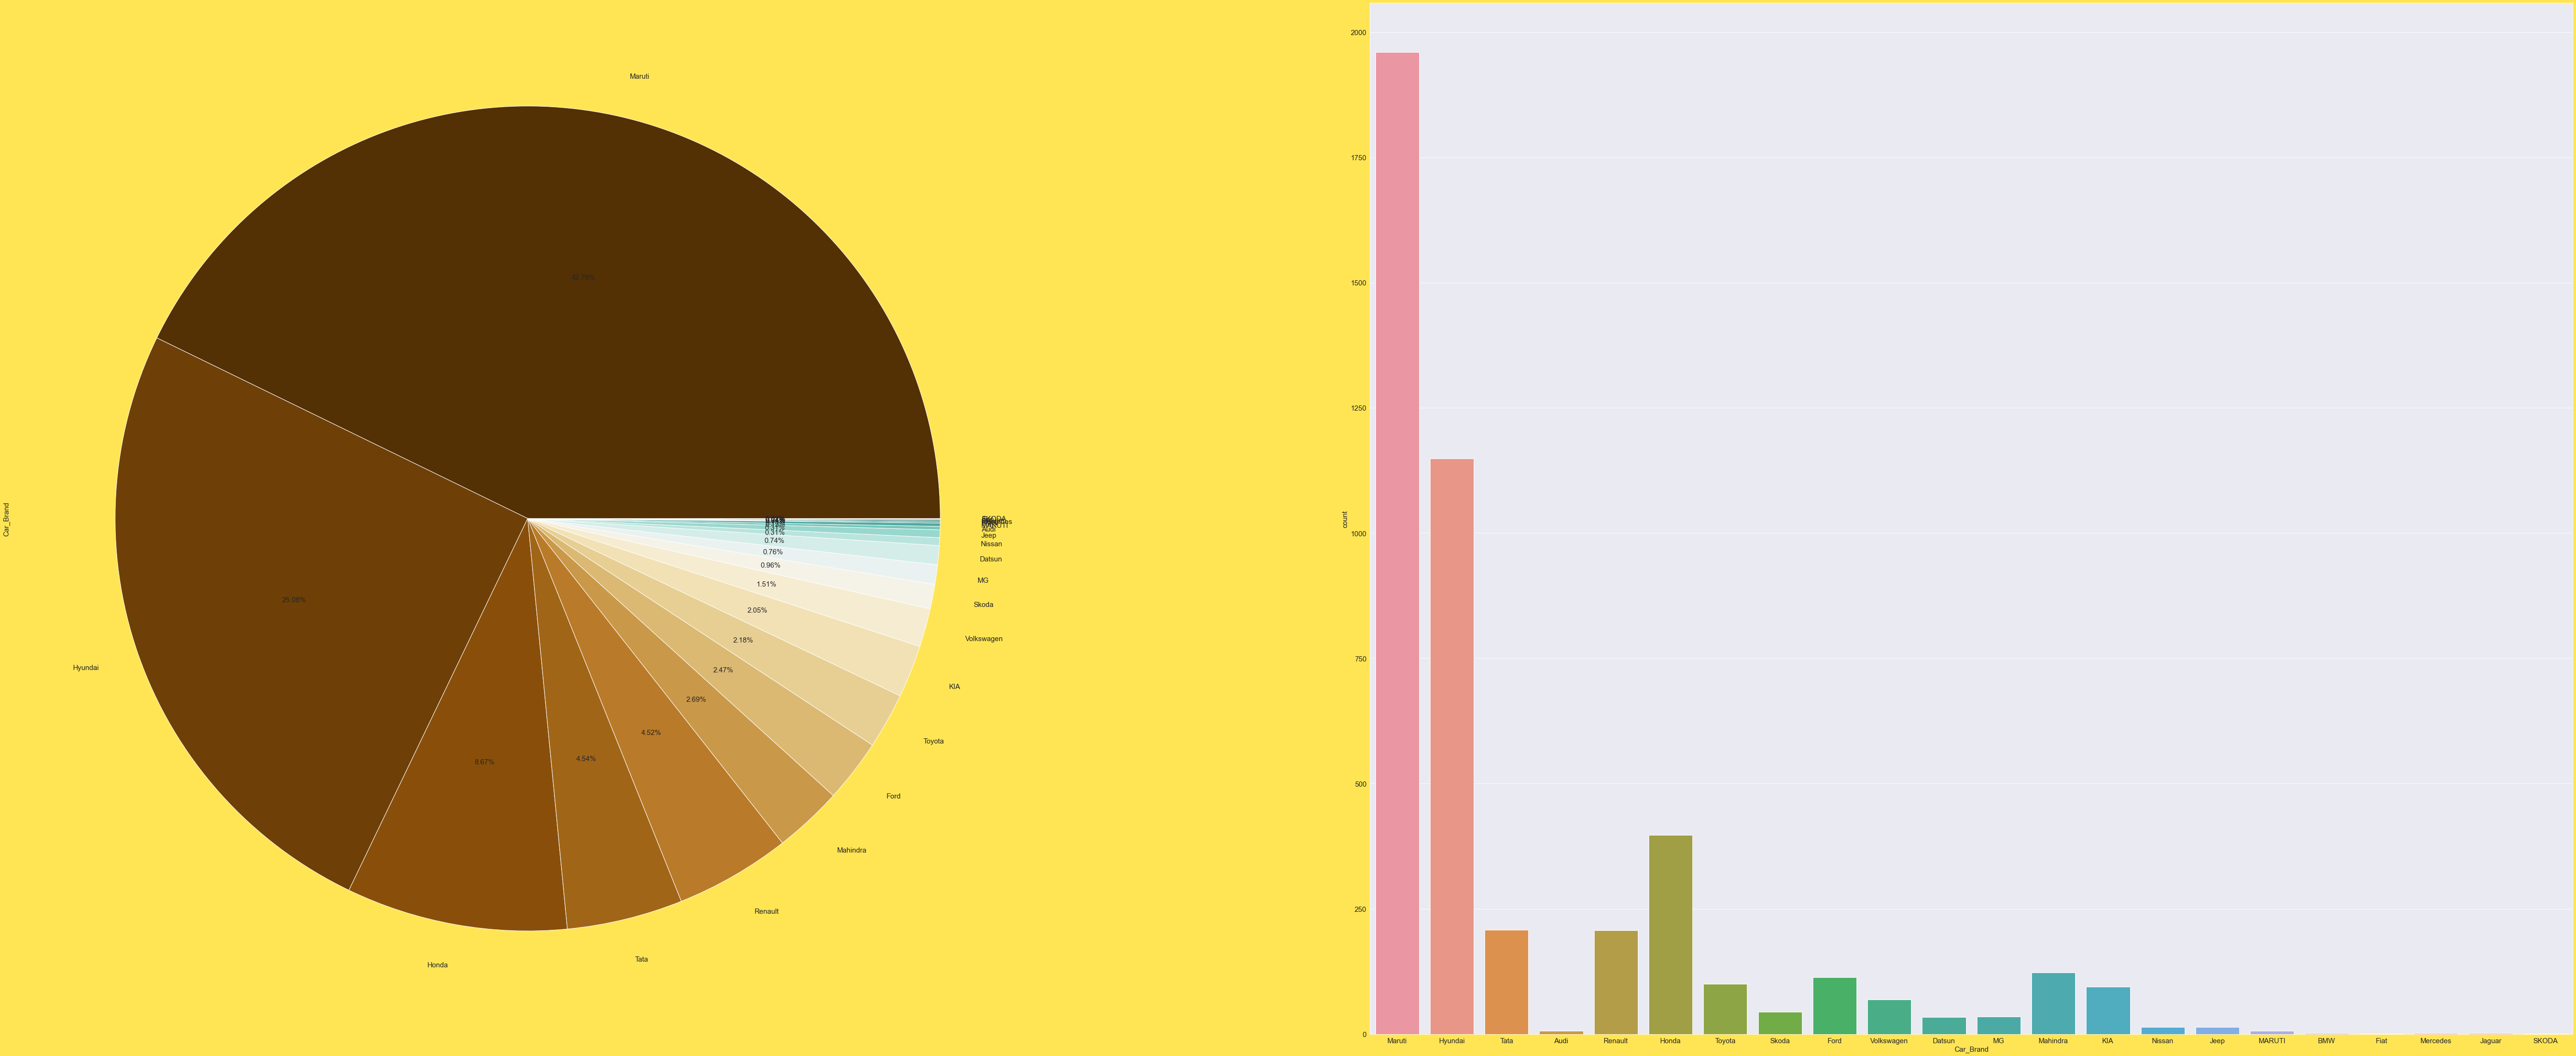

Alto         351
Swift        288
Baleno       253
Grand        230
Elite        209
New          193
Creta        190
Wagon        184
City         163
Celerio      143
S            130
Kwid         117
Ciaz         108
Vitara       105
Ecosport      92
NEW           90
Dzire         82
i10           82
Amaze         81
VENUE         79
Verna         77
Jazz          64
SELTOS        59
NEXON         56
IGNIS         52
GRAND         51
Tiago         50
Eon           43
Duster        42
Polo          40
i20           40
Brio          40
ALTROZ        38
Rapid         36
WR-V          35
Harrier       34
SONET         33
HECTOR        33
Redi          29
XUV500        28
Kiger         26
Corolla       26
YARIS         26
Ertiga        26
Thar          23
Scorpio       22
URBAN         21
XUV           21
AURA          18
Ritz          18
Vento         18
Xcent         16
Eeco          14
Compass       14
TIGOR         12
TRIBER        11
XL6           10
FREESTYLE     10
Etios         

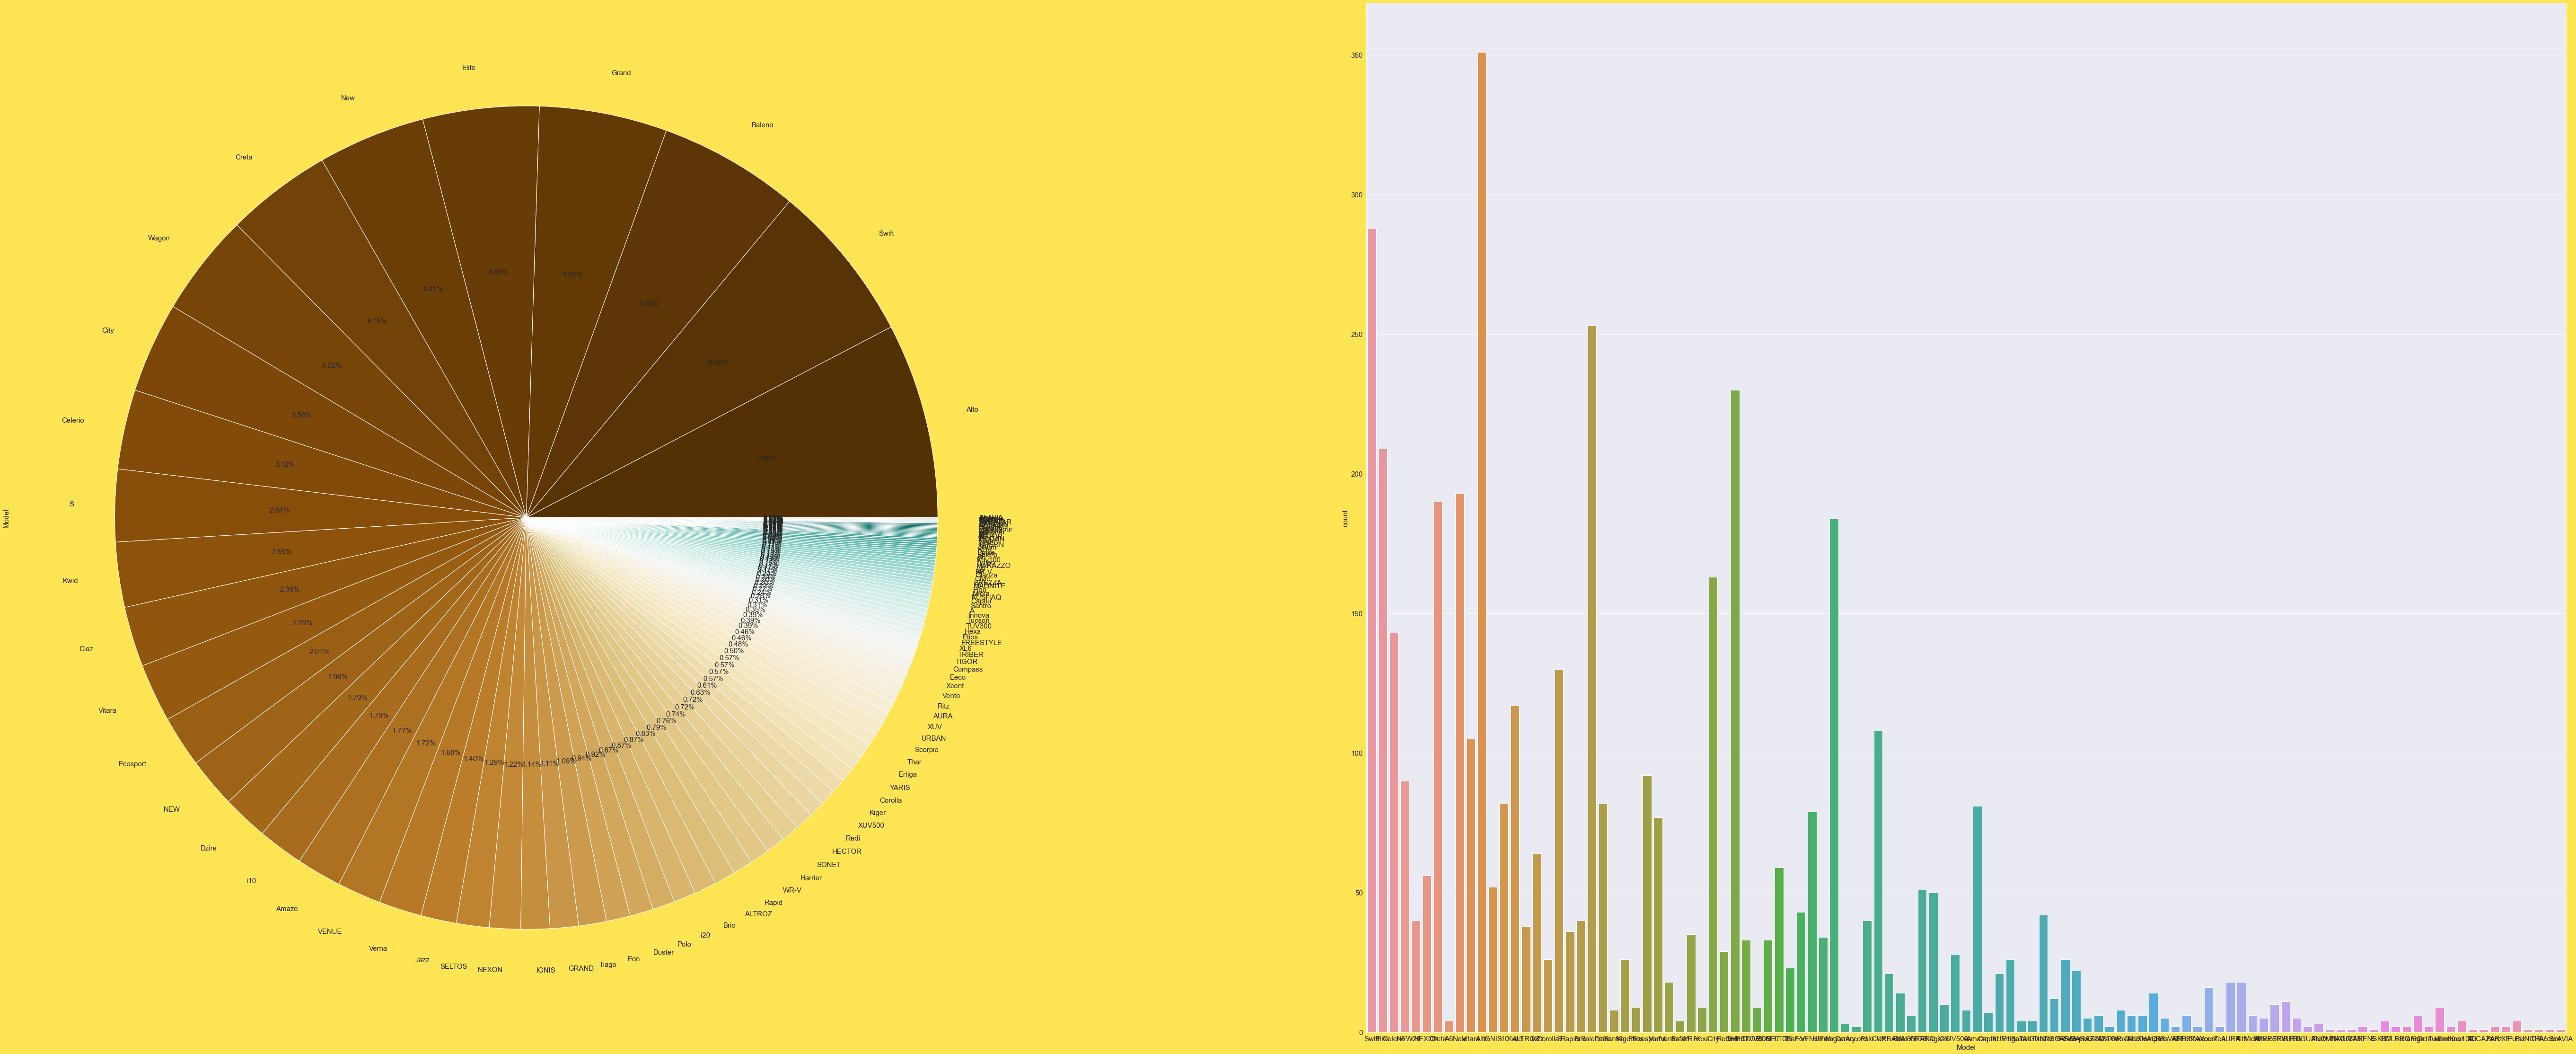

VXI             328
i10             230
i20             209
1.2             204
1.6             196
Wagon-R         185
R               184
DELTA           163
800             141
ZXI             127
K10             121
1.5             118
Brezza          105
LXI             100
ZETA             96
PRESSO           86
ALPHA            85
1.0              84
MAGNA            77
V                73
XZ               71
Dzire            70
SANTRO           70
S                63
VX               59
I10              51
SPORTZ           51
RXZ              47
Cross            44
RXL              38
SIGMA            36
FLUIDIC          35
RXT              32
HTK              31
GTX              31
XZA              31
ZX               31
XZ+              30
Go               29
1.4              27
Altis            26
SHARP            25
ZDI              22
LX               21
SX               21
3OO              21
VDI              20
CRUISER          20
I20              20
COMFORTLINE      19


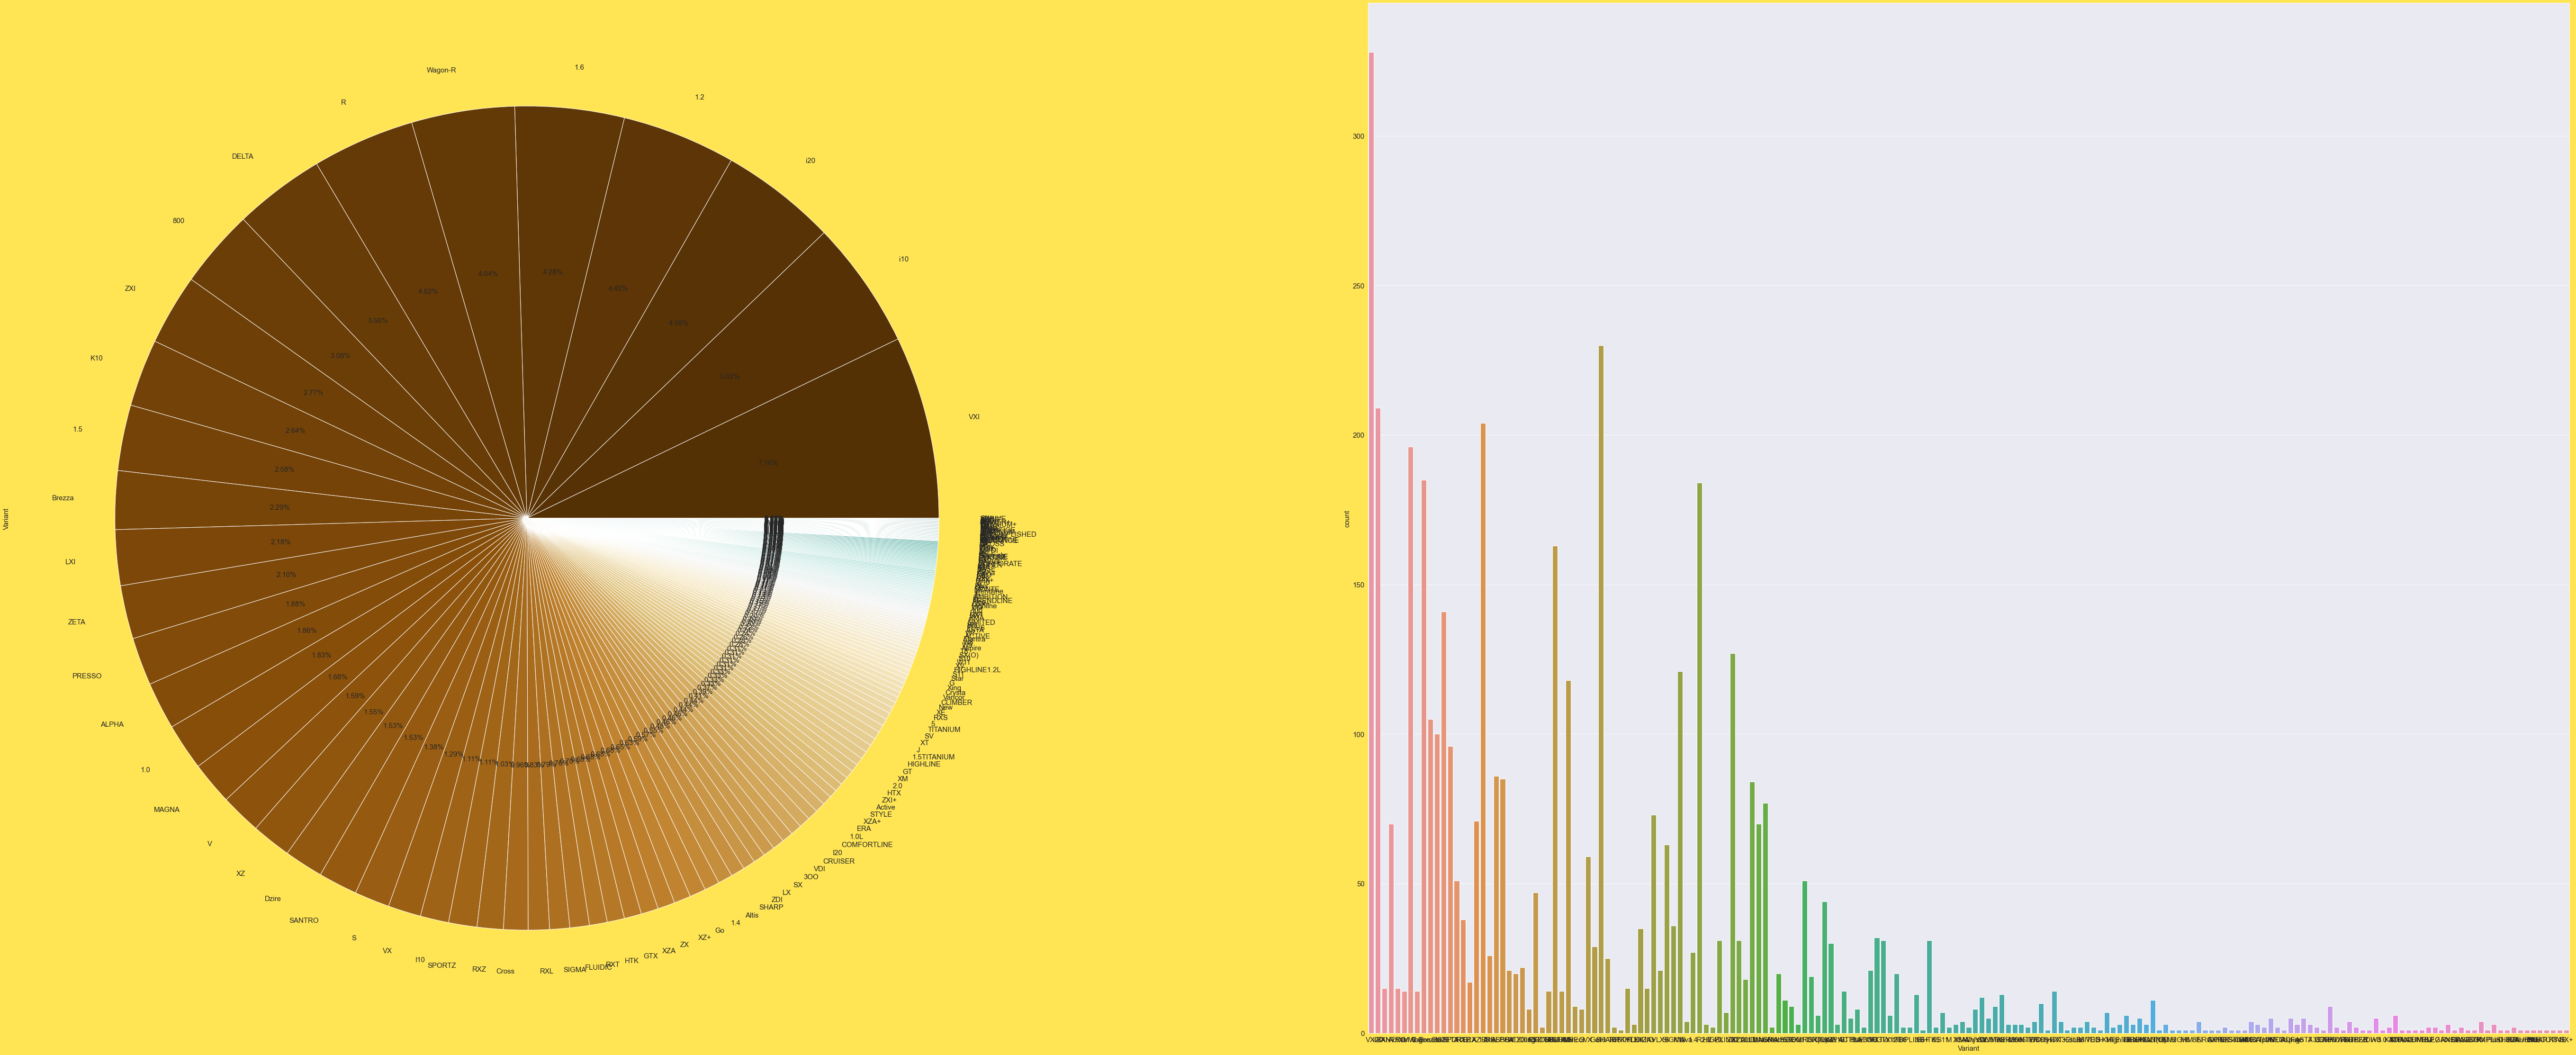

GHAZIABAD    1234
BANGALORE    1076
DELHI        1041
MUMBAI        625
HYDERABAD     582
CHENNAI        23
Name: Location, dtype: int64


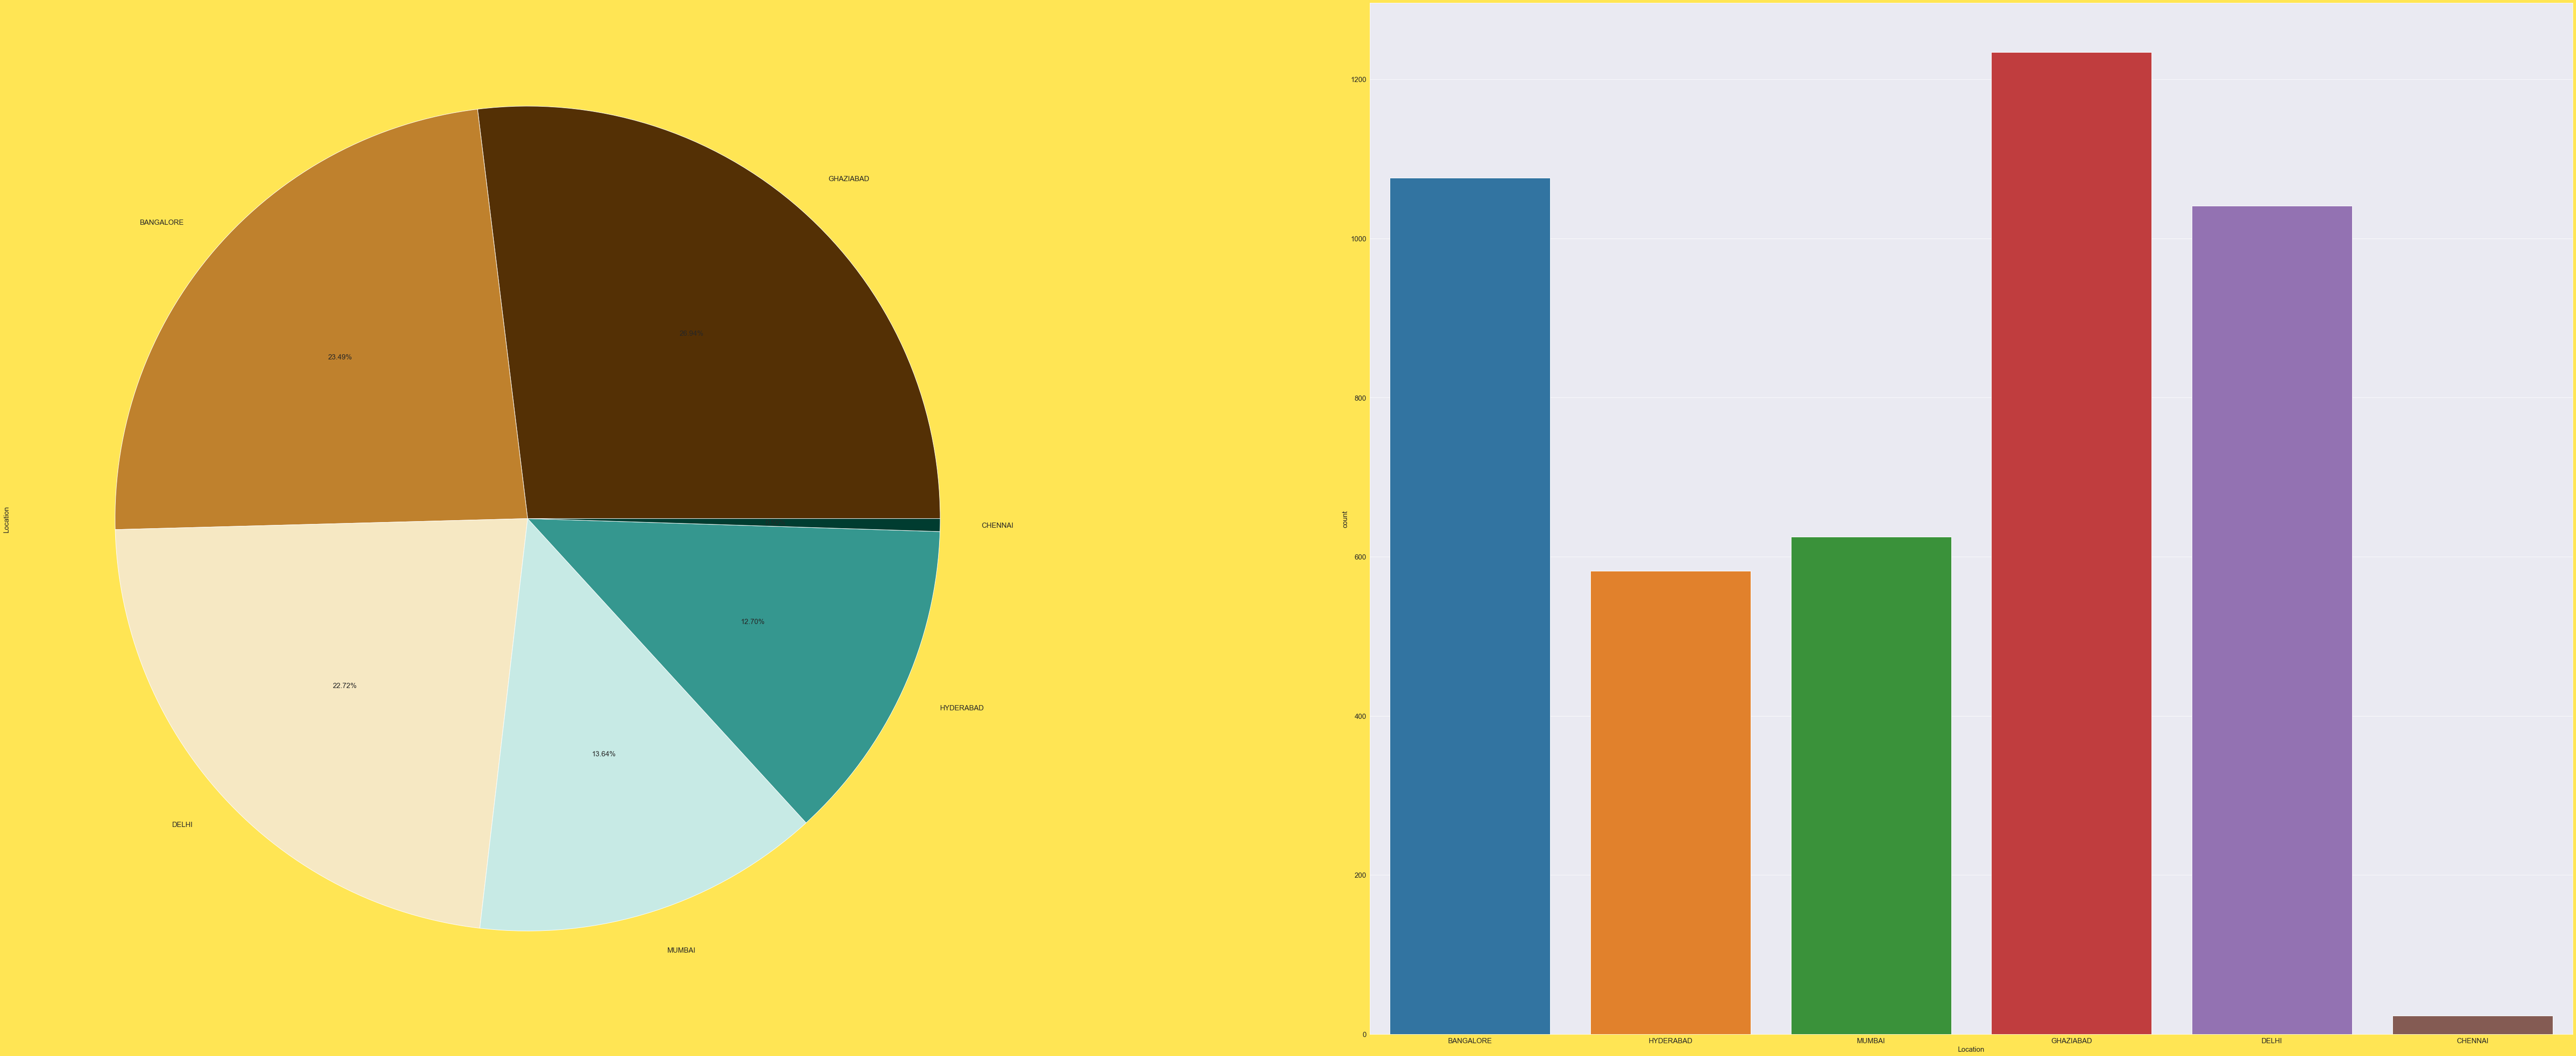

Petrol          3571
Diesel           641
Petrol + CNG     369
Name: Fuel_type, dtype: int64


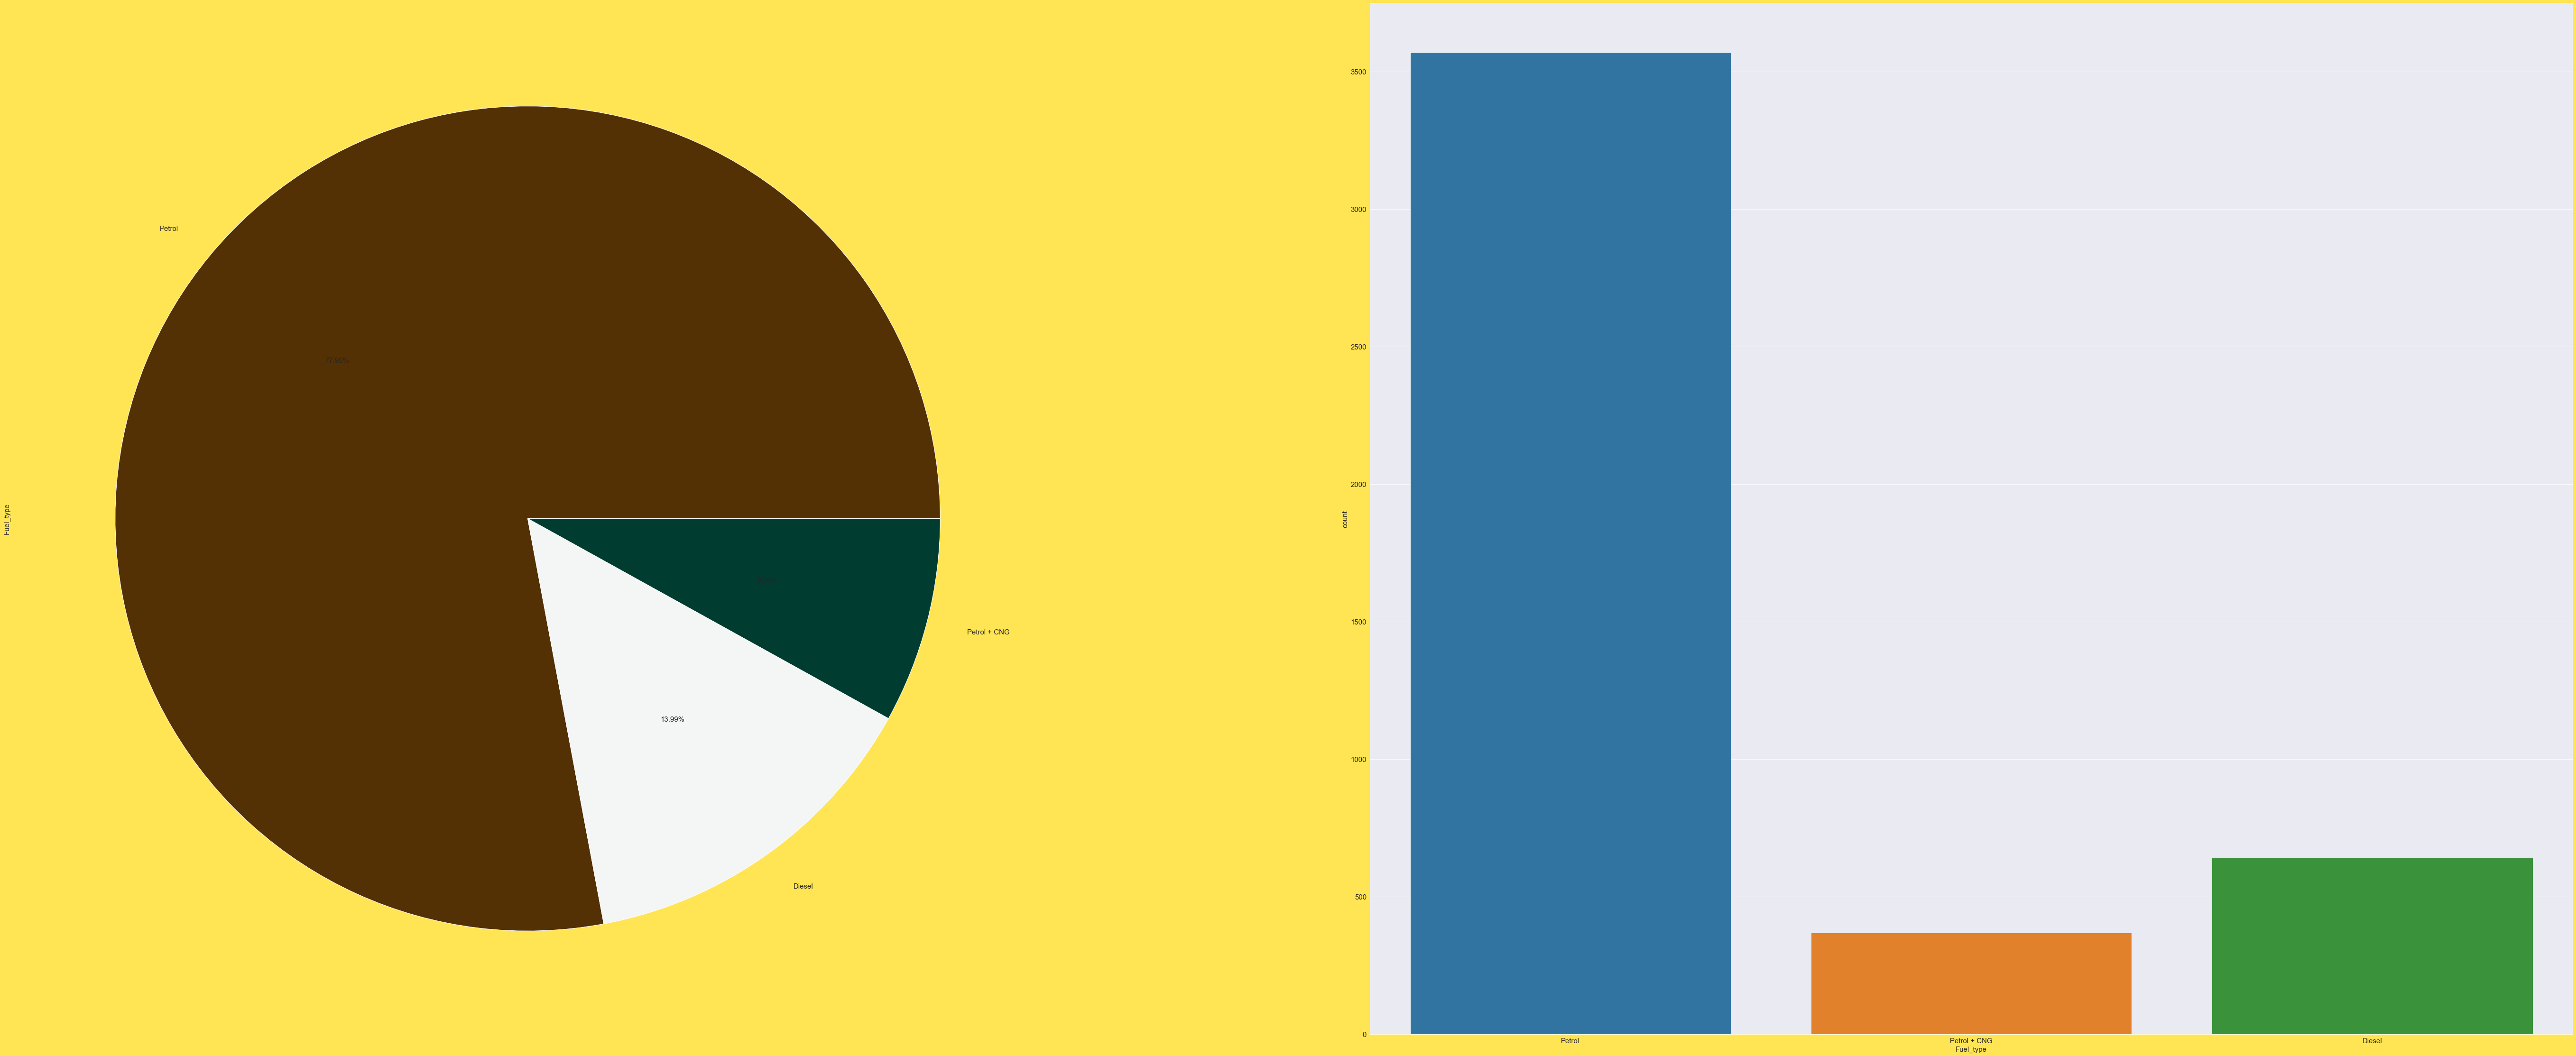

MANUAL       3773
AUTOMATIC     808
Name: Transmission, dtype: int64


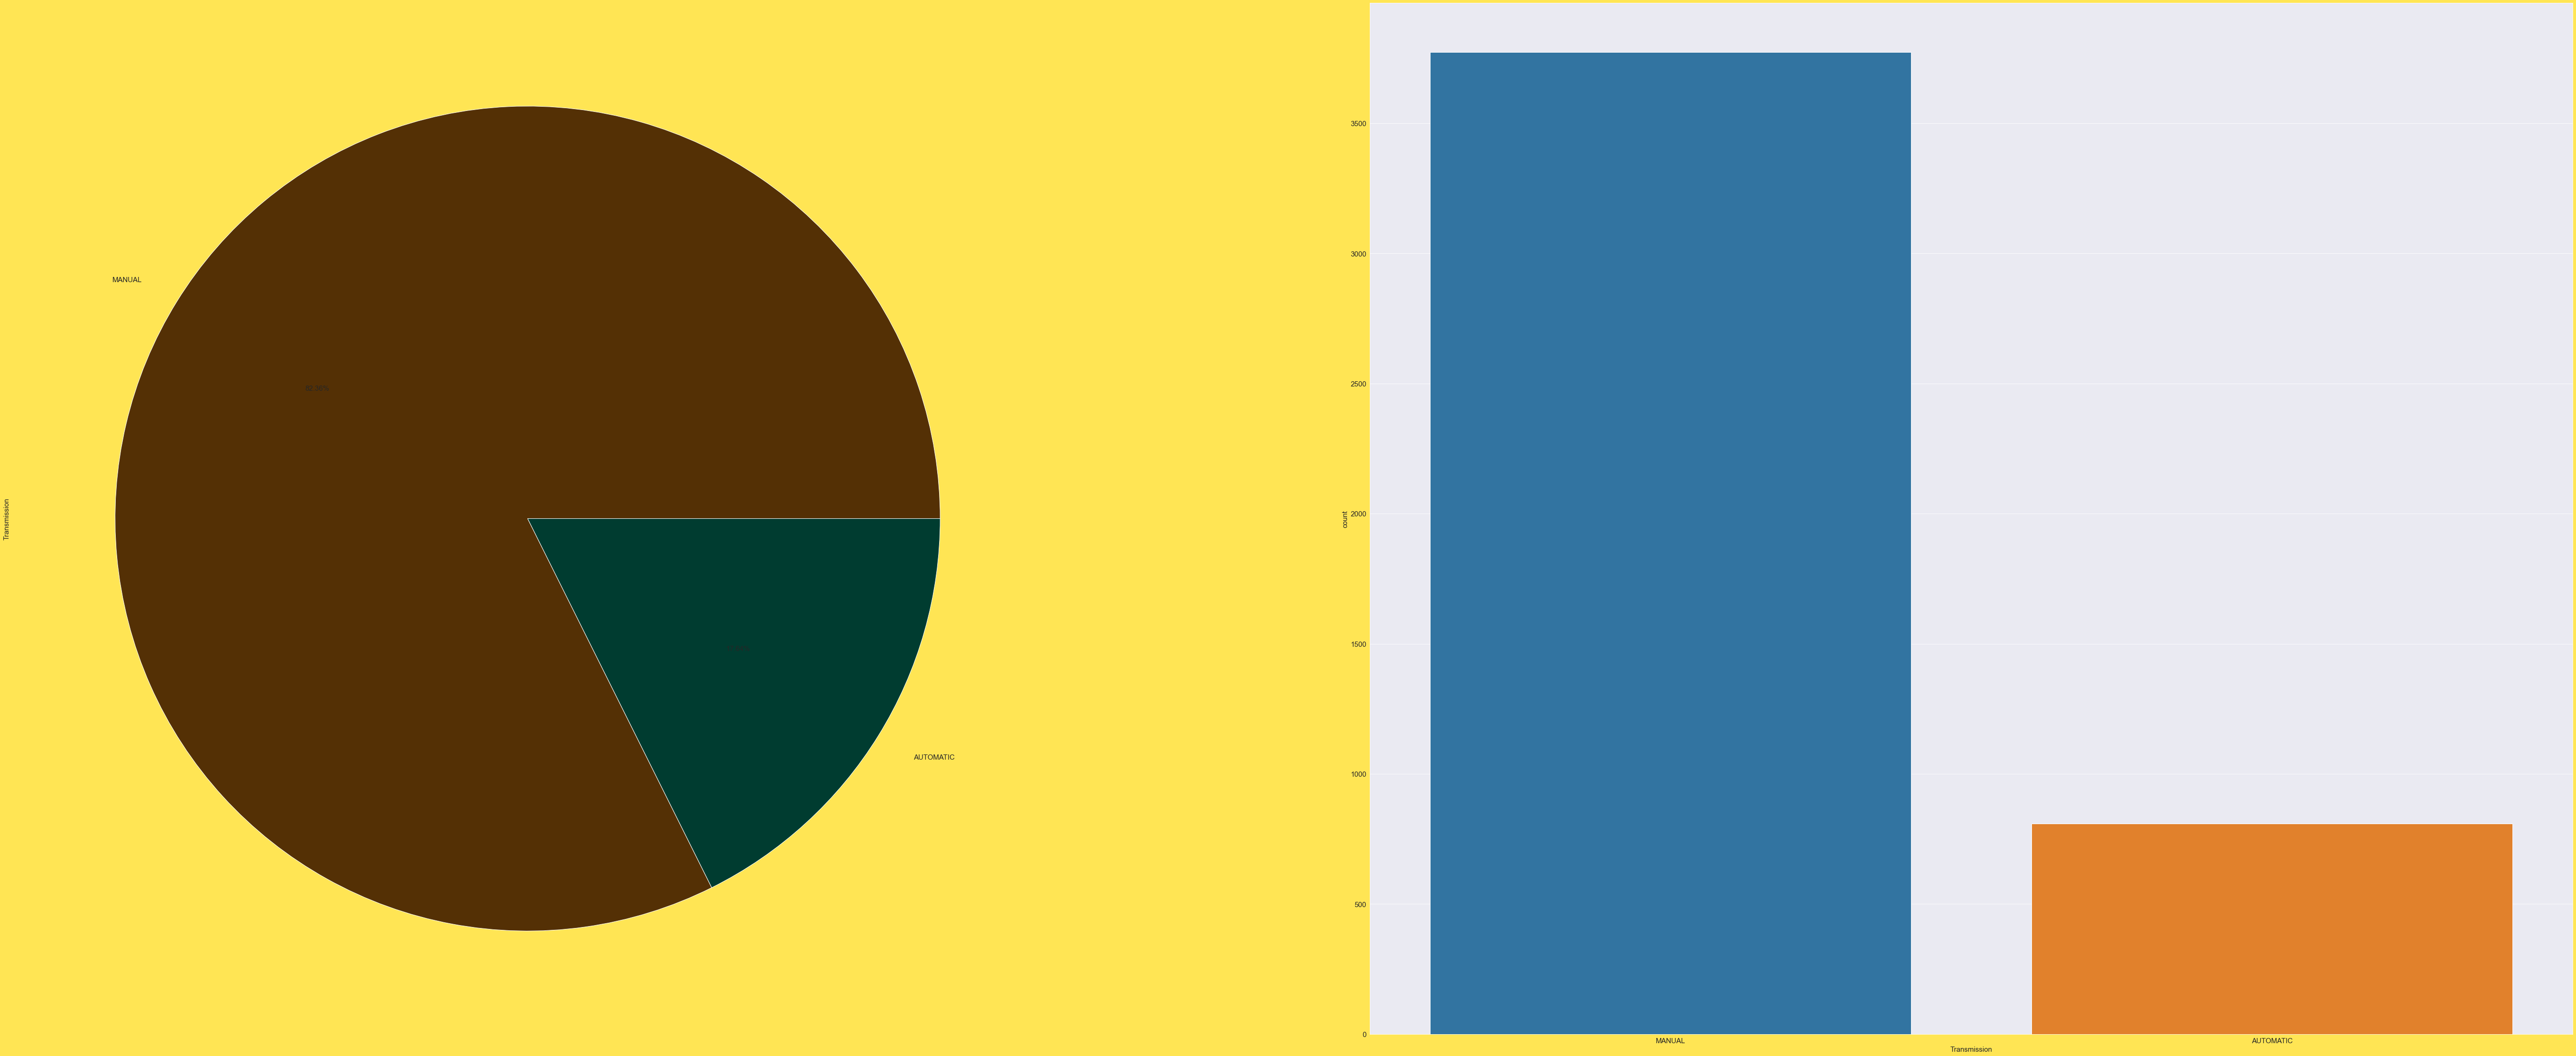

1st Owner    3615
2nd Owner     930
3rd Owner      36
Name: previous_owners, dtype: int64


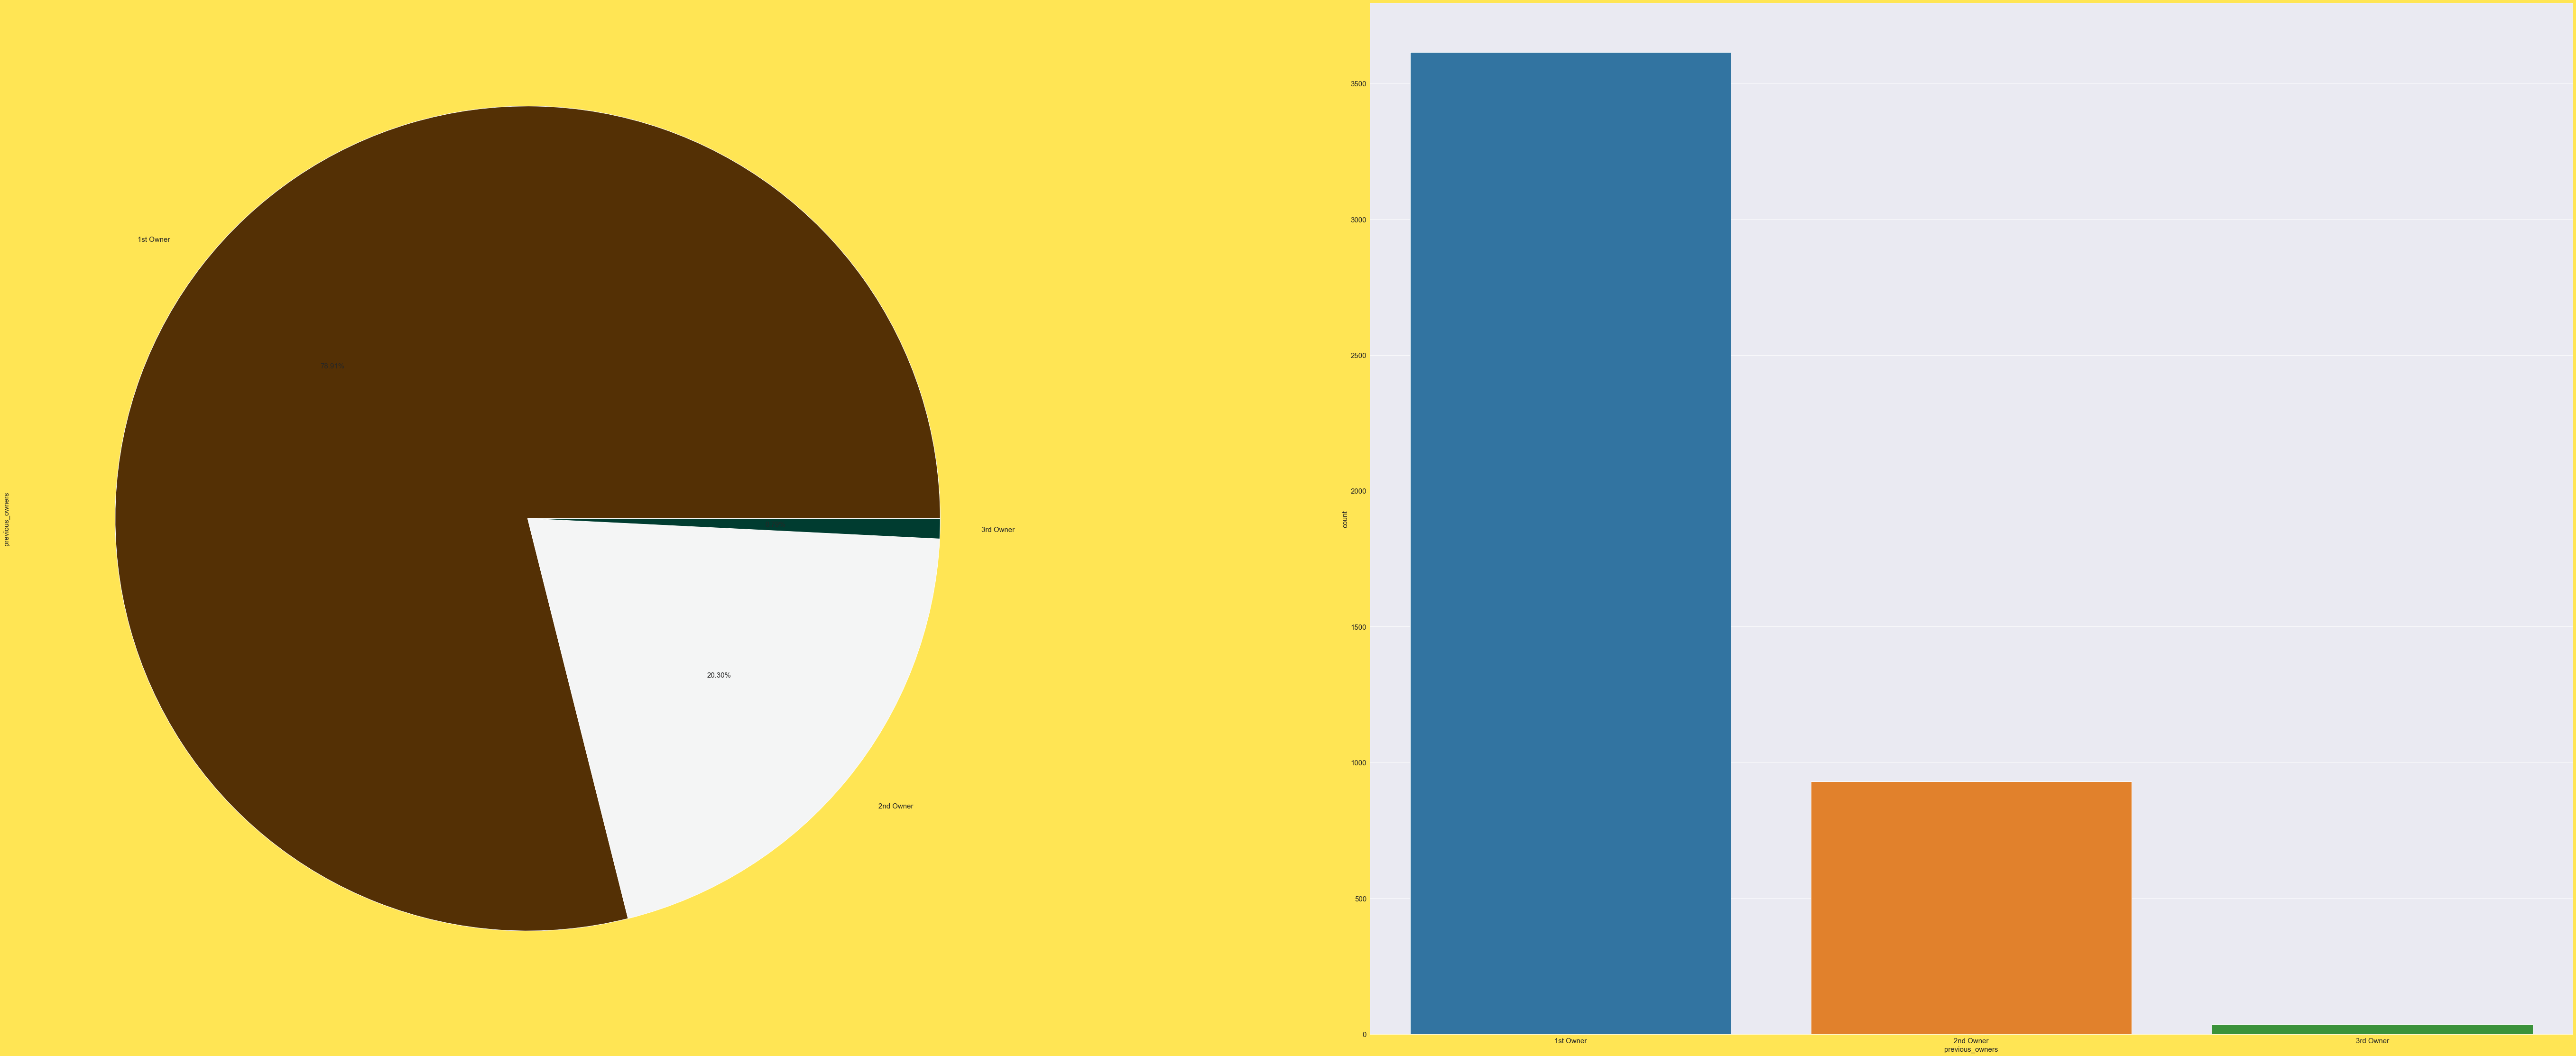

In [74]:
# plotting a bar plot and countplot to look at the catgeories
for i in cat_cols:
    
    plt.figure(figsize=(100,40))
    plt.subplot(1,2,2)
    sns.countplot(i,data=df)
    plt.subplot(1,2,1)
    df[i].value_counts().plot.pie(autopct='%1.2f%%',cmap = 'BrBG')
    print(df[i].value_counts())
    plt.show()

Observations:-
    
-> More than 42% of the used cars in sale are belong to the maruti brand followed by Hyundai(25%) and Honda(8%) respectively.

-> Most of the car models are Alto, Swift and Baleno which again are belong to the Maruti Brand.

-> However there is also models like grand i10 and elite i20 etc which are hyundai brand.

-> More than 7% are the cars are of VXI variant which is the base model cars of the Maruti Brand. Also there is i20 and i10
   models which are in high number.

-> Almost 27% of the cars are from ghaziabad location followed by Banglore and Delhi.

-> More than 77.95% of the cars runs on petrol and followed by diesel and petrol+CNG.

-> Similarly Almost 82% of the cars are manual transmission.

-> 1st owner i.e., second hand cars are more than 78% while 2nd owner cars are less than 20%

->

In [57]:
df['Manufacturing_Year'].value_counts()

2019    686
2018    686
2017    600
2021    579
2020    562
2016    395
2015    289
2014    257
2022    151
2013    148
2012    116
2011     61
2010     44
2009      7
Name: Manufacturing_Year, dtype: int64

2    3605
1     486
6     371
4      75
7      41
3       3
Name: Airbagsrandom, dtype: int64


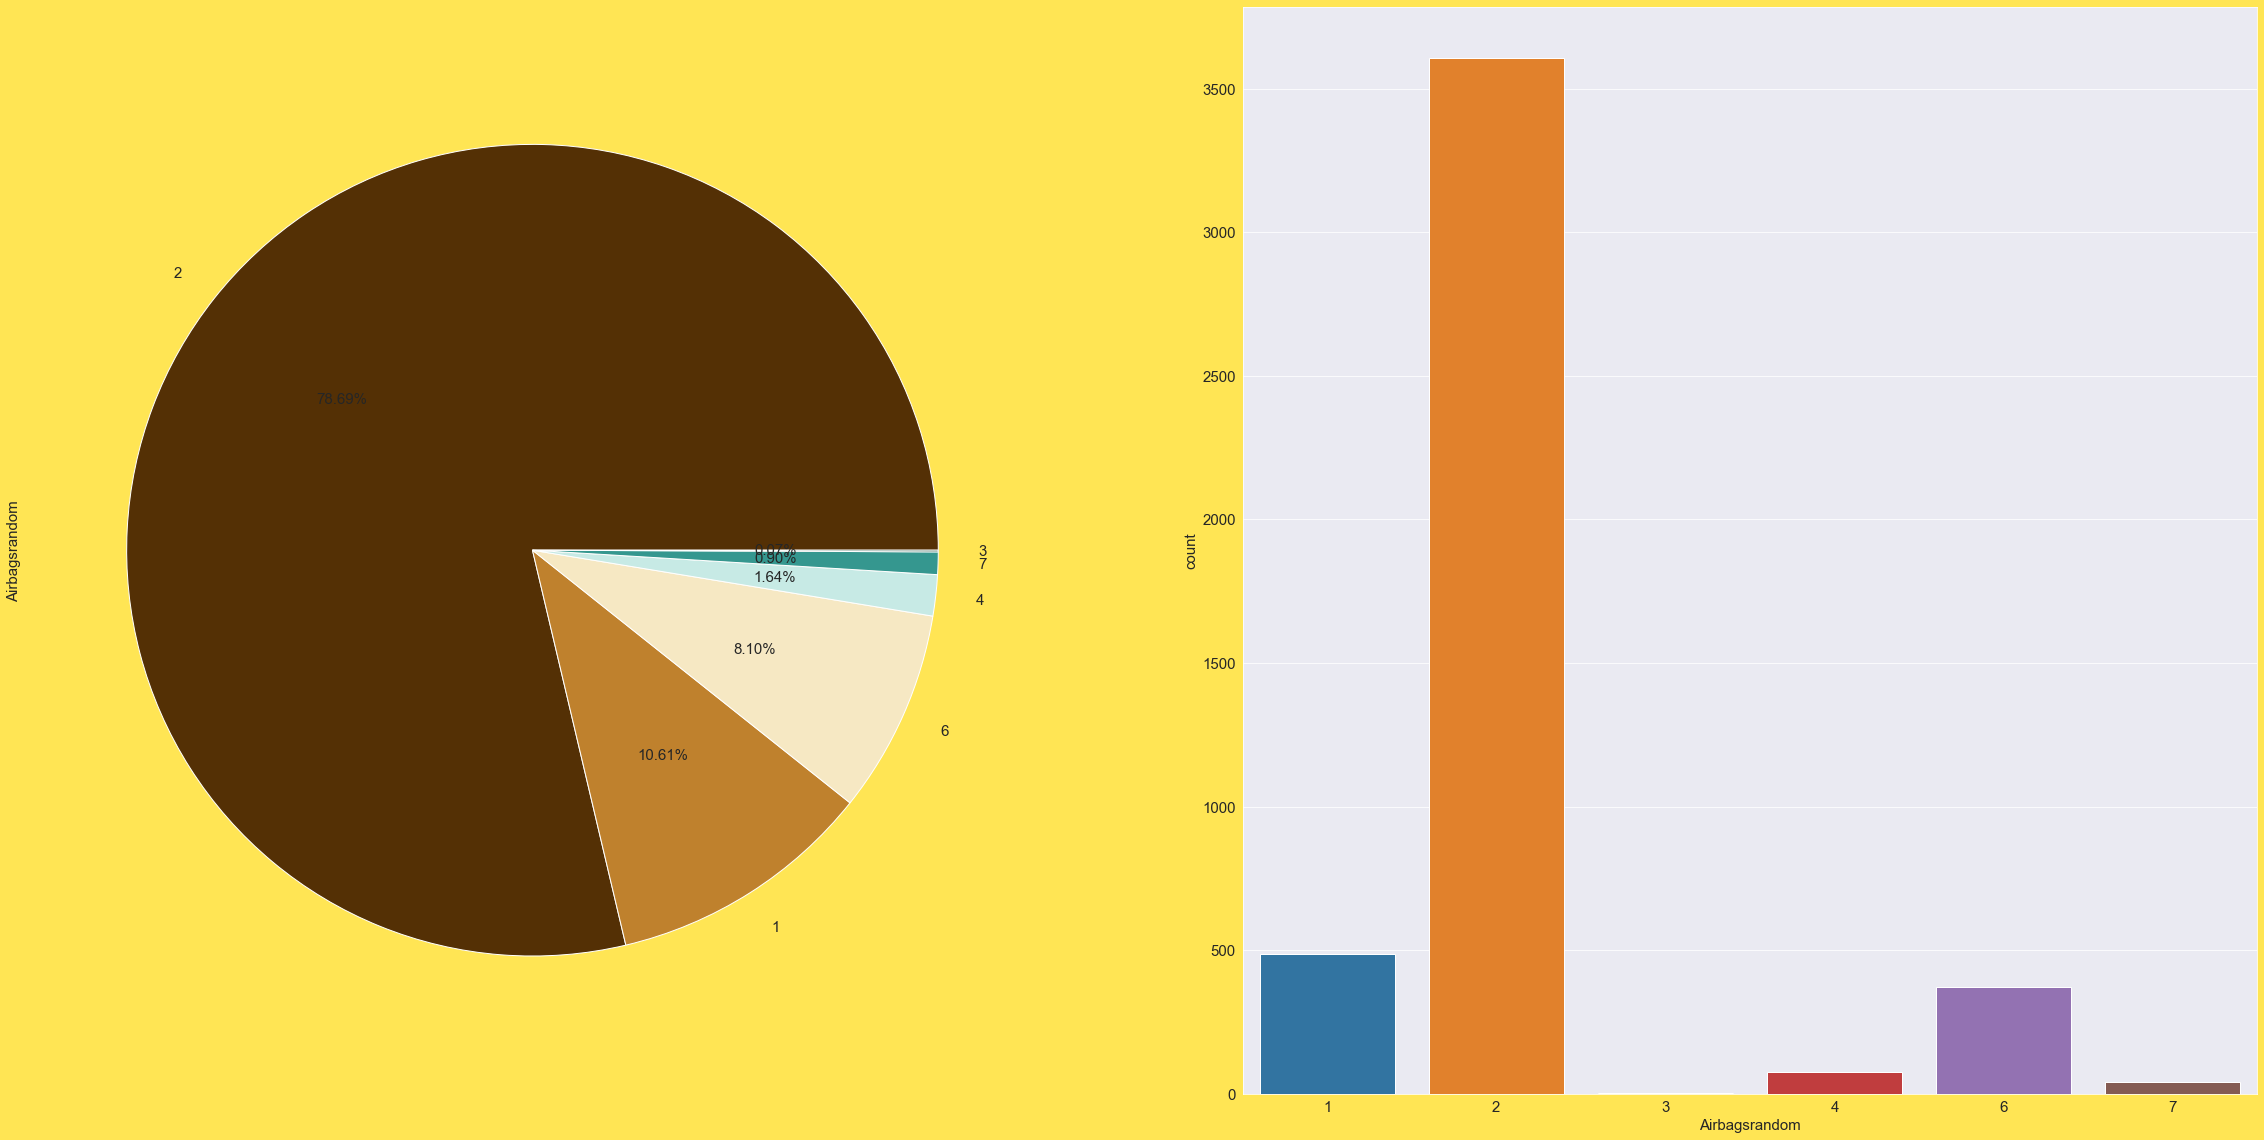

3     686
4     686
5     600
1     579
2     562
6     395
7     289
8     257
0     151
9     148
10    116
11     61
12     44
13      7
Name: Age, dtype: int64


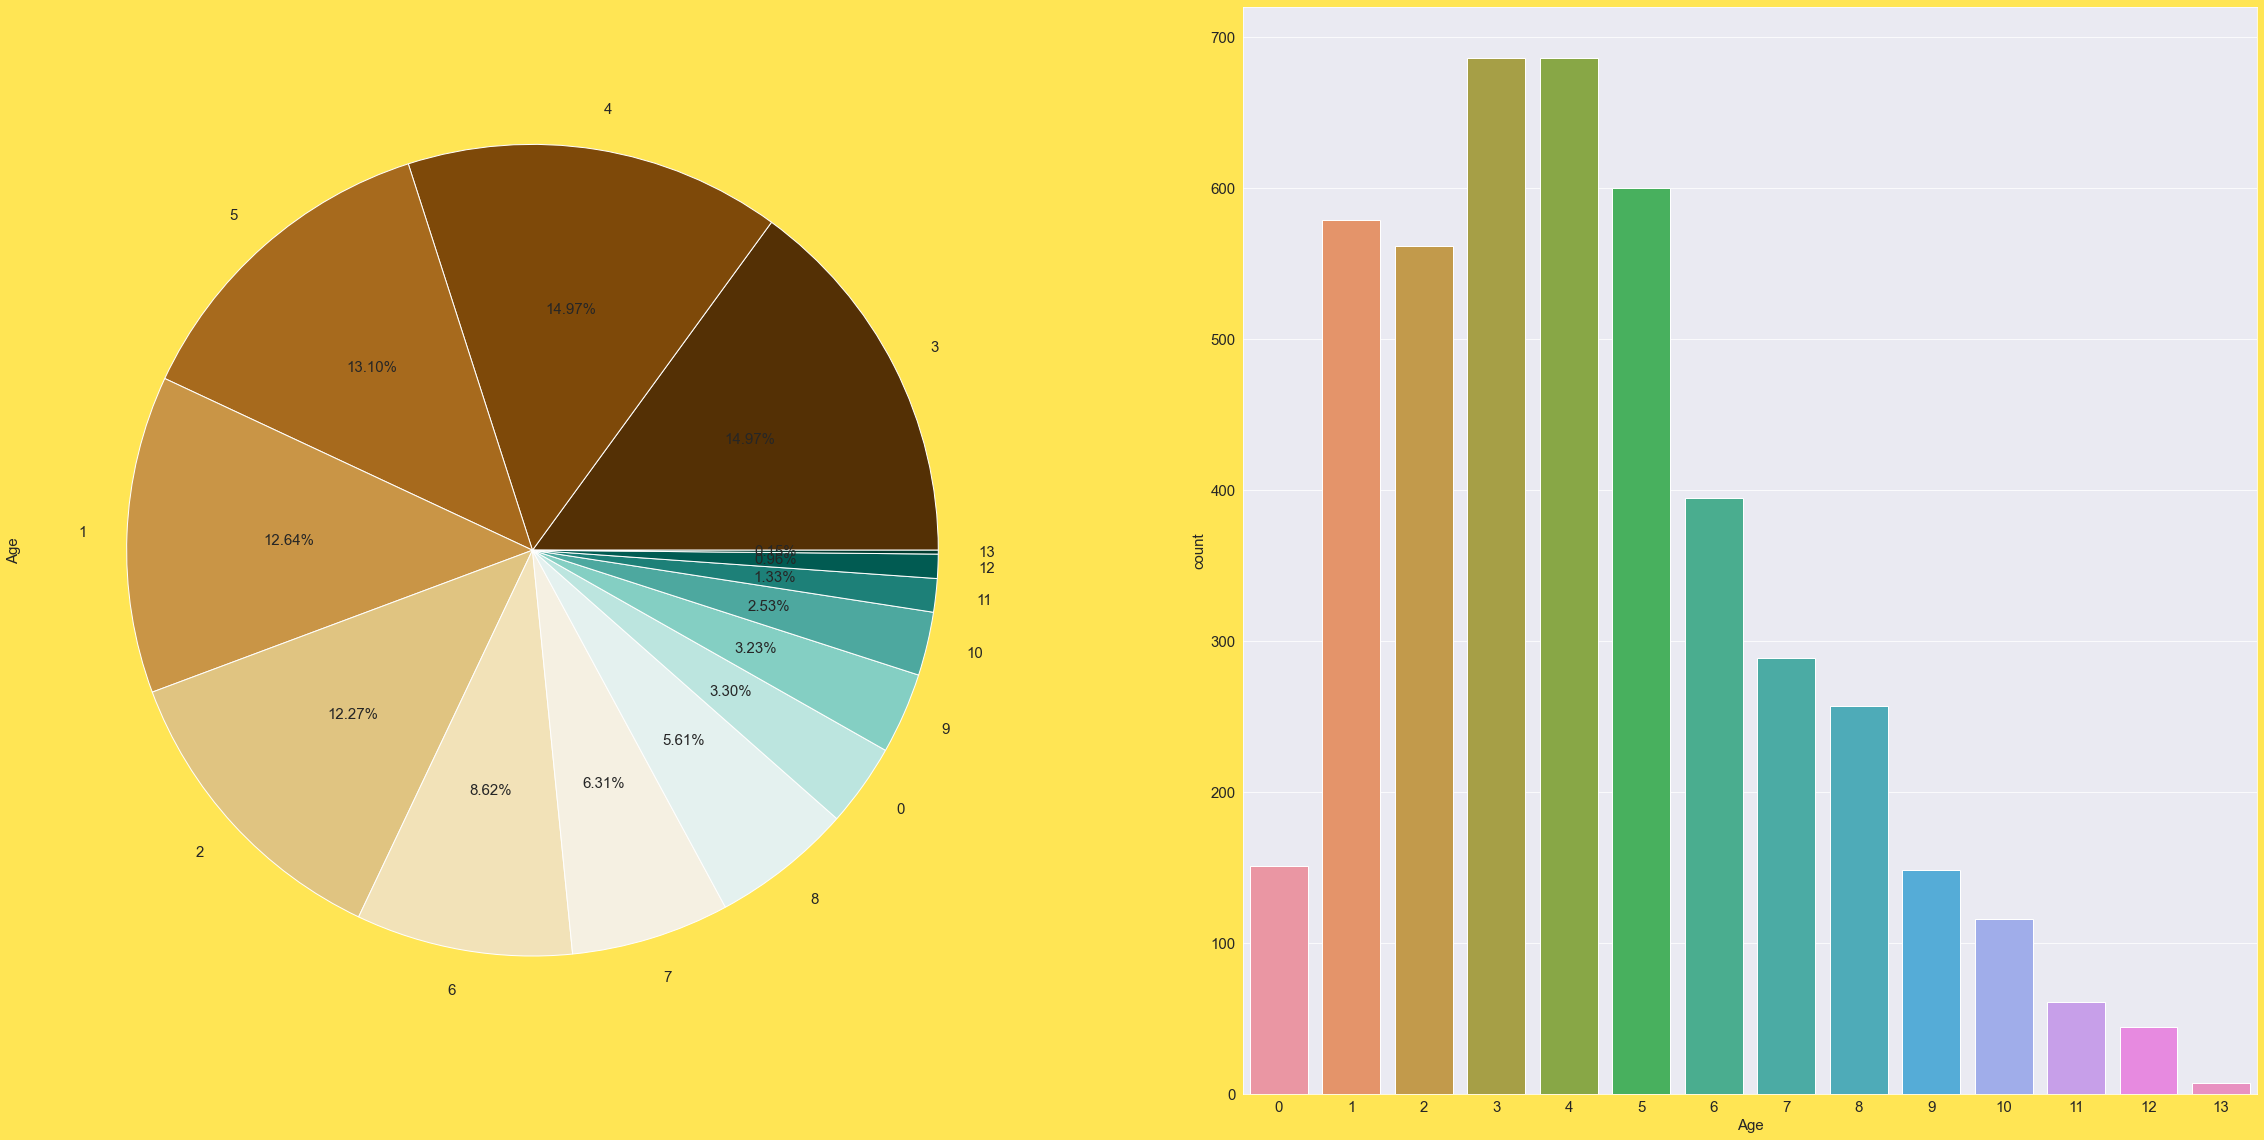

In [58]:
discrete_cols = ['Airbagsrandom','Age']
for i in discrete_cols:
    
    plt.figure(figsize=(40,20))
    plt.subplot(1,2,2)
    sns.countplot(i,data=df)
    plt.subplot(1,2,1)
    df[i].value_counts().plot.pie(autopct='%1.2f%%',cmap = 'BrBG')
    print(df[i].value_counts())
    plt.show()

Observations:-

-> More than 75% of the cars have only two airbags.

-> And around 30% of the cars are 3-4 years old. Also there are many new cars in the sale as well.


In [59]:
## plotting a histogram to check the values and distribution of cont_cols
def histplots(df,cont_cols):
    # creating a  copy of dataframe
    data = df[cont_cols].copy()
    # subplots 
    fig, axes = plt.subplots(nrows=len(data.columns)//2, ncols=2,figsize=(25,15))
    fig.subplots_adjust(hspace=0.7)
    
    # our main distplot
    for ax, feature in zip(axes.flatten(), data.columns):
        sns.histplot(data[feature],ax=ax)
        ax.set_title(f'Histogram of {feature}')
    plt.show()

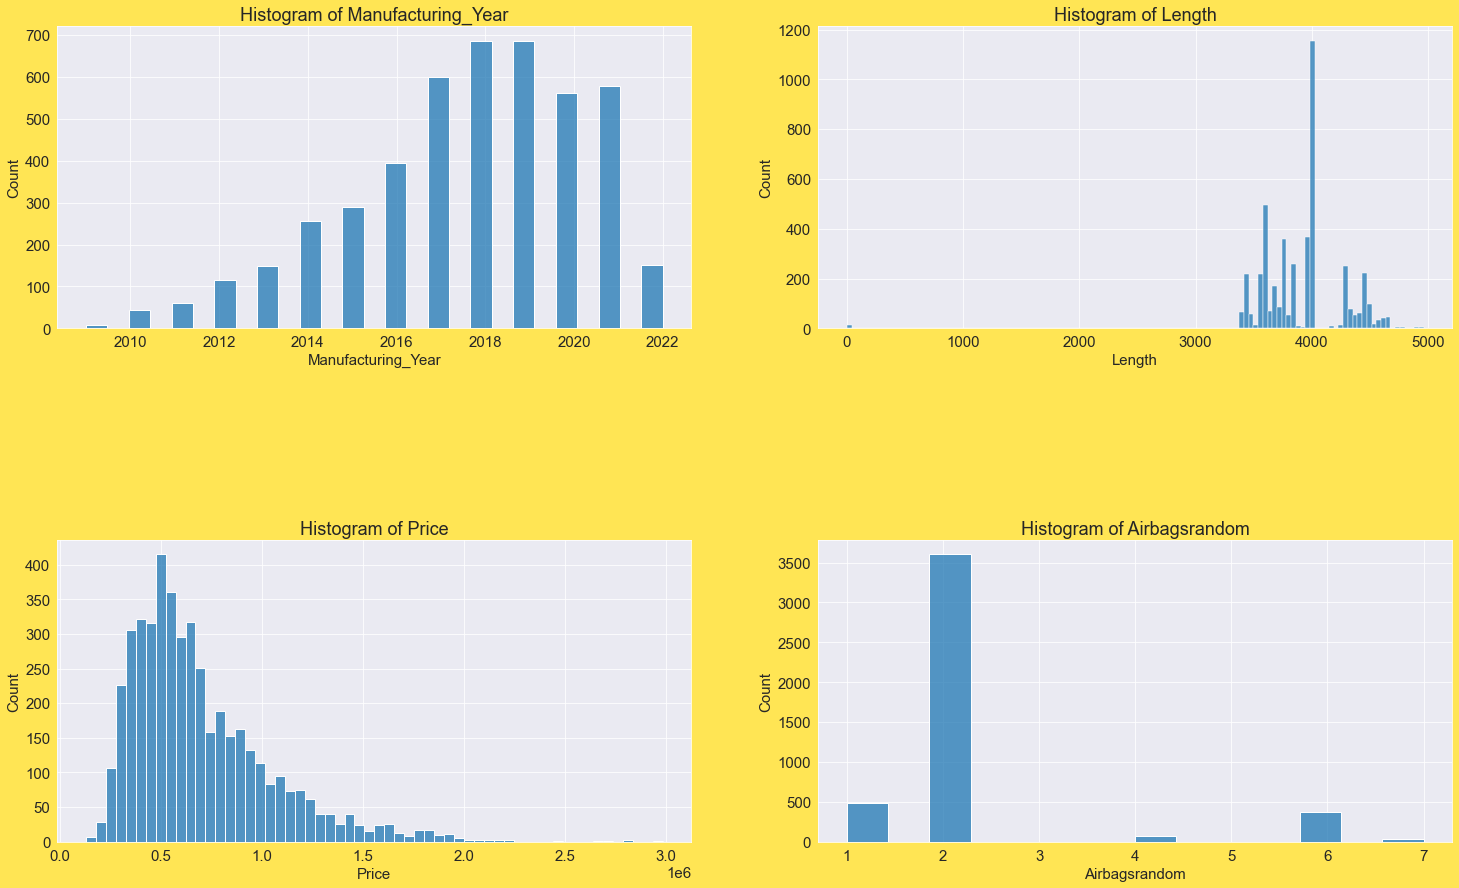

In [60]:
histplots(df,cont_cols)

Observations:-
 
-> Most of the cars are manufactured between 2016-2020

-> And most of the cars have travelled less than 50,000 kilometers

-> The length in most cars are in the range between 3000-4000 mm

## Bivariate Analysis

In [85]:
## let's remove the target price from cont_cols
cont_cols.remove('Price')

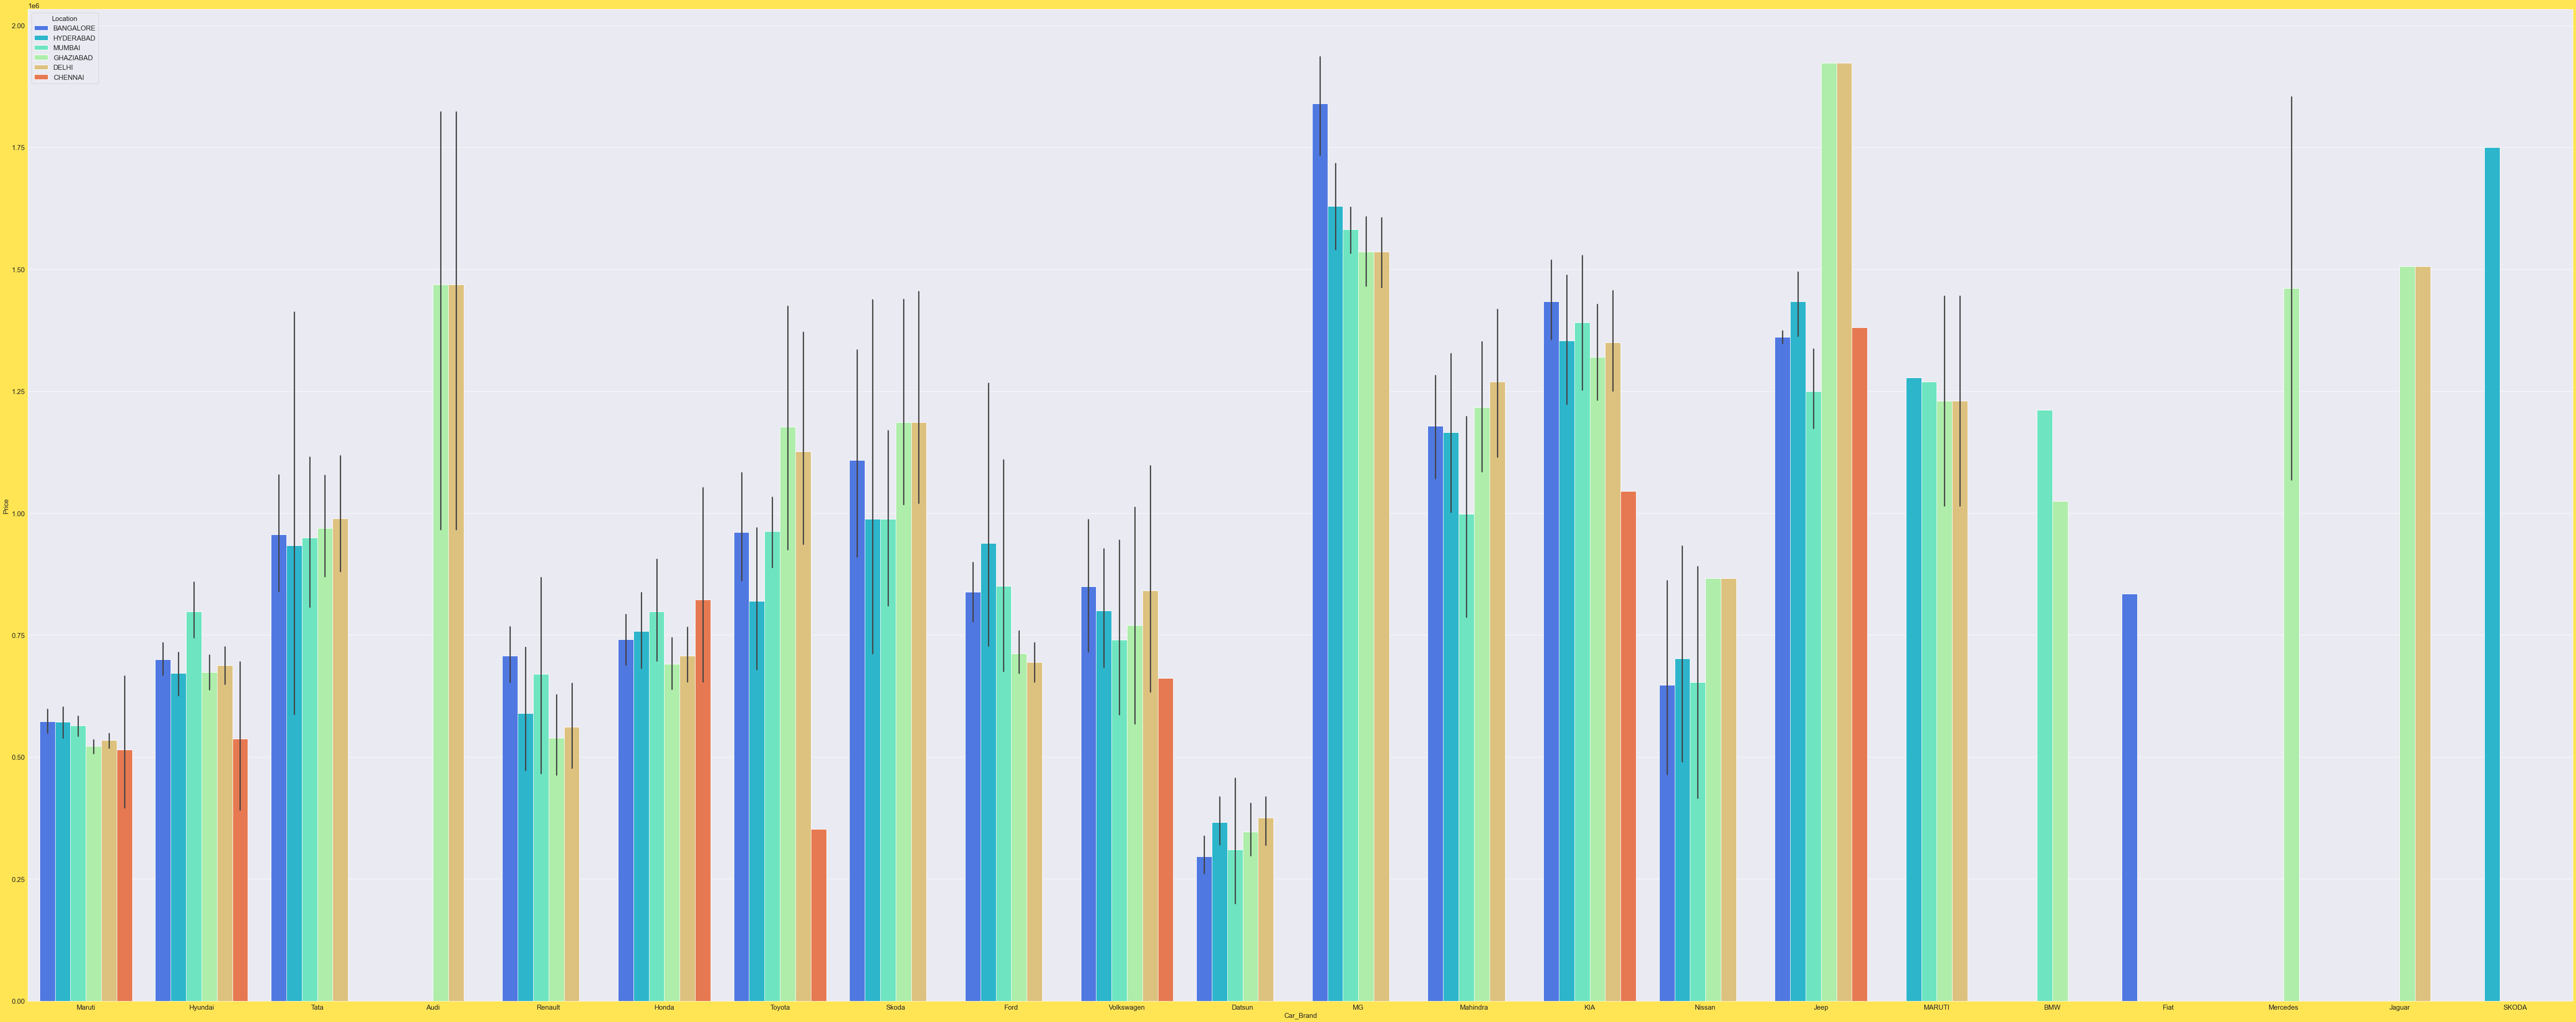

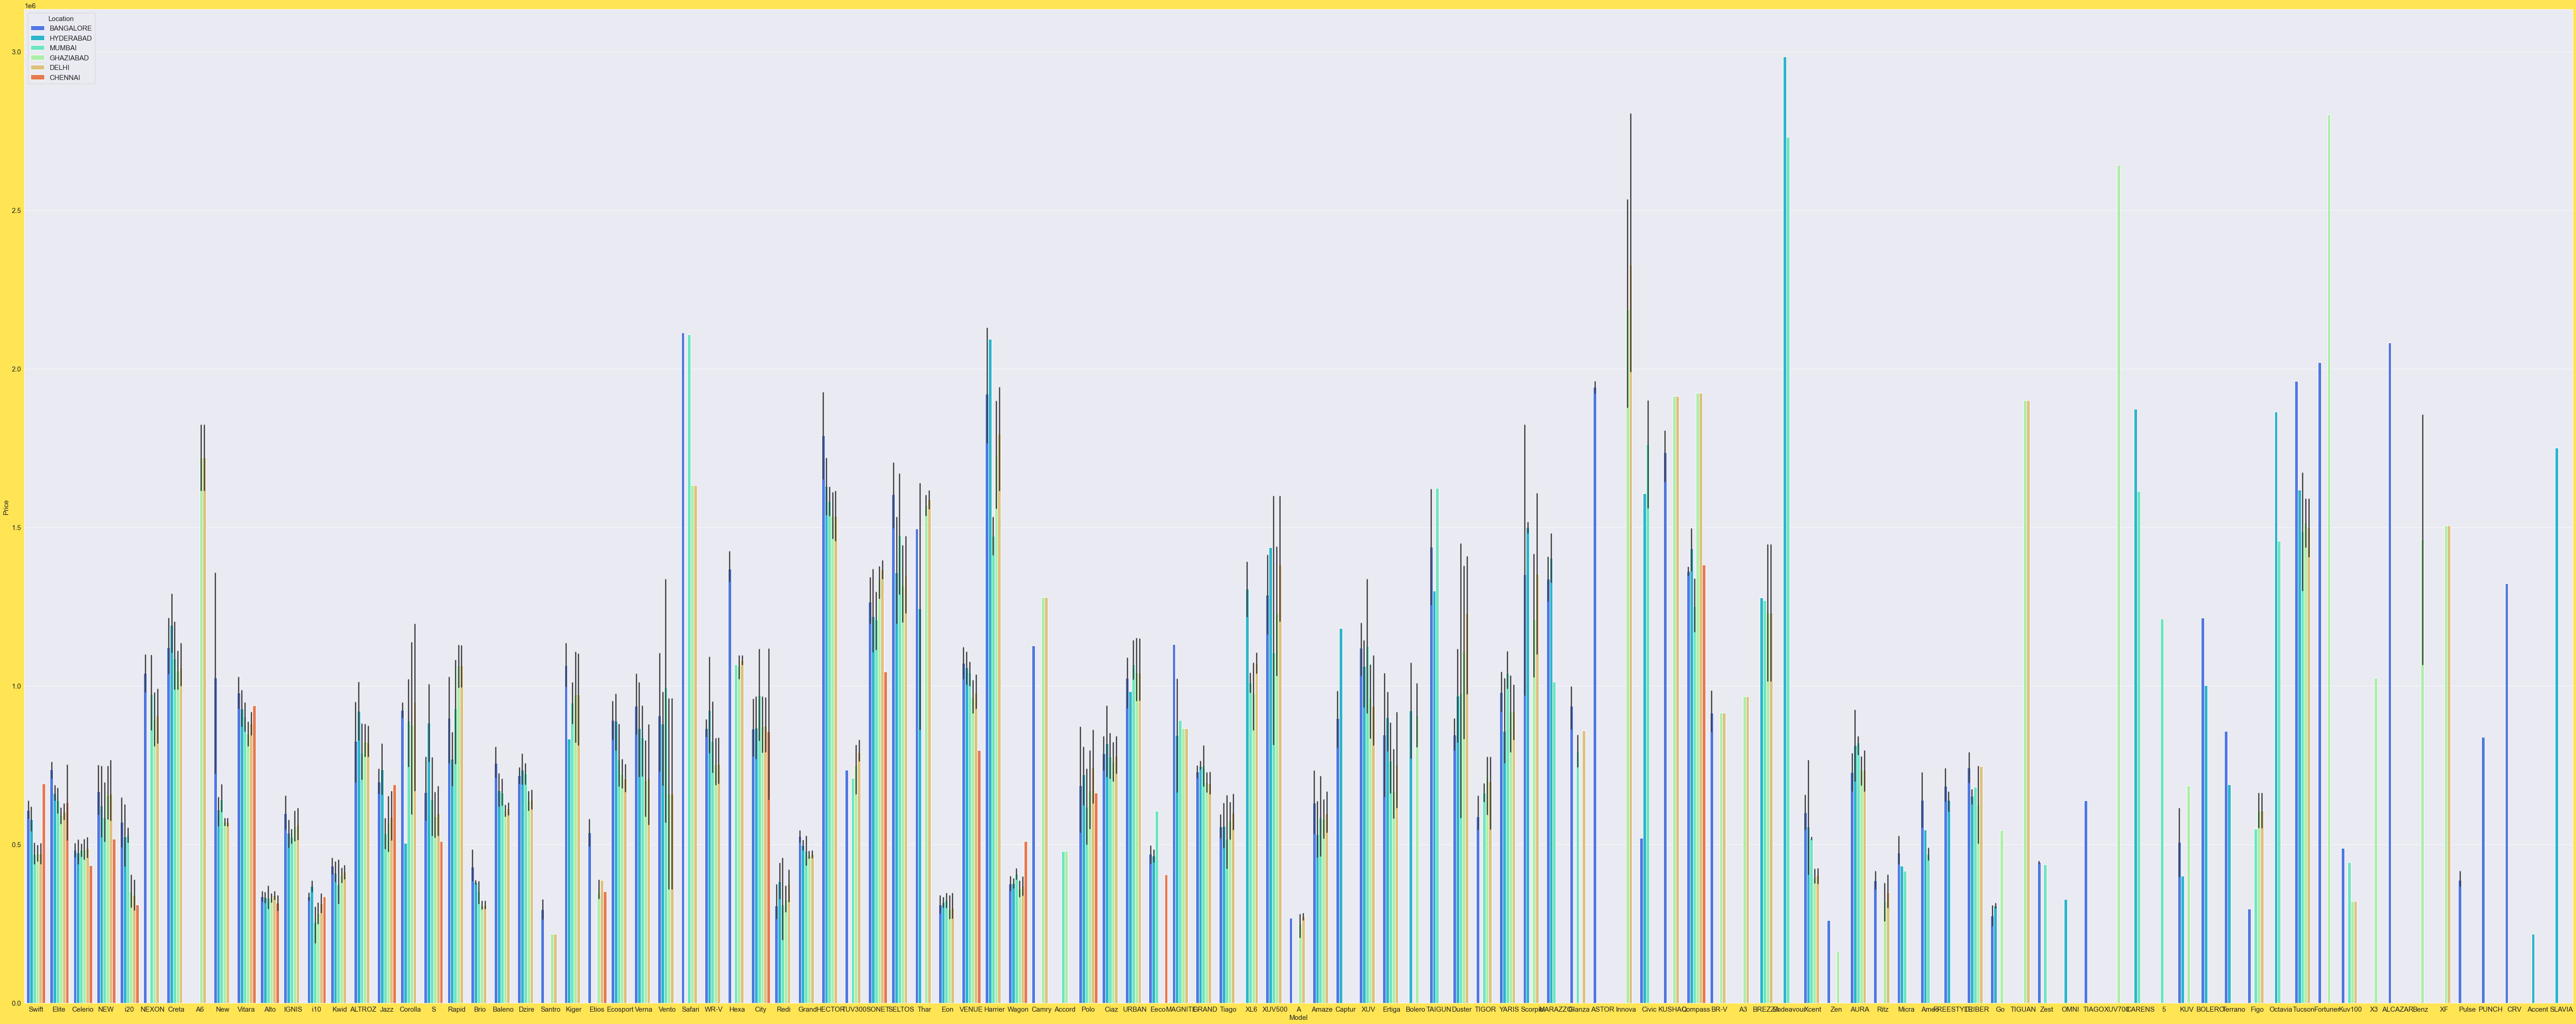

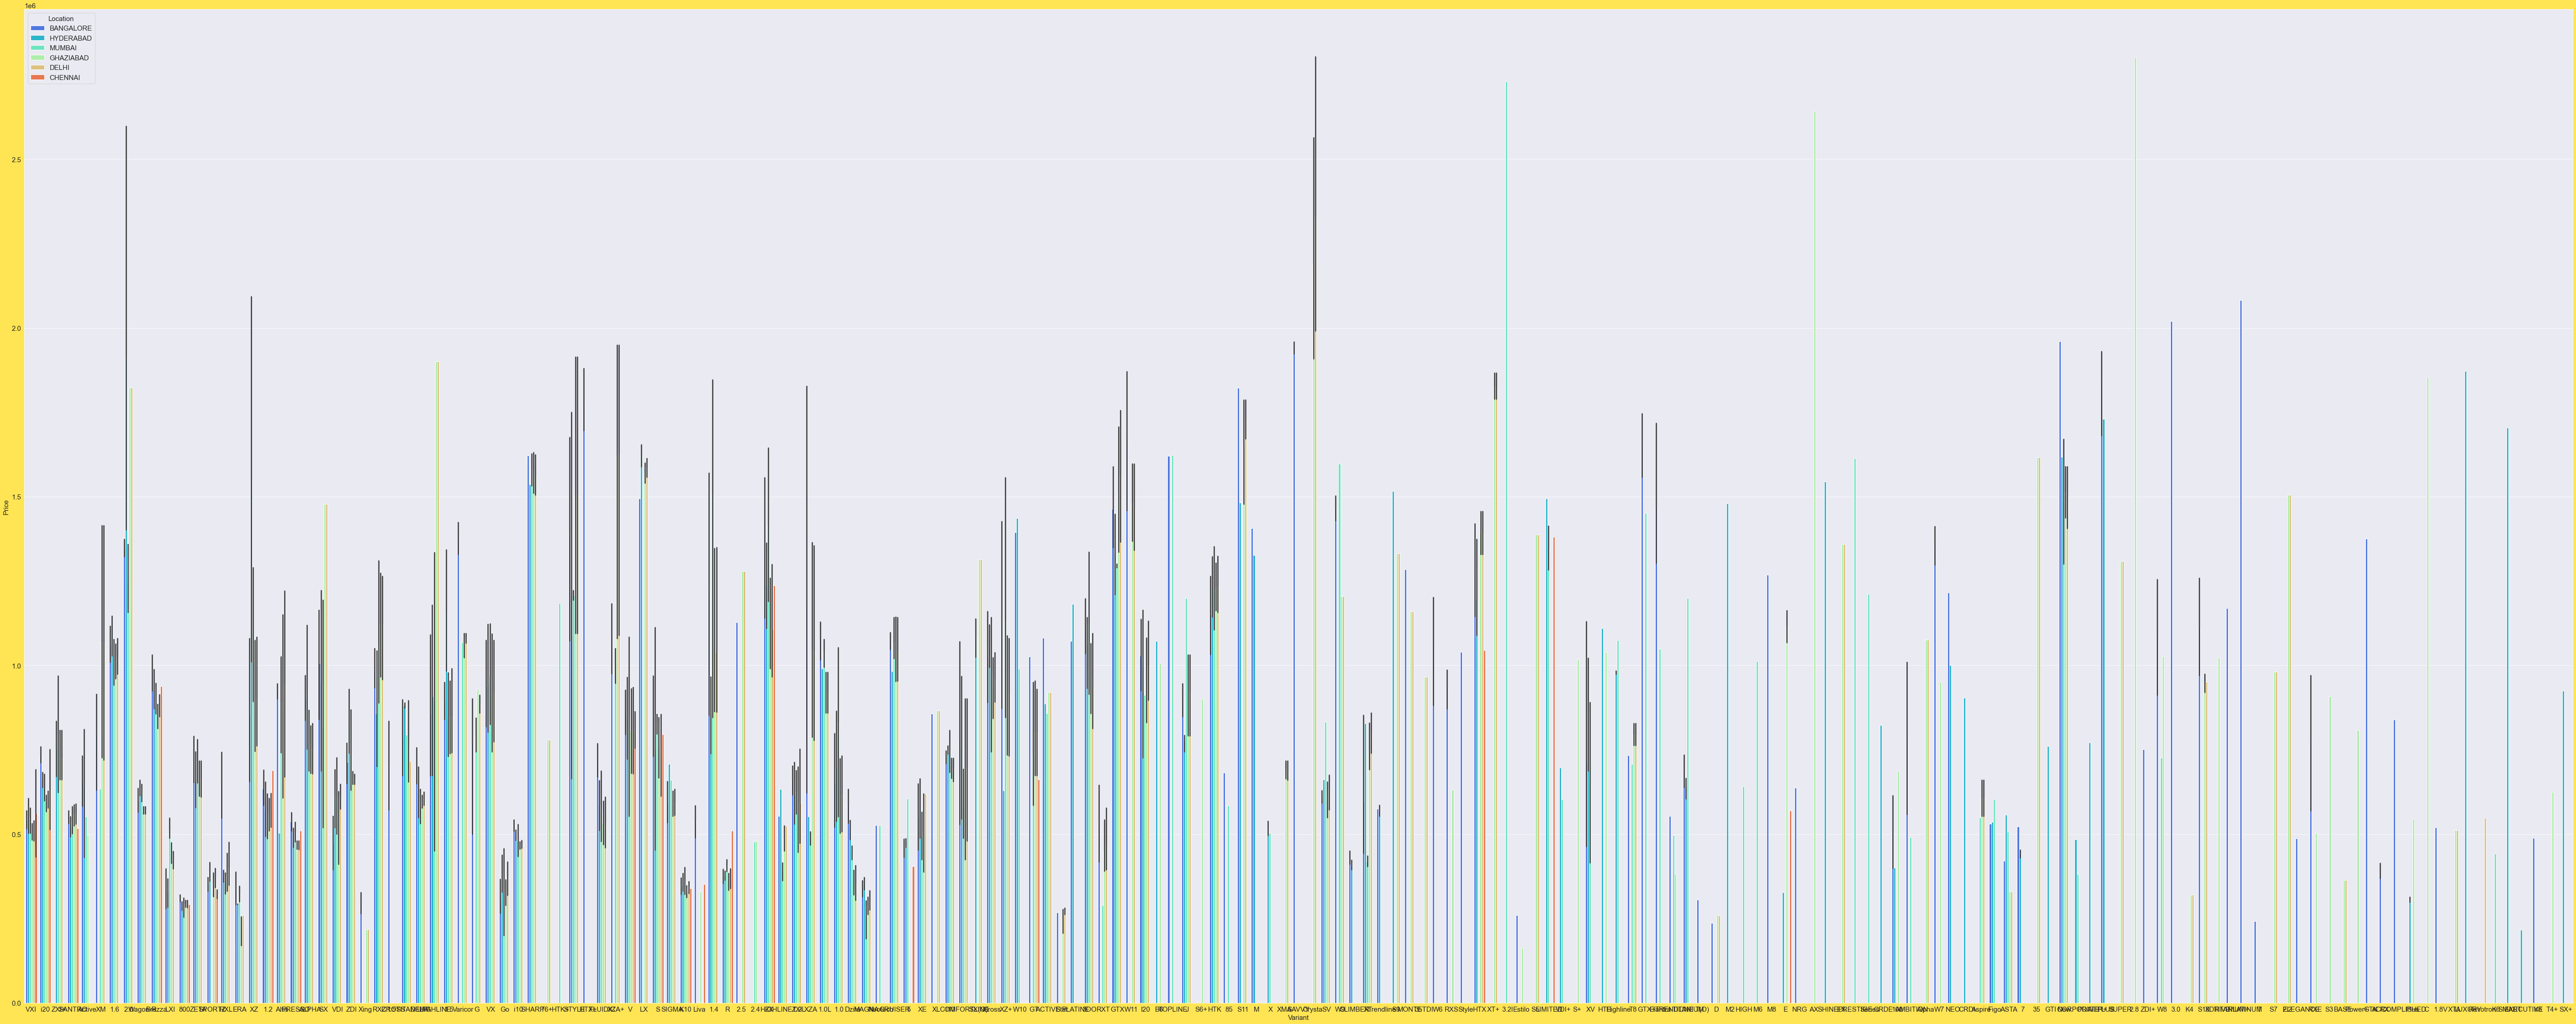

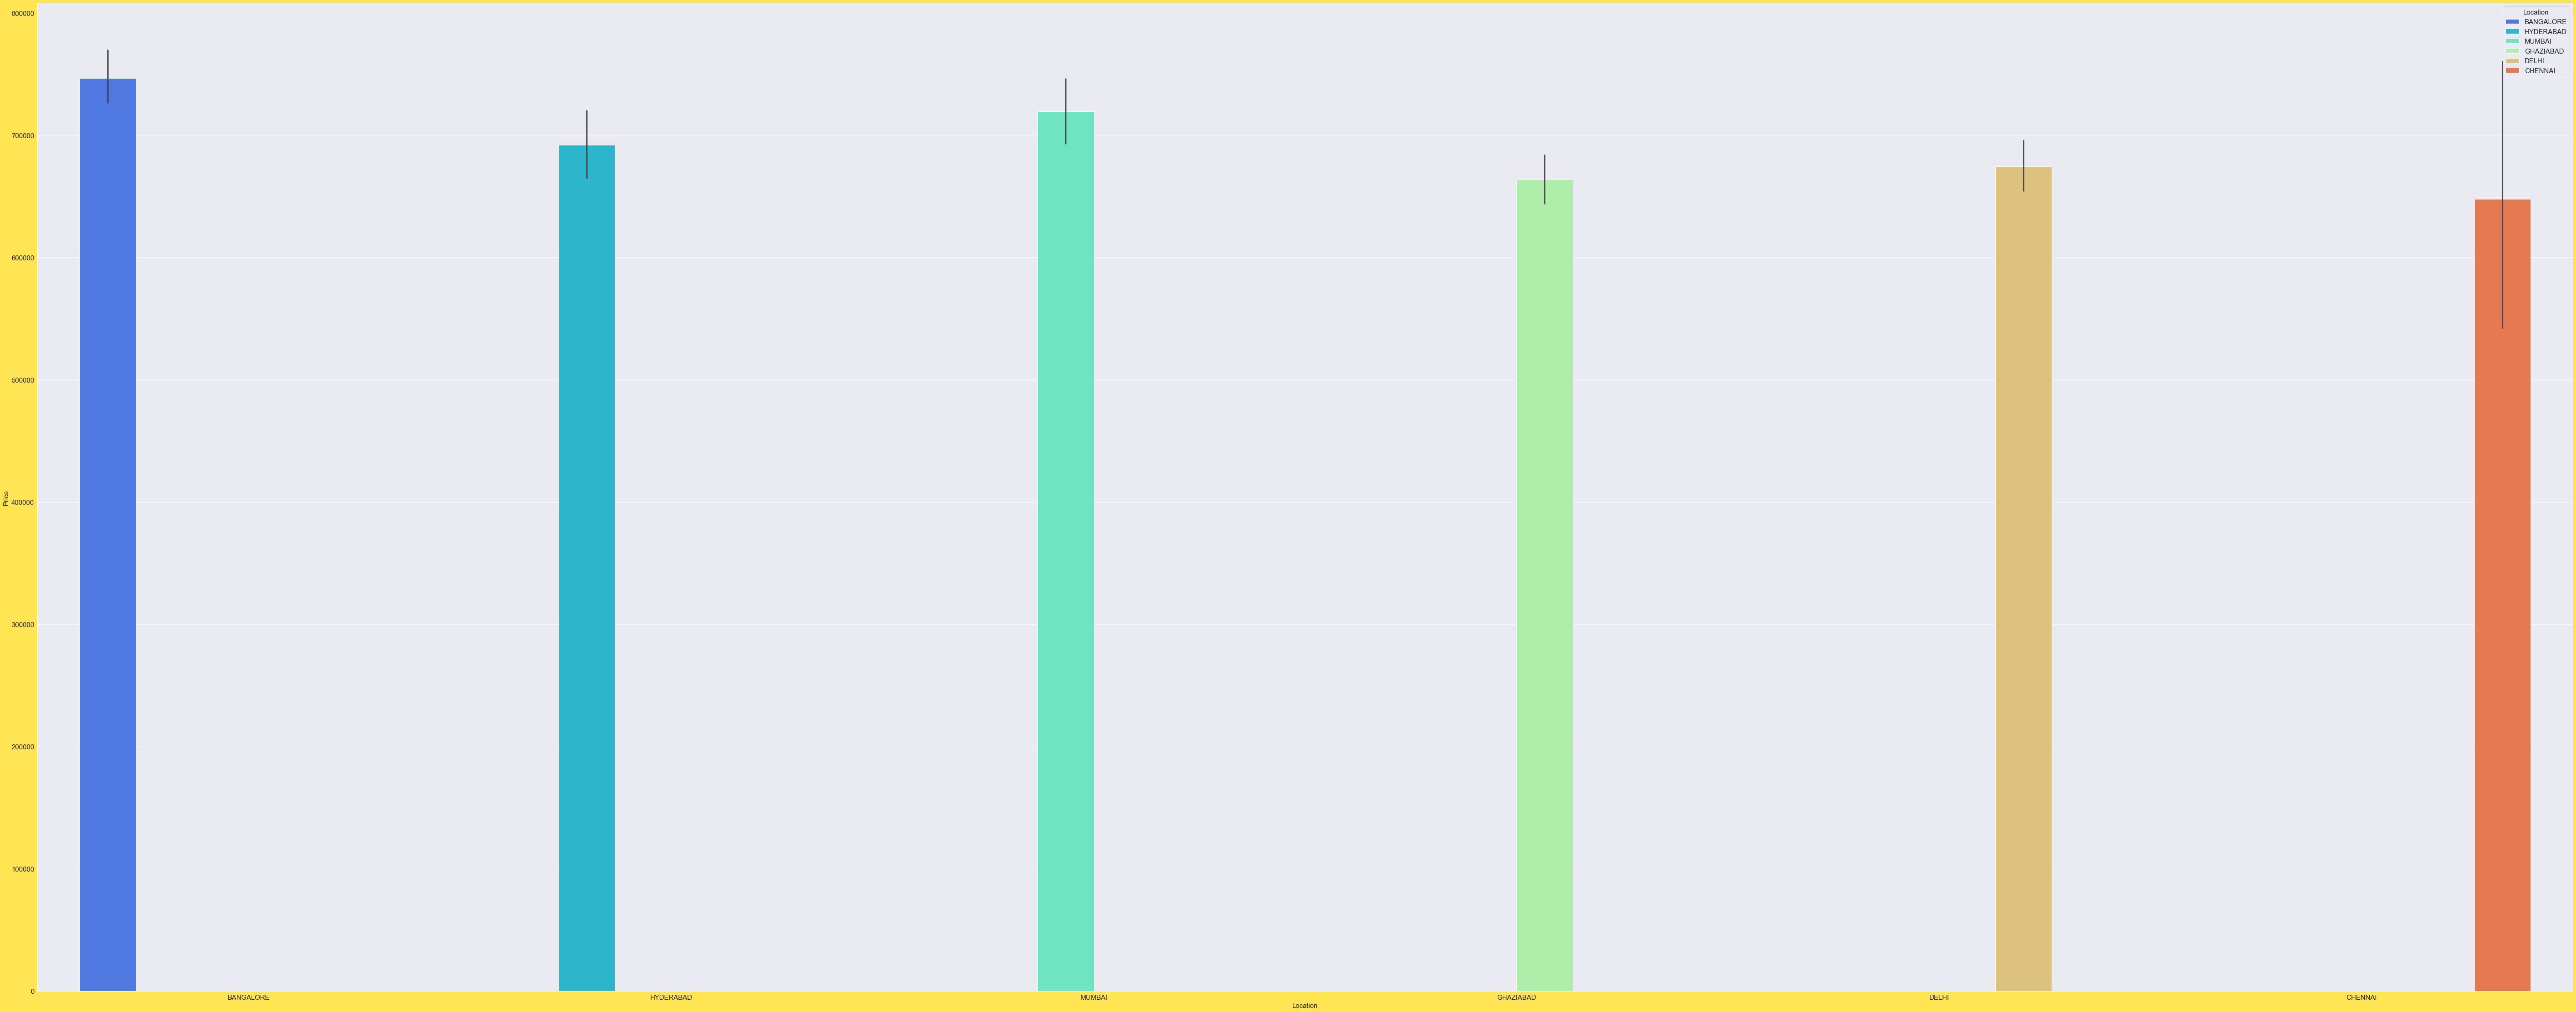

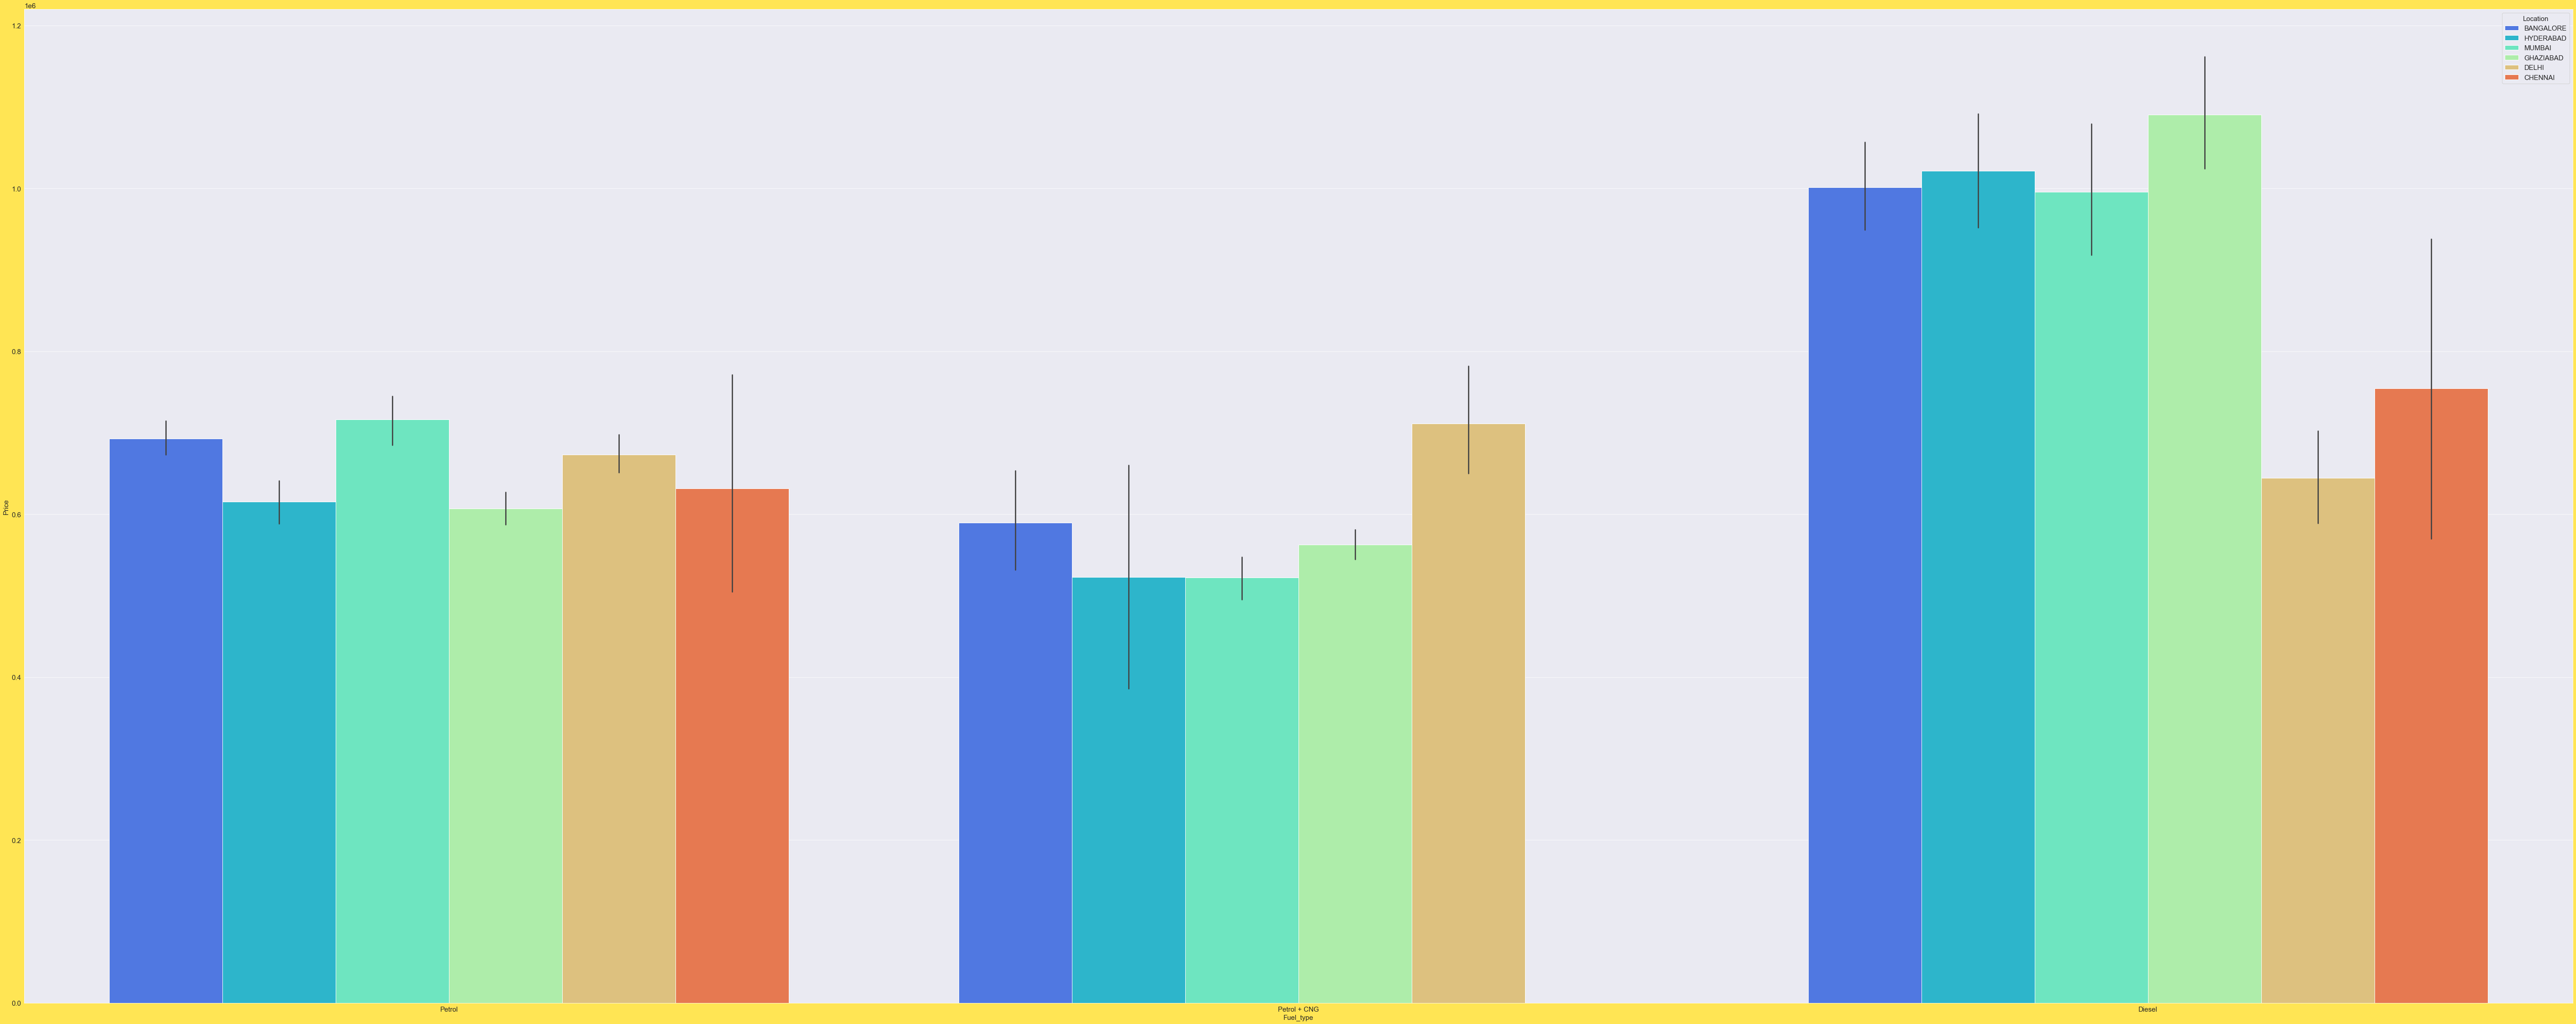

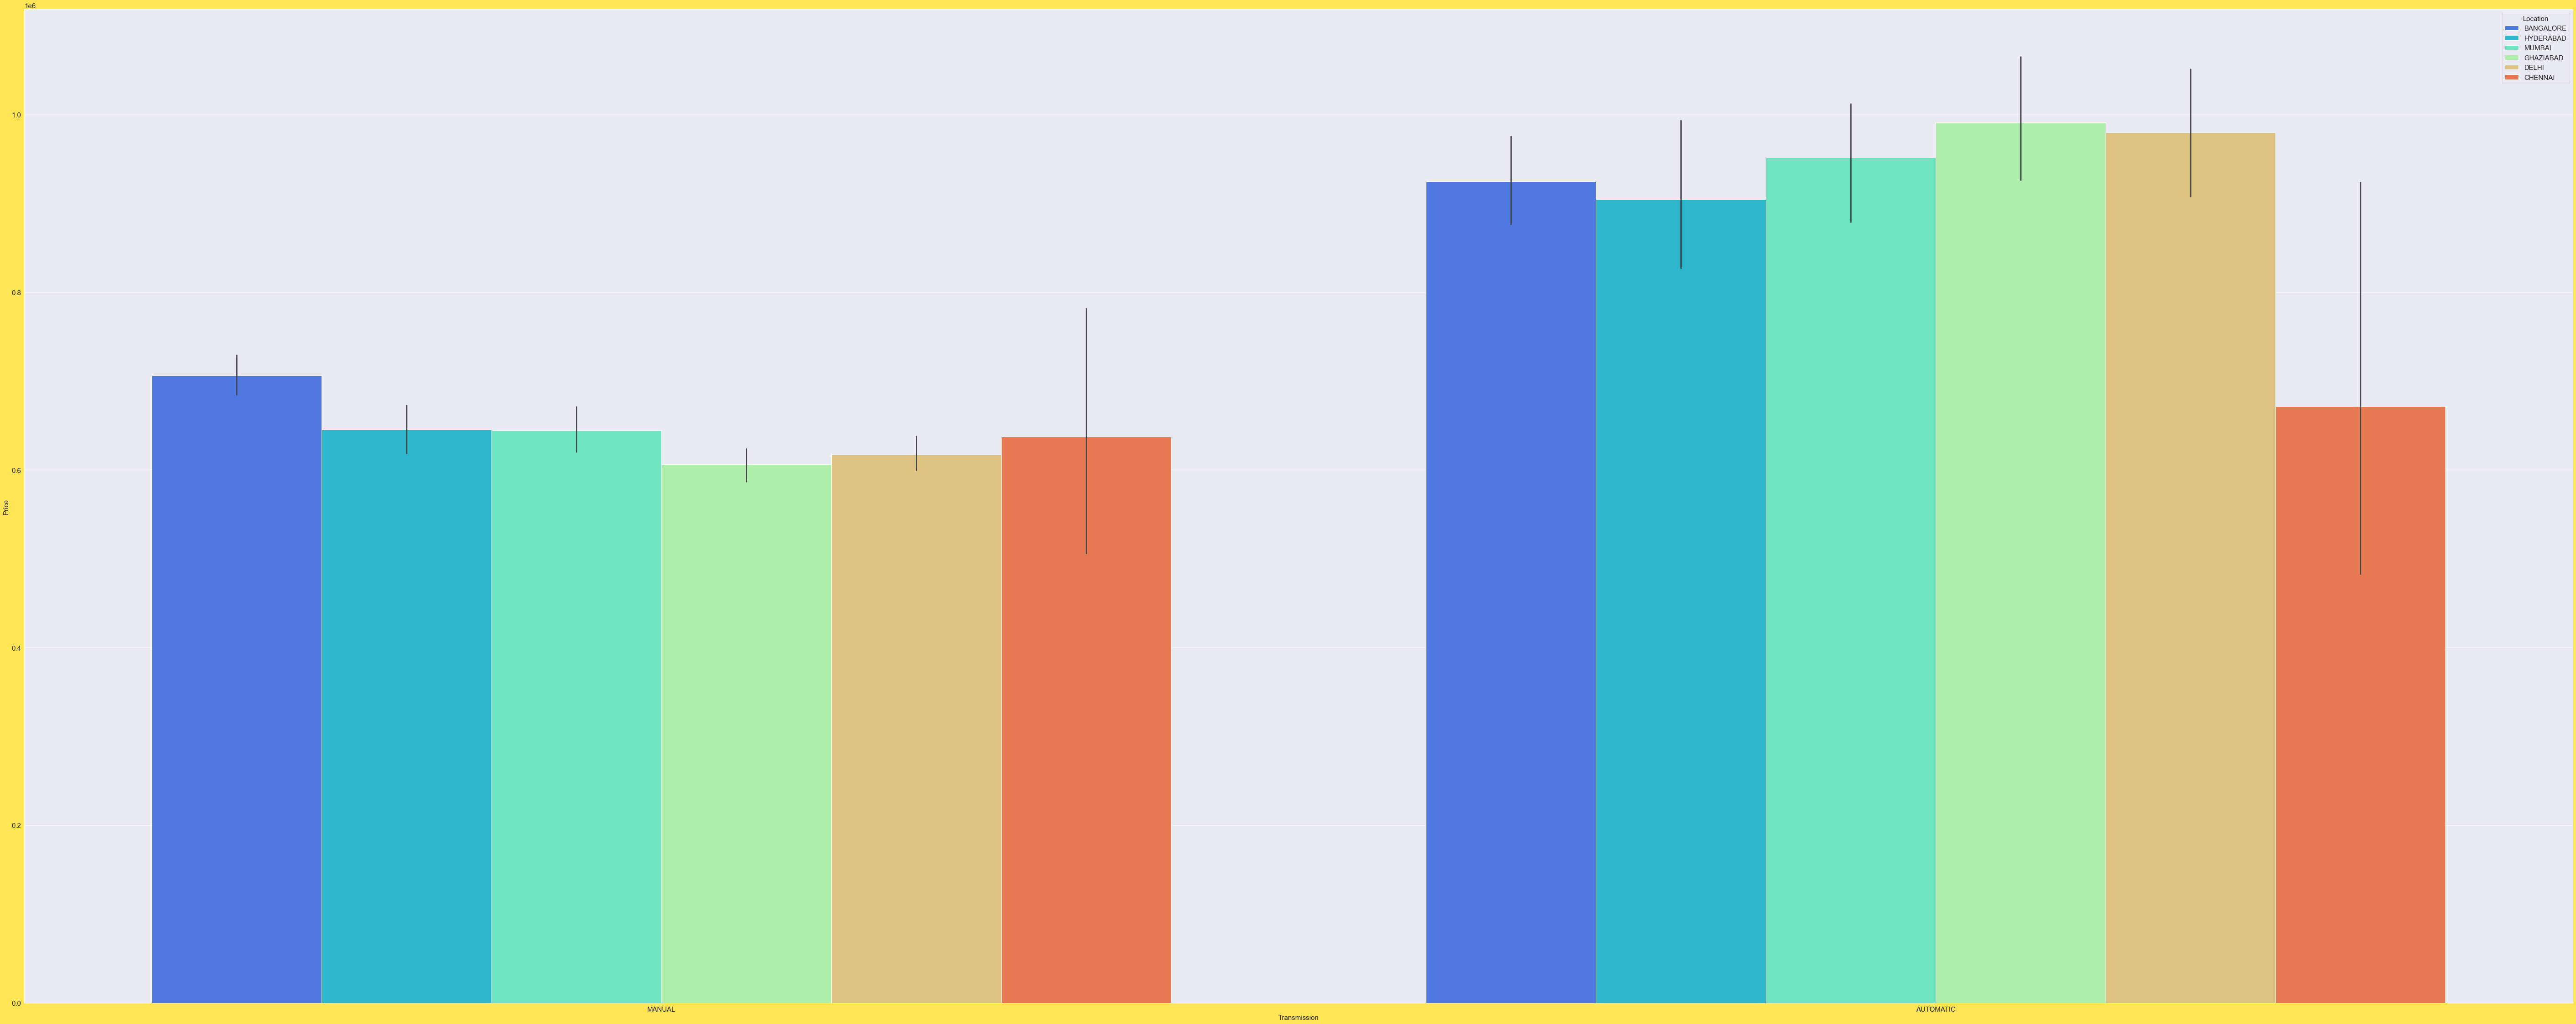

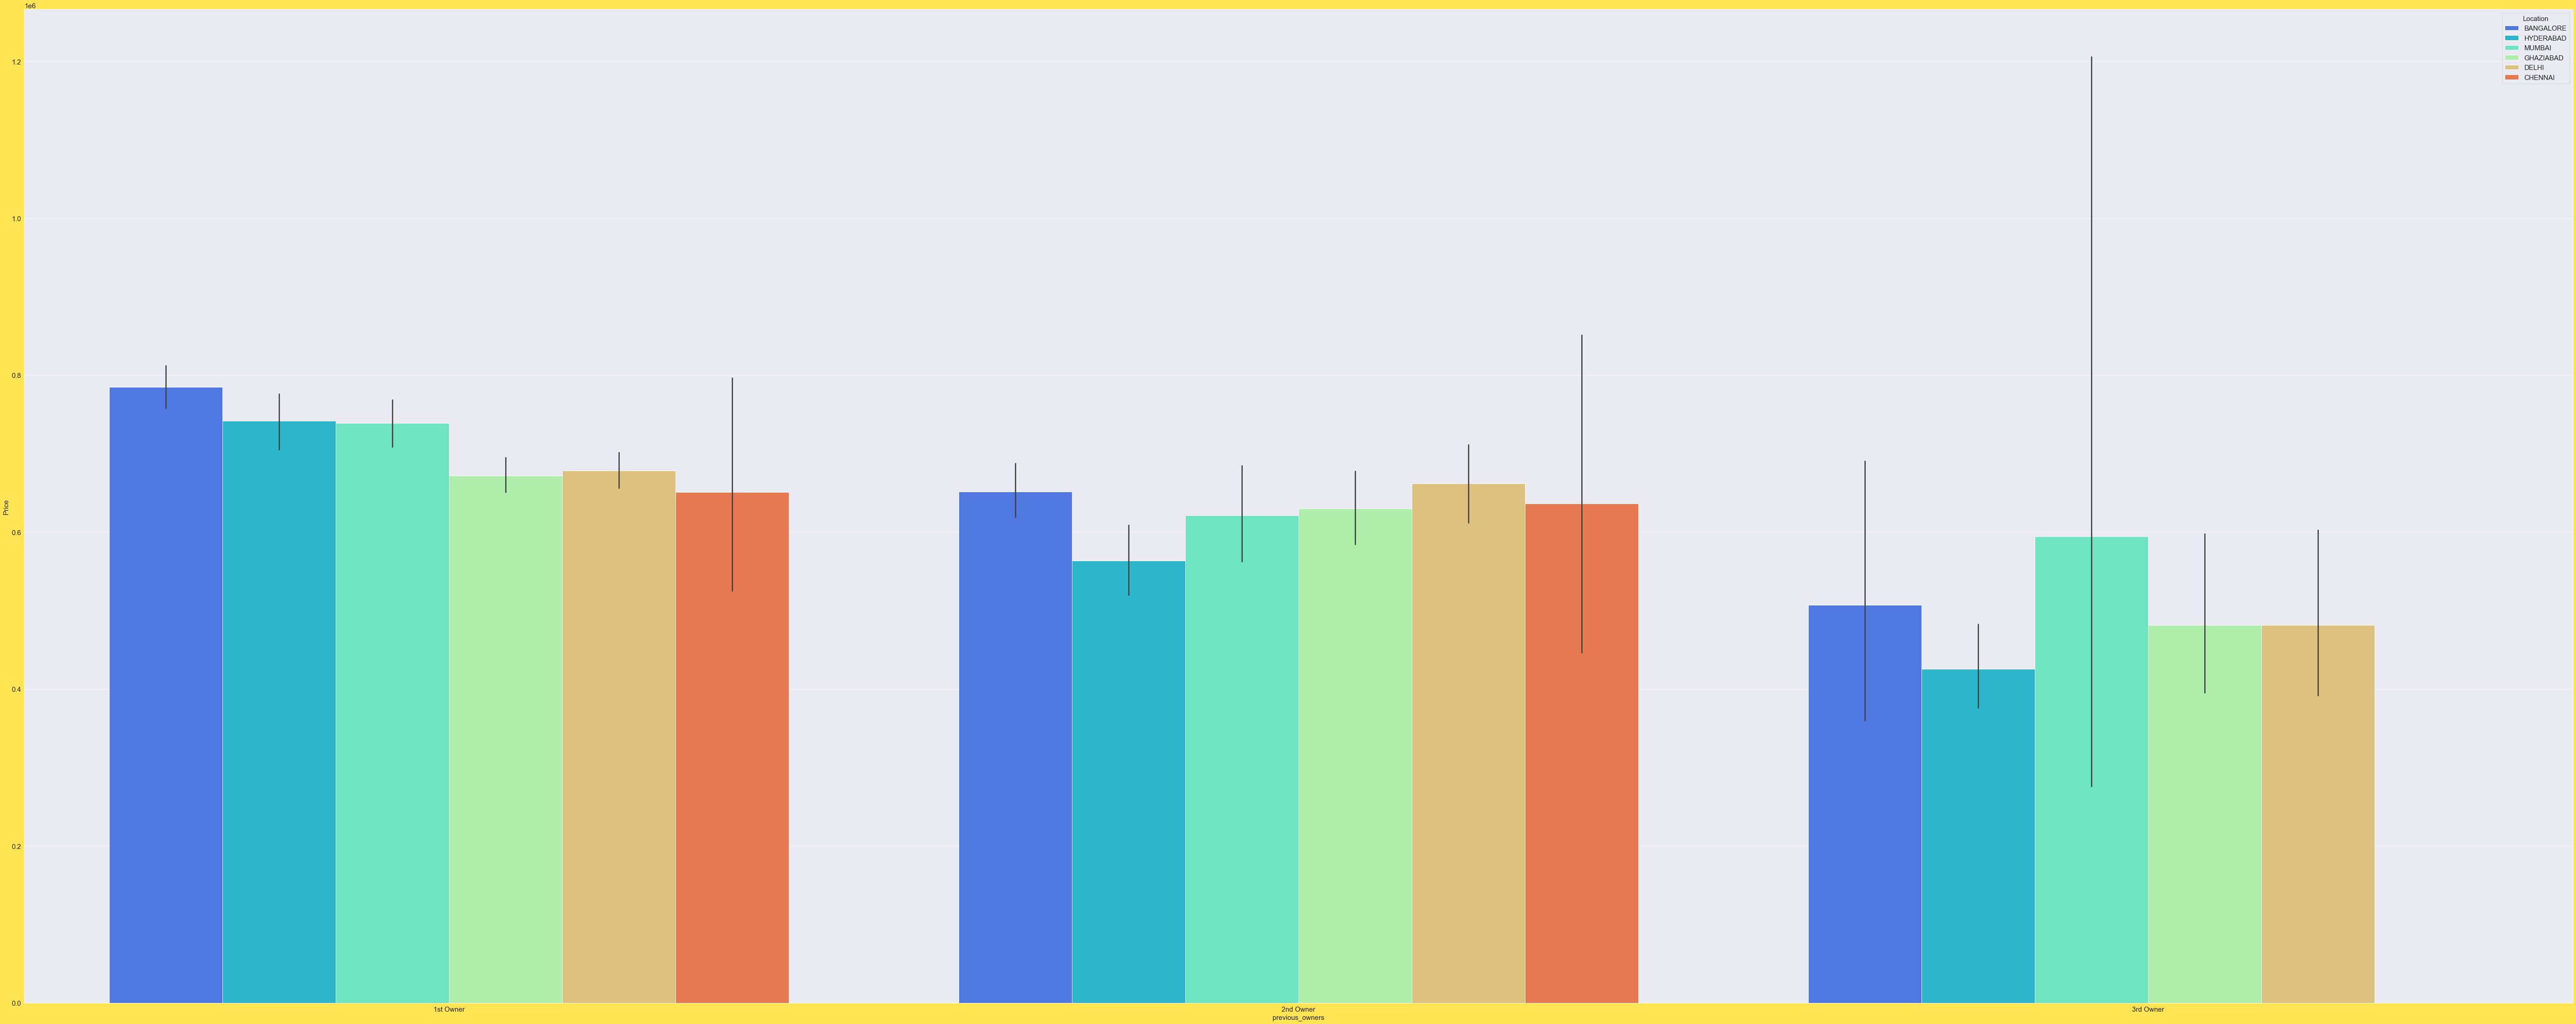

In [75]:
# plotting countplot to know the relationship of the cat features with its target Price
for i in cat_cols:
    plt.figure(figsize=(100,40))
    sns.barplot(x=df[i],y=df['Price'],hue='Location',data=df,palette='rainbow')
    plt.show()

Observations:-
    
-> Skoda brand cars have higher price in the market followed by MG,Jaguar and BMW.

-> Car prices in mumnbai are the highest while the same in delhi is very less, This makes sense because of that delhi is the          capital city and will have no import taxes.

-> The prices of diesel cars are significantly higher than that of petrol.

-> And the Automatic transmission vehicles are expensive than the manual ones.

-> As the number of past owners for a car increases the price also increases.

-> The most expensive car in this data is the Ford Endeavor in the city Hyderabad.
    


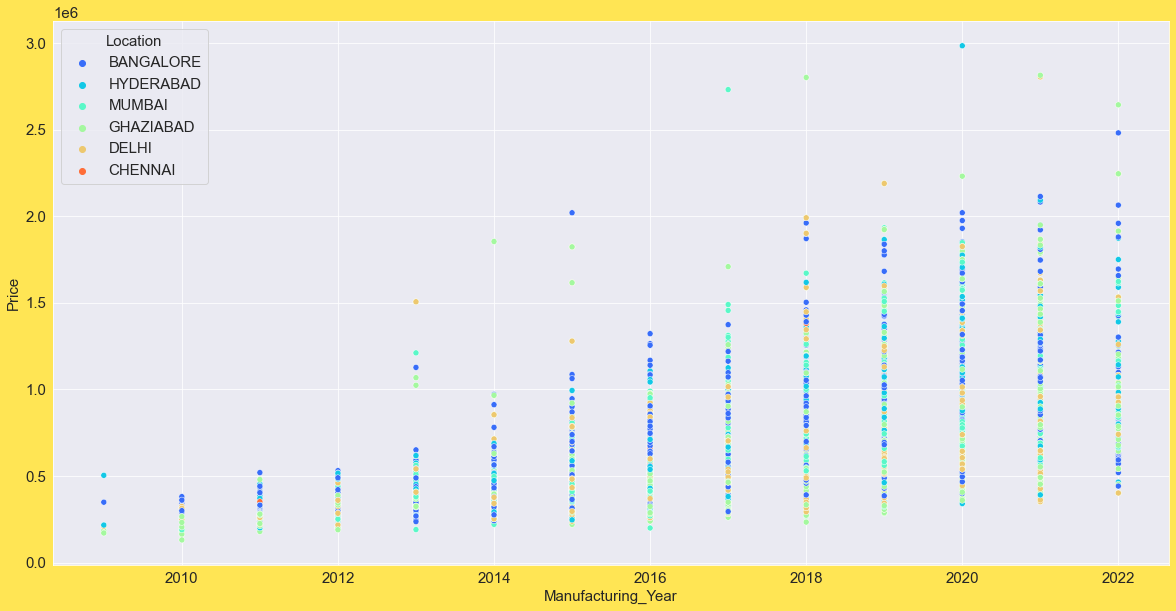

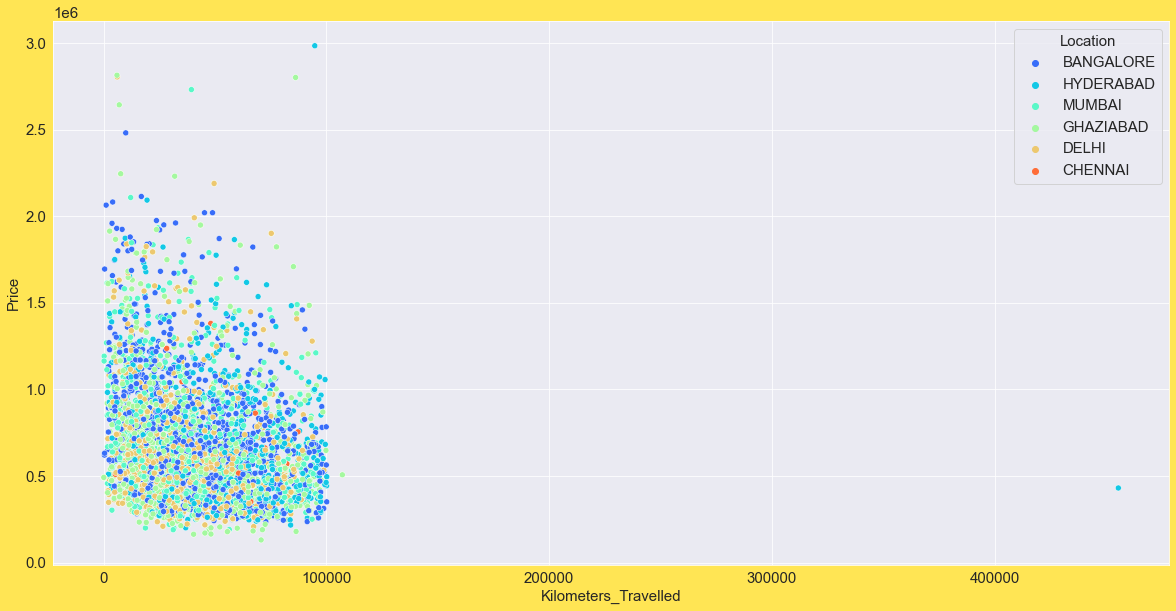

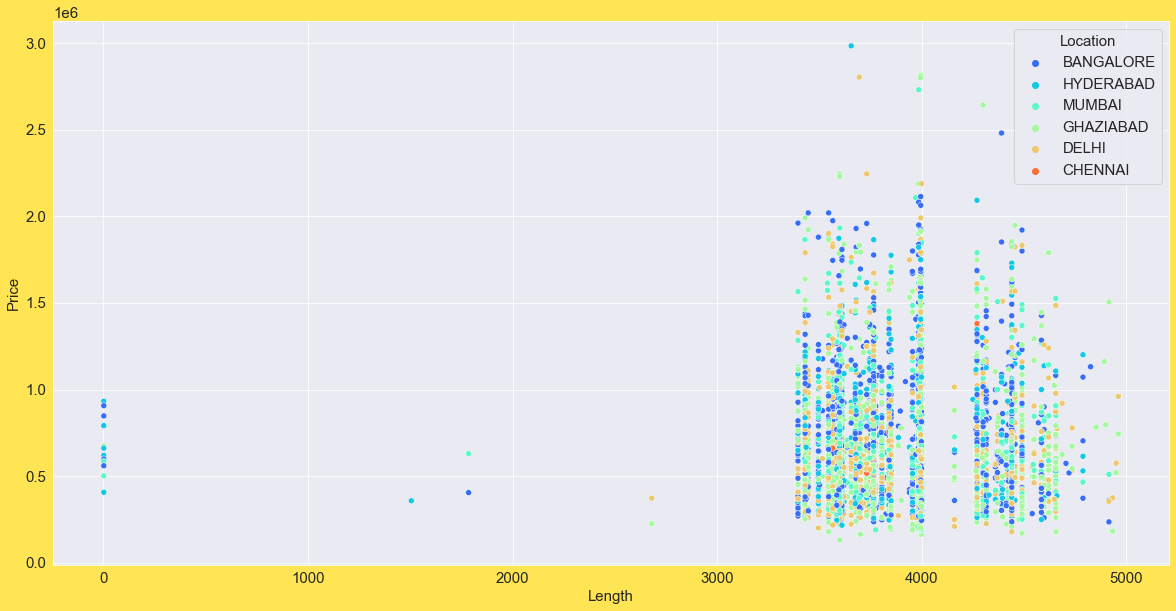

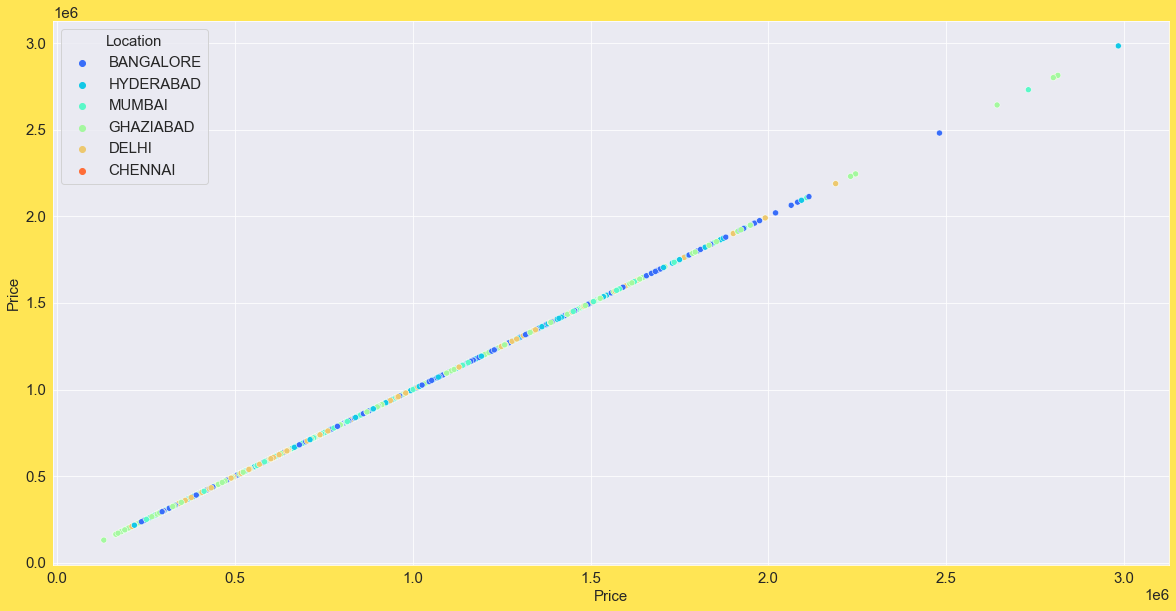

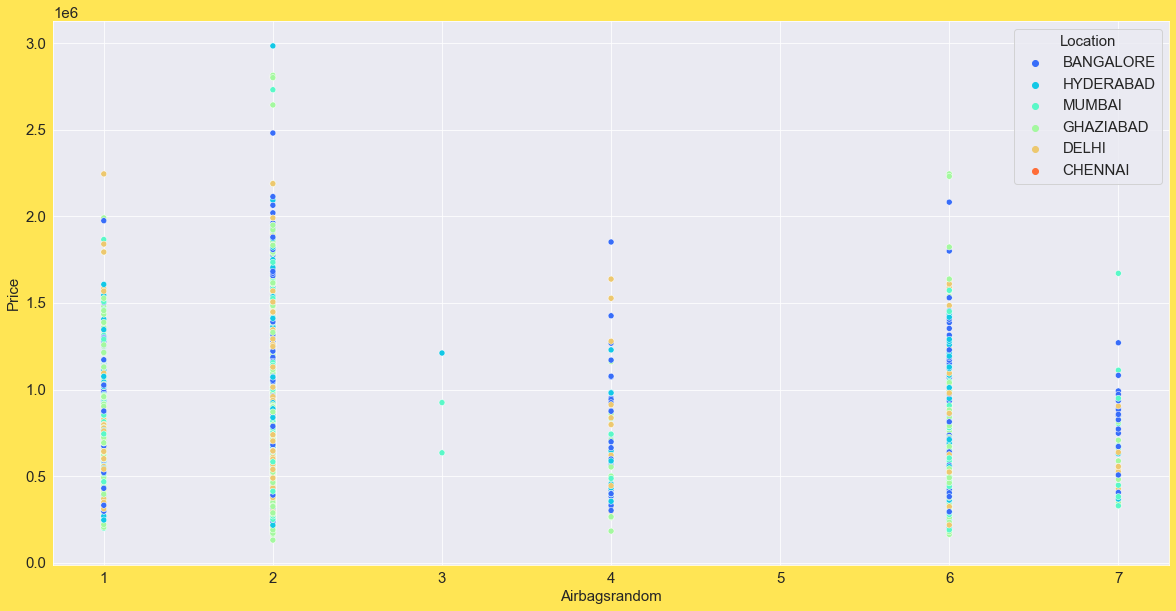

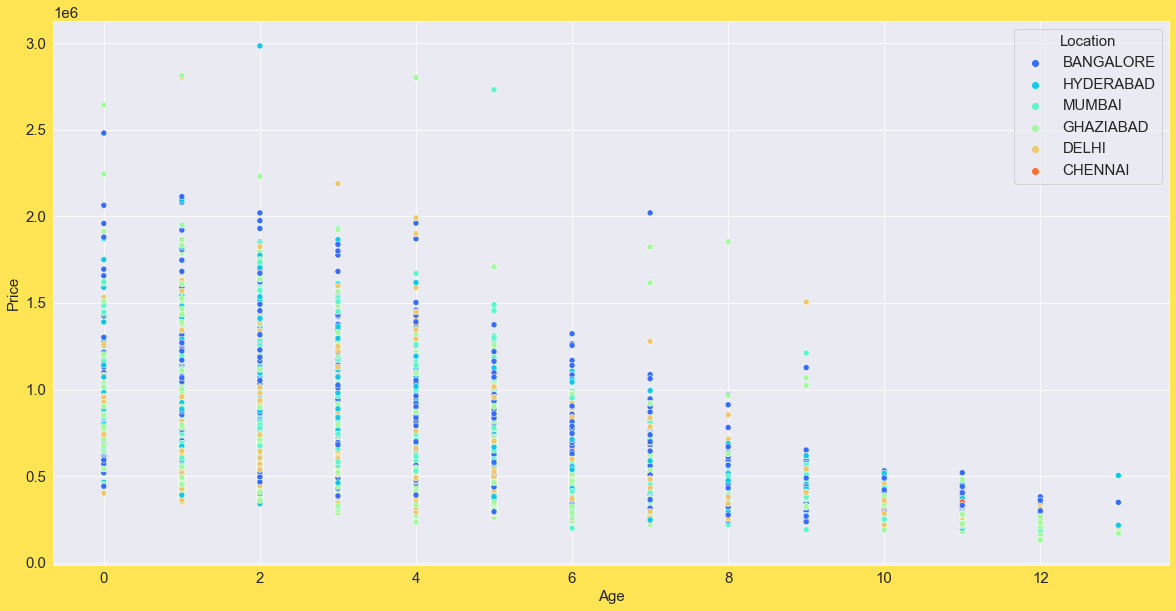

In [76]:
# plotting scatter plots to look at the pattern with respect to both the targets
# plotting barplots to see the patterns with both the target columns
for i in cont_cols:
    plt.figure(figsize=(20,10))
    sns.scatterplot(x=df[i],y=df['Price'],hue='Location',data=df,palette='rainbow')
    plt.show()

Observations:-
    
-> The most expensive car in the data was manufactured in the year 2020.

-> Most of the cars travelled under 1 lakh kilometers. However there is one car which belongs to chennai that has crossed 1 lakh kilometers distance.

-> As the length of the car increases the price does as well.

-> As the number of airbags increases the price will also does.

-> We can see the as the age of the car increases it is depreciated and the price reduced.

## Multivariate Analysis

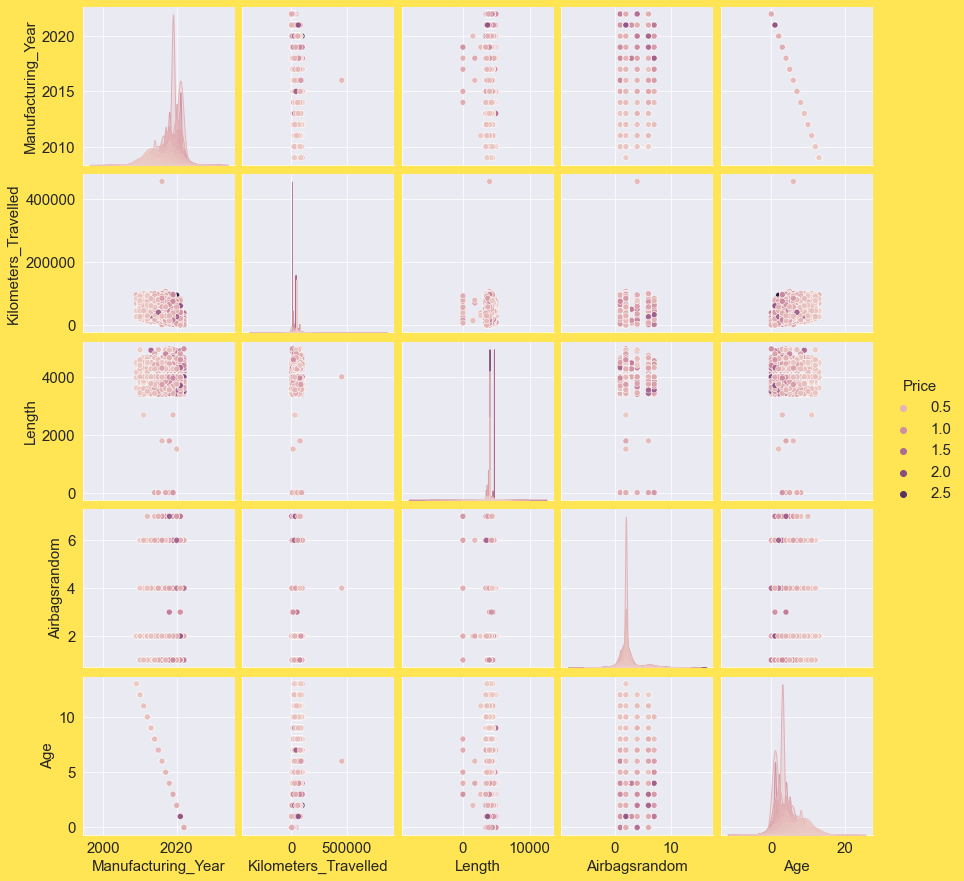

In [77]:
sns.pairplot(df,hue='Price')

# We can observe that the data is not very much skewed 
# However there can be outliers present in some columns

In [78]:
# We have used the manufacturing year column for analysis 
# Since we have already created the age feature out of it we don't need it for the model
# So let's drop it
df.drop(['Manufacturing_Year'],axis=1,inplace=True)

In [79]:
## drop the same from cont_cols as well
cont_cols.remove('Manufacturing_Year')

## Checking and treating the outliers 

In [86]:
df.columns

Index(['Car_Brand', 'Model', 'Variant', 'Location', 'Fuel_type',
       'Transmission', 'previous_owners', 'Kilometers_Travelled', 'Length',
       'Price', 'Airbagsrandom', 'Age'],
      dtype='object')

In [88]:
cont_cols

['Kilometers_Travelled', 'Length', 'Airbagsrandom', 'Age']

In [89]:
## Let's look at the outliers now
# creating a function for ploting outliers
def outlier_check(df,cont_cols):
    # creating a  copy of dataframe
    data = df[cont_cols].copy()
    # subplots 
    fig, axes = plt.subplots(nrows=len(data.columns)//2, ncols=2,figsize=(20,10))
    fig.subplots_adjust(hspace=0.7)
    
    # our main distplot
    for ax, feature in zip(axes.flatten(), data.columns):
        sns.boxplot(data[feature],ax=ax)
        ax.set_title(f'Outliers in {feature}')
    plt.show()

In [90]:
cont_cols

['Kilometers_Travelled', 'Length', 'Airbagsrandom', 'Age']

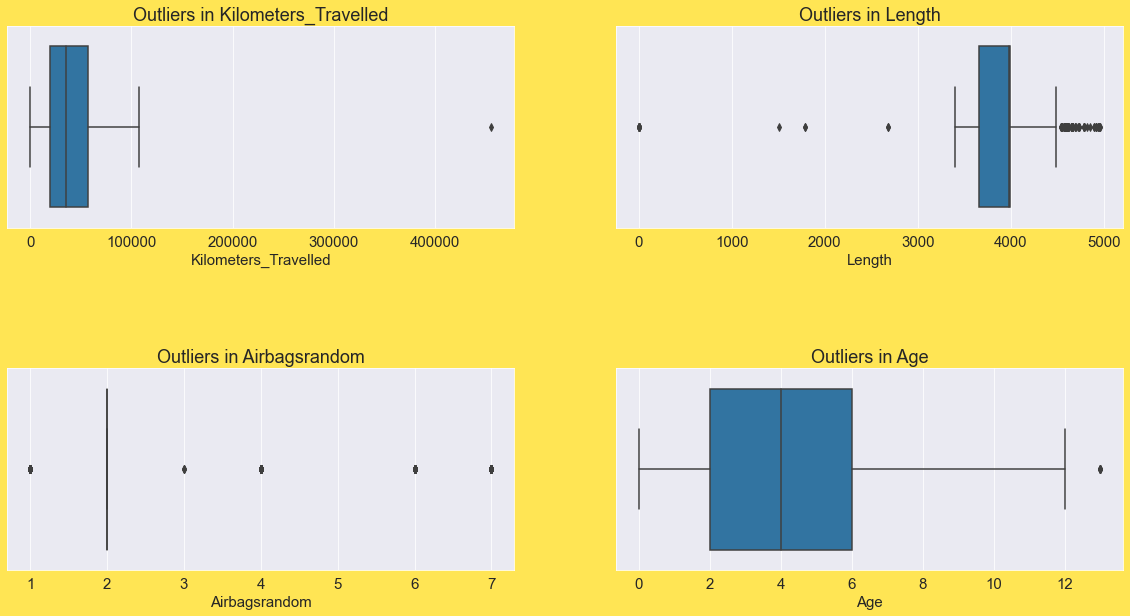

In [91]:
outlier_check(df,cont_cols)

# We can observe that there are outliers in these columns

In [92]:
# Removing the outliers using zscore method
# using zscore method
from scipy.stats import zscore
outlier_cols = df[cont_cols]
z=np.abs(zscore(outlier_cols))

print(np.where(z>3))

(array([  13,   18,   25,   47,  192,  310,  414,  451,  452,  454,  481,
        566,  893,  921,  945, 1089, 1137, 1191, 1310, 1310, 1334, 1520,
       1586, 1604, 1637, 1669, 1677, 1752, 1759, 1815, 1881, 1979, 1992,
       2063, 2126, 2131, 2199, 2322, 2357, 2444, 2563, 2728, 2903, 3073,
       3109, 3150, 3185, 3206, 3223, 3231, 3294, 3311, 3366, 3389, 3462,
       3577, 3824, 3909, 4003, 4132, 4147, 4149, 4180, 4208, 4259, 4375,
       4448], dtype=int64), array([2, 0, 3, 3, 1, 2, 2, 2, 2, 2, 2, 1, 3, 1, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 3, 1,
       2, 1, 2, 2, 2, 2, 1, 3, 2, 1, 2, 2, 1, 3, 2, 1, 1, 3, 2, 2, 2, 1,
       2], dtype=int64))


In [93]:
# removing outliers
df_new = df[(z<3).all(axis=1)]

In [94]:
# checking the % of dataloss after removing the outliers

print("shape before and after")
print("shape before: ",df.shape)
print("shape after: ",df_new.shape)
print("Percentage Loss: ",(df.shape[0]-df_new.shape[0])/df.shape[0]*100)

# We can see there is 1% data loss which is optimal

shape before and after
shape before:  (4581, 12)
shape after:  (4515, 12)
Percentage Loss:  1.4407334643091028


In [97]:
# Checking the outliers again
def outlier_check(df_new,cont_cols):
    # creating a  copy of dataframe
    data = df_new[cont_cols].copy()
    # subplots 
    fig, axes = plt.subplots(nrows=len(data.columns)//2, ncols=2,figsize=(20,10))
    fig.subplots_adjust(hspace=0.7)
    
    # our main distplot
    for ax, feature in zip(axes.flatten(), data.columns):
        sns.boxplot(data[feature],ax=ax)
        ax.set_title(f'Outliers in {feature}')
    plt.show()

In [98]:
outlier_check(df_new,cont_cols)

# We can see most of the outliers are removed

#### Now let's check the same with IQR method

In [96]:
Q1=outlier_cols.quantile(0.25)
Q3=outlier_cols.quantile(0.75)
IQR=Q3 - Q1

df_quant = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [99]:
# checking the % of dataloss after removing the outliers

print("shape before and after")
print("shape before: ",df.shape)
print("shape after: ",df_quant.shape)
print("Percentage Loss: ",(df.shape[0]-df_quant.shape[0])/df.shape[0]*100)

# We can see there is 24% data loss which is very high
# So we will chooose zscore method

shape before and after
shape before:  (4581, 12)
shape after:  (3465, 12)
Percentage Loss:  24.361493123772103


## Checking and Removing the Skewness

In [100]:
# Skewness
df_new.skew().sort_values()

Length                  0.492444
Kilometers_Travelled    0.508708
Age                     0.633583
Price                   1.498739
Airbagsrandom           2.474662
dtype: float64

In [101]:
# plotting a distribution plot to check the skewness visually
def skewness_check(df_new,cont_cols):
    # creating a  copy of dataframe
    data = df_new[cont_cols].copy()
    # subplots 
    fig, axes = plt.subplots(nrows=len(data.columns)//2, ncols=2,figsize=(15,20))
    fig.subplots_adjust(hspace=0.7)
    
    # our main distplot
    for ax, feature in zip(axes.flatten(), data.columns):
        sns.distplot(data[feature],ax=ax)
        ax.set_title(f'Distribution of {feature}')
    plt.show()

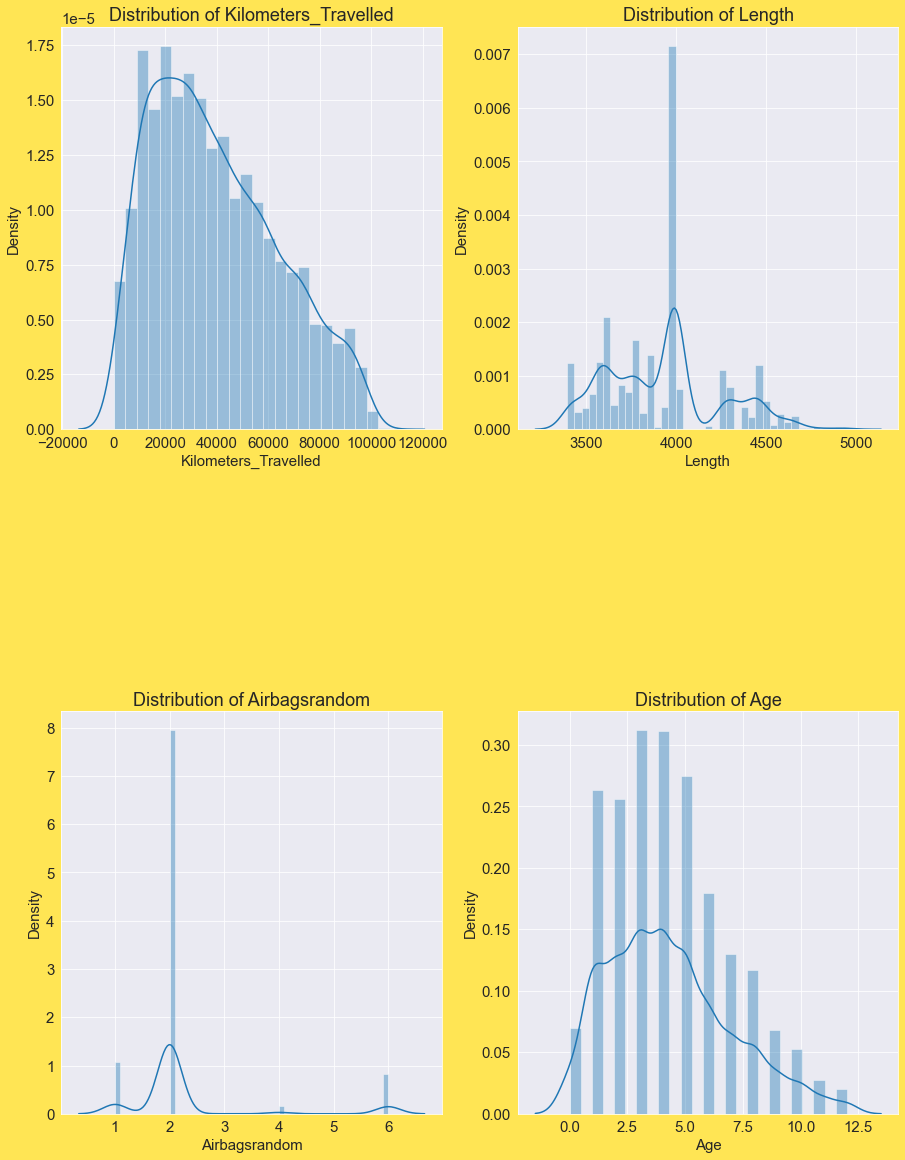

In [102]:
skewness_check(df_new,cont_cols)

# We can see there is high skewness in Airbags feature
# And the rest of the features are good

In [103]:
# using powertransformer method to remove skewness
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')

In [104]:
# fitting the power transformer 
df_new[cont_cols] = pt.fit_transform(df_new[cont_cols].values)

In [105]:
# checking skewness again
df_new.skew().sort_values()

# We can see that the skewness is removed off the features but not from the target

Airbagsrandom          -0.178160
Kilometers_Travelled   -0.107565
Age                    -0.042144
Length                  0.033347
Price                   1.498739
dtype: float64

In [106]:
# plotting a distribution plot to check the skewness visually
def skewness_check(df_new,cont_cols):
    # creating a  copy of dataframe
    data = df_new[cont_cols].copy()
    # subplots 
    fig, axes = plt.subplots(nrows=len(data.columns)//2, ncols=2,figsize=(15,20))
    fig.subplots_adjust(hspace=0.7)
    
    # our main distplot
    for ax, feature in zip(axes.flatten(), data.columns):
        sns.distplot(data[feature],ax=ax)
        ax.set_title(f'Distribution of {feature}')
    plt.show()

In [107]:
skewness_check(df_new,cont_cols)

# Now the skewness ahs been treated

In [108]:
# Now let's Encode the categorical columns using Label Encoding
# using Label Encoding encoding the categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat_cols:
    df_new[i] = le.fit_transform(df_new[i])

df_new.head(10) # checking the first 10 rows

# We can see that the data is encoded


Car_Brand  Model  Variant  Location  Fuel_type  Transmission  \
0         13     78      150         0          1             1   
1          6     34      181         0          1             1   
2         13     23      179         4          1             1   
3          6     60      120         0          1             1   
4          6     60      120         5          1             0   
5          6    107       29         3          2             1   
6         19     61      163         2          1             1   
7          6     29        6         0          1             1   
8          0      3        9         2          1             0   
9         13     78      150         2          1             1   

   previous_owners  Kilometers_Travelled    Length    Price  Airbagsrandom  \
0                0              1.009538 -1.978574   588000       0.035648   
1                0             -0.608207 -0.007567   789000       0.035648   
2                0             -0.991802  0.308993   640000       0.035648   
3                0              0.197345 -0.551440   501000       0.035648   
4                0             -1.136410  0.265574   574000       0.035648   
5                1              1.848177  1.400467   496000      -2.234547   
6                0             -0.583838  1.107303   721000       0.035648   
7                0              0.956337 -1.209173   821000       0.035648   
8                1              1.398089  1.552296  1823000       0.035648   
9                1              0.595041  0.265574   351000       0.035648   

        Age  
0  0.401253  
1 -0.357576  
2 -2.178430  
3 -0.357576  
4 -0.824579  
5  1.021256  
6  0.044438  
7  1.021256  
8  1.021256  
9  1.554979

## Correlation

In [109]:
df_new.corr().T

Car_Brand     Model   Variant  Location  Fuel_type  \
Car_Brand              1.000000  0.099119  0.105676  0.016826   0.016202   
Model                  0.099119  1.000000  0.013109 -0.035766  -0.068244   
Variant                0.105676  0.013109  1.000000 -0.018537   0.131178   
Location               0.016826 -0.035766 -0.018537  1.000000   0.096248   
Fuel_type              0.016202 -0.068244  0.131178  0.096248   1.000000   
Transmission          -0.059237 -0.011243  0.039602 -0.024144   0.075861   
previous_owners       -0.056301  0.036971 -0.010043 -0.066806  -0.033135   
Kilometers_Travelled  -0.128946 -0.014837 -0.014929  0.017047  -0.122587   
Length                -0.007011 -0.001451 -0.008136  0.004213   0.023192   
Price                  0.010068  0.083494 -0.103049 -0.039873  -0.288027   
Airbagsrandom         -0.013924  0.019790 -0.033166  0.002485  -0.013932   
Age                   -0.208567 -0.003173 -0.030249 -0.044455  -0.056934   

                      Transmission  previous_owners  Kilometers_Travelled  \
Car_Brand                -0.059237        -0.056301             -0.128946   
Model                    -0.011243         0.036971             -0.014837   
Variant                   0.039602        -0.010043             -0.014929   
Location                 -0.024144        -0.066806              0.017047   
Fuel_type                 0.075861        -0.033135             -0.122587   
Transmission              1.000000        -0.046284             -0.004617   
previous_owners          -0.046284         1.000000              0.161870   
Kilometers_Travelled     -0.004617         0.161870              1.000000   
Length                   -0.014016         0.026421              0.000297   
Price                    -0.336433        -0.108455             -0.217442   
Airbagsrandom             0.033138        -0.003259              0.023919   
Age                       0.079534         0.225237              0.597434   

                        Length     Price  Airbagsrandom       Age  
Car_Brand            -0.007011  0.010068      -0.013924 -0.208567  
Model                -0.001451  0.083494       0.019790 -0.003173  
Variant              -0.008136 -0.103049      -0.033166 -0.030249  
Location              0.004213 -0.039873       0.002485 -0.044455  
Fuel_type             0.023192 -0.288027      -0.013932 -0.056934  
Transmission         -0.014016 -0.336433       0.033138  0.079534  
previous_owners       0.026421 -0.108455      -0.003259  0.225237  
Kilometers_Travelled  0.000297 -0.217442       0.023919  0.597434  
Length                1.000000 -0.005754       0.076291  0.009531  
Price                -0.005754  1.000000       0.001605 -0.488265  
Airbagsrandom         0.076291  0.001605       1.000000  0.022405  
Age                   0.009531 -0.488265       0.022405  1.000000

In [110]:
# Now let's plot the heatmap
plt.figure(figsize=(30,15))
sns.heatmap(df_new.corr(),annot=True,linewidths=0.5,linecolor='black',fmt='.2f')

<AxesSubplot:>

In [111]:
# lets look at the correlation of features with respect to the target RainTomorrow
df_new.corr()['Price'].sort_values()

Age                    -0.488265
Transmission           -0.336433
Fuel_type              -0.288027
Kilometers_Travelled   -0.217442
previous_owners        -0.108455
Variant                -0.103049
Location               -0.039873
Length                 -0.005754
Airbagsrandom           0.001605
Car_Brand               0.010068
Model                   0.083494
Price                   1.000000
Name: Price, dtype: float64

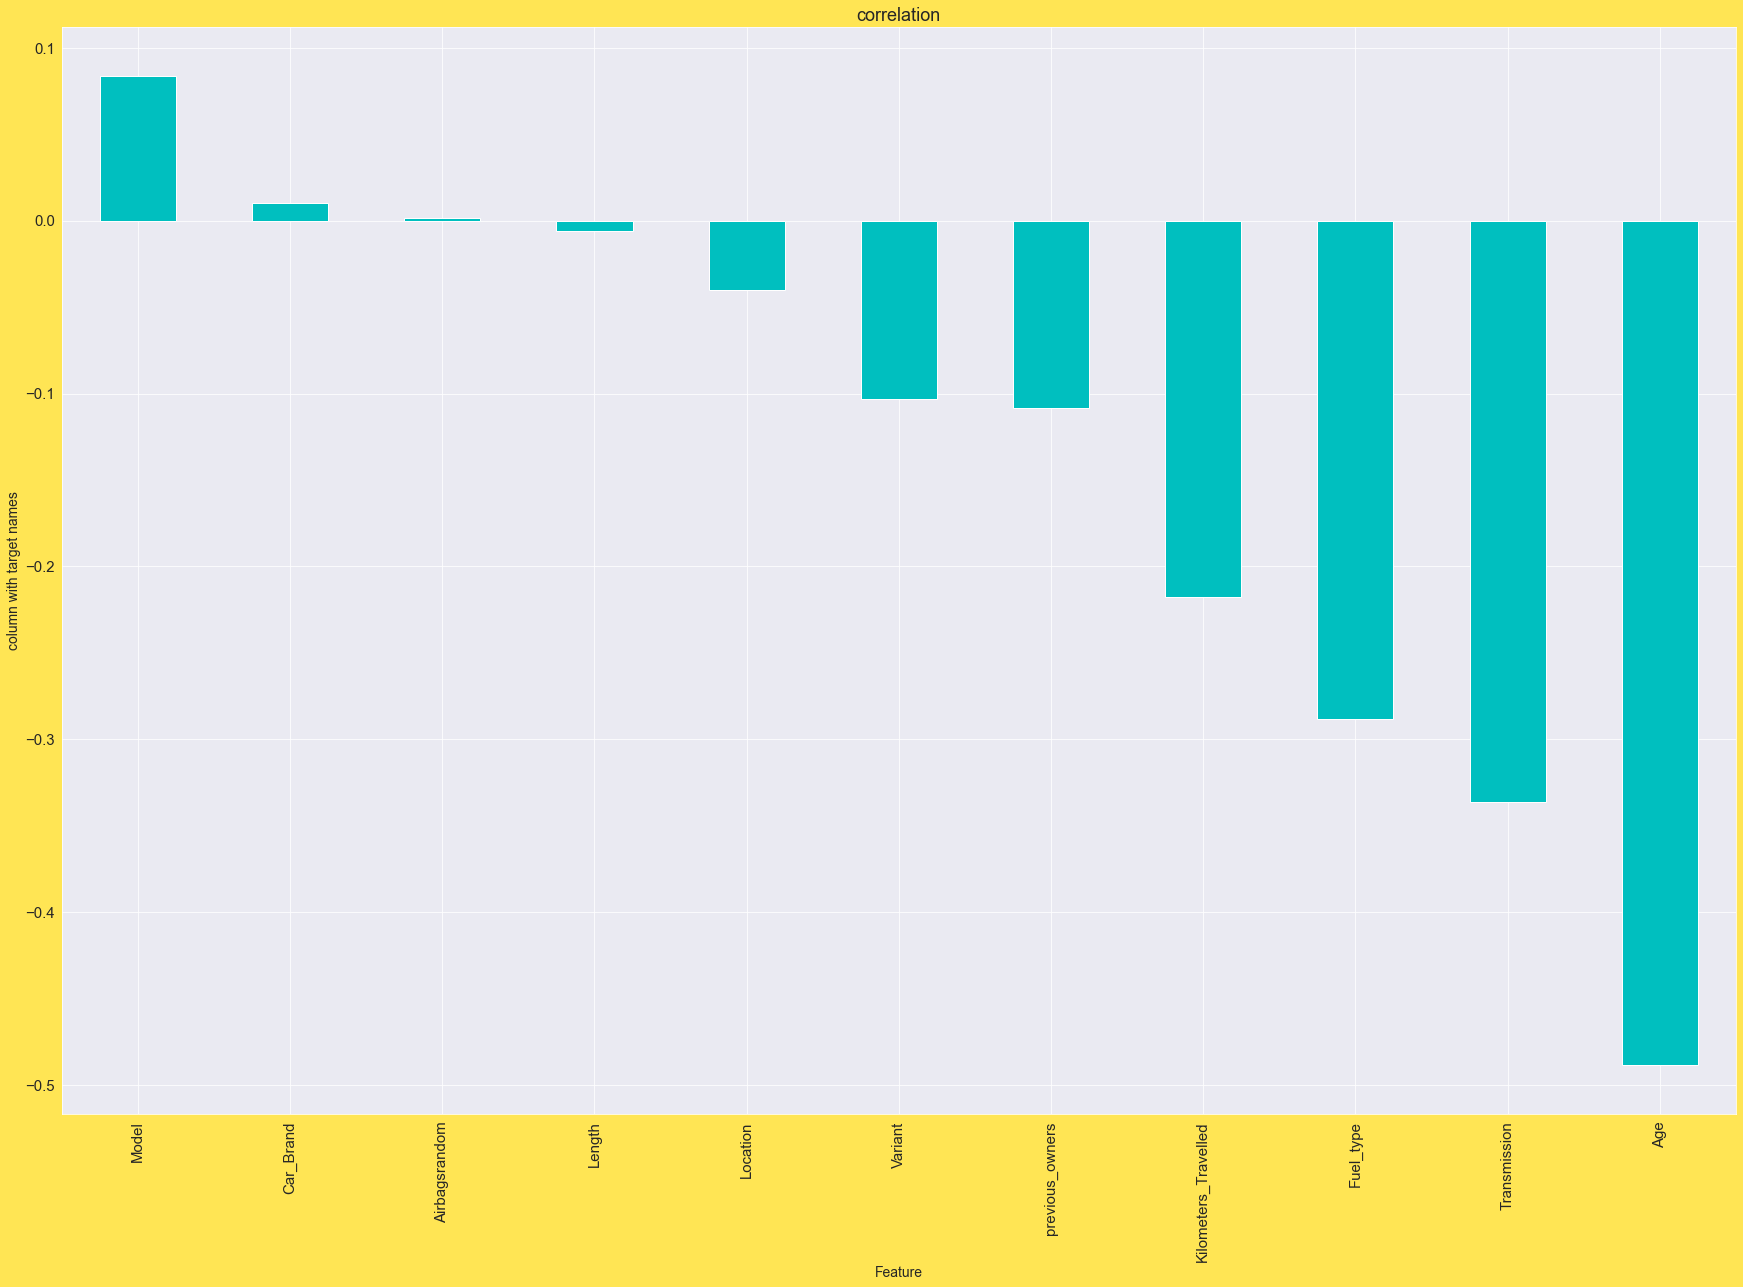

In [118]:
# plotting the same using a barplot
plt.figure(figsize=(30,20))
df_new.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

Observations:-
    
-> Airbagsrandom is the least correlated feature with the target Price.

-> Age is the highest correlated column.

## Seperating the features and target

In [119]:
x = df_new.drop(['Price'],axis=1)
y = df_new['Price']

In [120]:
# inorder to check the multicollinearity we have to scale the data
# importing StandardScaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x = pd.DataFrame(sc.fit_transform(x),columns=x.columns)

## Checking Multicolllinearity

In [121]:
# importing vif 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [122]:
def vif_calc():
    vif=pd.DataFrame()
    vif["vif_Features"]=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    vif["Features"]=x.columns
    return vif

In [123]:
vif_calc()

# We can see there is no multicollinearity in the features

vif_Features              Features
0       1.070008             Car_Brand
1       1.018601                 Model
2       1.033033               Variant
3       1.021589              Location
4       1.055966             Fuel_type
5       1.026121          Transmission
6       1.065549       previous_owners
7       1.589896  Kilometers_Travelled
8       1.007686                Length
9       1.009497         Airbagsrandom
10      1.664376                   Age

## Model Building

In [125]:
# importing the necessary models,metrics and the methods
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.linear_model import SGDRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,ExtraTreesRegressor


from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [126]:
# creating short instances of the models
lr = LinearRegression()

dtr = DecisionTreeRegressor()

knr = KNeighborsRegressor()

svr = SVR()

sgdr = SGDRegressor()

xgbr = XGBRegressor()

rfr = RandomForestRegressor()

abr = AdaBoostRegressor()

gbr = GradientBoostingRegressor()

## Linear Regression

In [129]:
# CHECKING THE RANDOM STATE FOR LINEAR REGRESSION
lr = LinearRegression()
for i in range(0,500):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=i)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1) == round(r2_score(y_test,pred_test)*100,1):
        print('At random state',i,'The model performs very well')
        print('At random state:-',i)
        print('Training r2 score is ', round(r2_score(y_train,pred_train)*100,1))
        print('Testing r2 score is ', round(r2_score(y_test,pred_test)*100,1), '\n\n')
        

At random state 83 The model performs very well
At random state:- 83
Training r2 score is  43.7
Testing r2 score is  43.7 


At random state 105 The model performs very well
At random state:- 105
Training r2 score is  43.7
Testing r2 score is  43.7 


At random state 149 The model performs very well
At random state:- 149
Training r2 score is  43.7
Testing r2 score is  43.7 


At random state 203 The model performs very well
At random state:- 203
Training r2 score is  43.7
Testing r2 score is  43.7 


At random state 221 The model performs very well
At random state:- 221
Training r2 score is  43.7
Testing r2 score is  43.7 


At random state 224 The model performs very well
At random state:- 224
Training r2 score is  43.7
Testing r2 score is  43.7 


At random state 258 The model performs very well
At random state:- 258
Training r2 score is  43.7
Testing r2 score is  43.7 


At random state 328 The model performs very well
At random state:- 328
Training r2 score is  43.7
Testing r2 scor

In [130]:
# selecting 149 as best random state
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=149)

In [131]:
lr.fit(x_train,y_train)
pred_lr = lr.predict(x_test)
print('Accuracy Score:-',r2_score(y_test,pred_lr))
print('Mean Squared Error:-',mean_squared_error(y_test,pred_lr))
print('Mean Absolute Error:-',mean_absolute_error(y_test,pred_lr))
print('Root Mean Squared Error',np.sqrt(mean_squared_error(y_test,pred_lr)))


# getting very least accuracy

Accuracy Score:- 0.436674328459685
Mean Squared Error:- 71583313711.97496
Mean Absolute Error:- 189990.6795087085
Root Mean Squared Error 267550.58159528446


In [132]:
# checking Cross Validation for linear regression
from sklearn.model_selection import cross_val_score
lrs = r2_score(y_test,pred_lr)

In [133]:
for i in range(5,15):
    lrcscore = cross_val_score(lr,x,y,cv=i)
    print(lrcscore)
    lsc = lrcscore.mean()
    print('At cv:- ',i)
    print('Cross validation score is:- ',lsc*100)
    print('r2_score is:- ',lrs*100)
    print('\n')

[0.44296232 0.41427813 0.44496825 0.43466996 0.42822106]
At cv:-  5
Cross validation score is:-  43.30199421072615
r2_score is:-  43.6674328459685


[0.42865121 0.4263175  0.42645962 0.46094773 0.4157479  0.4376515 ]
At cv:-  6
Cross validation score is:-  43.26292410888183
r2_score is:-  43.6674328459685


[0.44726524 0.41871488 0.44333847 0.42697959 0.45422975 0.43512014
 0.4133928 ]
At cv:-  7
Cross validation score is:-  43.41486966261699
r2_score is:-  43.6674328459685


[0.46601996 0.41426996 0.41281885 0.41048241 0.47462695 0.41900953
 0.44850074 0.41246942]
At cv:-  8
Cross validation score is:-  43.22747280458456
r2_score is:-  43.6674328459685


[0.45606602 0.43508331 0.38632243 0.44048358 0.45203823 0.44639101
 0.42588143 0.44350643 0.40911615]
At cv:-  9
Cross validation score is:-  43.276539780429616
r2_score is:-  43.6674328459685


[0.45869929 0.43286881 0.39345166 0.43940413 0.40137601 0.46932495
 0.4521388  0.41461853 0.45039391 0.40893543]
At cv:-  10
Cross validation

In [134]:
# selecting best cv 7
lrcscore_selected = cross_val_score(lr,x,y,cv=7).mean()
print('The cv score of Linear Regression is ',lrcscore_selected,'\nThe accuracy score of Linear Regression is: ',lrs)

# getting 43% accuracy with linear reg

The cv score of Linear Regression is  0.4341486966261699 
The accuracy score of Linear Regression is:  0.436674328459685


## DecisionTreeRegressor

#### Tuning the model

In [140]:
# creating parameter grid for dtr
param_grid_dtr = {'criterion':["squared_error", "friedman_mse", "absolute_error"],
             'splitter':["best", "random"],'max_depth':[2,8,10,None],'max_features':[0.25,0.5,1.0],'min_samples_split':[0.25,0.5,1.0]}

In [141]:
dtr_search = GridSearchCV(dtr,param_grid=param_grid_dtr,error_score='raise')

In [142]:
dtr_search.fit(x_train,y_train)

GridSearchCV(error_score='raise', estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [2, 8, 10, None],
                         'max_features': [0.25, 0.5, 1.0],
                         'min_samples_split': [0.25, 0.5, 1.0],
                         'splitter': ['best', 'random']})

In [143]:
print(dtr_search.best_score_)
print(dtr_search.best_estimator_)
print(dtr_search.best_params_)

# getting the bestparams

0.44112936785681744
DecisionTreeRegressor(max_depth=8, max_features=1.0, min_samples_split=0.25)
{'criterion': 'squared_error', 'max_depth': 8, 'max_features': 1.0, 'min_samples_split': 0.25, 'splitter': 'best'}


In [145]:
# Running the model with bestparams
dtr= DecisionTreeRegressor(criterion='squared_error',max_depth=8,max_features=1.0,min_samples_split=0.25,splitter='best') # using the best parameters
dtr.fit(x_train,y_train)
pred_dtr_test= dtr.predict(x_test)
pred_dtr_train = dtr.predict(x_train)
print('Training score of dtr',r2_score(pred_dtr_train,y_train))
print('Accuracy Score of dtr',r2_score(pred_dtr_test,y_test))
print('Mean Squared Error of dtr',mean_squared_error(pred_dtr_test,y_test))
print('Mean Absolute Error of dtr',mean_absolute_error(pred_dtr_test,y_test))
print('Root Mean Squared Error of dtr',np.sqrt(mean_squared_error(pred_dtr_test,y_test)))
print('\n')


Training score of dtr -0.2361571513432572
Accuracy Score of dtr -0.33081803314825353
Mean Squared Error of dtr 76292481108.72227
Mean Absolute Error of dtr 190837.51983612333
Root Mean Squared Error of dtr 276210.9358963223




In [149]:
# checking the cv score for dtr
from sklearn.model_selection import cross_val_score
dtra = r2_score(y_test,pred_dtr_test)
for i in range(5,15):
    dtrscore = cross_val_score(dtr,x,y,cv=i)
    print(dtrscore)
    dtrc = dtrscore.mean()
    print('At cv:- ',i)
    print('Cross validation score is:- ',dtrc*100)
    print('r2_score is:- ',dtra*100)
    print('\n') 

[0.42674875 0.3966905  0.41157256 0.42555332 0.41966965]
At cv:-  5
Cross validation score is:-  41.60469544851429
r2_score is:-  39.96154840362163


[0.41481042 0.40879931 0.36542042 0.46263456 0.39525824 0.41870388]
At cv:-  6
Cross validation score is:-  41.09378053969132
r2_score is:-  39.96154840362163


[0.43103351 0.40873461 0.39232924 0.39136379 0.44335607 0.40782603
 0.40732781]
At cv:-  7
Cross validation score is:-  41.171015387076096
r2_score is:-  39.96154840362163


[0.45735915 0.39202537 0.39232225 0.33607977 0.43709275 0.41064555
 0.40989238 0.39639369]
At cv:-  8
Cross validation score is:-  40.39763654706554
r2_score is:-  39.96154840362163


[0.4664325  0.39566256 0.39583402 0.37154025 0.4199064  0.44757788
 0.37467799 0.43790062 0.38966247]
At cv:-  9
Cross validation score is:-  41.10216303038336
r2_score is:-  39.96154840362163


[0.46610553 0.38241537 0.44234431 0.36835123 0.3300084  0.42265692
 0.43279803 0.39335427 0.42928107 0.40875782]
At cv:-  10
Cross valid

In [150]:
# selecting best cv = 14
dtrscore_selected = cross_val_score(dtr,x,y,cv=14).mean()
print('The cv score of DecisionTreeRegressor is ',dtrscore_selected,'\nThe accuracy score of DecisionTreeRegressor is: ',dtra)

# 39% from DTR

The cv score of DecisionTreeRegressor is  0.4062180949514739 
The accuracy score of DecisionTreeRegressor is:  0.3996154840362163


## KNeighborsRegressor

#### Tuning the model

In [153]:
# paramgrid for KNR
param_grid_knr = {'n_neighbors':[2,3,4,5,6,7,8,9,10],'weights':['uniform','distance'],'algorithm':['auto', 'ball_tree','kd_tree','brute'],'leaf_size':[25,30,35,40]}

In [154]:
knr_search = GridSearchCV(knr,param_grid=param_grid_knr)

In [155]:
knr_search.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [25, 30, 35, 40],
                         'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'weights': ['uniform', 'distance']})

In [156]:
# getting the best params 
print(knr_search.best_score_)
print(knr_search.best_estimator_)
print(knr_search.best_params_)

0.5245193469248607
KNeighborsRegressor(leaf_size=25, n_neighbors=8, weights='distance')
{'algorithm': 'auto', 'leaf_size': 25, 'n_neighbors': 8, 'weights': 'distance'}


In [158]:
# running the model with bestparams
knr = KNeighborsRegressor(algorithm='auto',leaf_size=25,n_neighbors=8,weights='distance')# using the best parameters
knr.fit(x_train,y_train)
pred_knr_test= knr.predict(x_test)
pred_knr_train = knr.predict(x_train)
print('Training score of knr',r2_score(pred_knr_train,y_train))
print('Accuracy Score of knr',r2_score(pred_knr_test,y_test))
print('Mean Squared Error of knr',mean_squared_error(pred_knr_test,y_test))
print('Mean Absolute Error of knr',mean_absolute_error(pred_knr_test,y_test))
print('Root Mean Squared Error of knr',np.sqrt(mean_squared_error(pred_knr_test,y_test)))
print('\n')

Training score of knr 1.0
Accuracy Score of knr -0.008340416921131633
Mean Squared Error of knr 58623890662.35908
Mean Absolute Error of knr 161065.60490651635
Root Mean Squared Error of knr 242123.70941805572




In [159]:
# checking the Cross Validation score
from sklearn.model_selection import cross_val_score
knra = r2_score(y_test,pred_knr_test)
for i in range(5,10):
    knrscore = cross_val_score(knr,x,y,cv=i)
    print(knrscore)
    knrc = knrscore.mean()
    print('At cv:- ',i)
    print('Cross validation score is:- ',knrc*100)
    print('r2_score is:- ',knra*100)
    print('\n') 

[0.54215544 0.55045003 0.52084807 0.56070713 0.54288676]
At cv:-  5
Cross validation score is:-  54.34094839059651
r2_score is:-  53.865865013517976


[0.53096731 0.57069571 0.54984027 0.54553373 0.50565742 0.54777891]
At cv:-  6
Cross validation score is:-  54.17455598815818
r2_score is:-  53.865865013517976


[0.56325027 0.52659394 0.5906522  0.48073737 0.59344264 0.5444531
 0.52476136]
At cv:-  7
Cross validation score is:-  54.627012606769576
r2_score is:-  53.865865013517976


[0.56049946 0.53186006 0.55652468 0.55949192 0.52703598 0.57558106
 0.53417291 0.5254705 ]
At cv:-  8
Cross validation score is:-  54.632957164447845
r2_score is:-  53.865865013517976


[0.54957282 0.55643351 0.55702869 0.56867187 0.51058953 0.58879407
 0.55304405 0.53441106 0.52962838]
At cv:-  9
Cross validation score is:-  54.97971081299844
r2_score is:-  53.865865013517976




In [160]:
# selecting best cv 9
knrscore_selected = cross_val_score(knr,x,y,cv=9).mean()
print('The cv score of KNeighborsRegressor is ',knrscore_selected,'\nThe accuracy score of KNeighborsRegressor is: ',knra)

# 54% accuracy

The cv score of KNeighborsRegressor is  0.5497971081299844 
The accuracy score of KNeighborsRegressor is:  0.5386586501351798


## SuportVectorRegressor

#### Tuning the model

In [161]:
# creating parametrs for svr
param_grid_svr = {'kernel':['linear', 'poly', 'rbf'],'degree':[4,5,6],'gamma':['scale','auto'],'coef0':[0.3,0.4,0.5]}

In [162]:
svr_search = GridSearchCV(svr,param_grid=param_grid_svr)

In [163]:
svr_search.fit(x_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'coef0': [0.3, 0.4, 0.5], 'degree': [4, 5, 6],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']})

In [164]:
print(svr_search.best_score_)
print(svr_search.best_estimator_)
print(svr_search.best_params_)
# getting the best params 

-0.0597816716794096
SVR(coef0=0.3, degree=4, kernel='linear')
{'coef0': 0.3, 'degree': 4, 'gamma': 'scale', 'kernel': 'linear'}


In [166]:
# using the best params
svr = SVR(coef0=0.3,degree=4,gamma='scale',kernel='linear')
svr.fit(x_train,y_train)
pred_svr_test= svr.predict(x_test)
pred_svr_train = svr.predict(x_train)
print('Training score of svr',r2_score(pred_svr_train,y_train))
print('Accuracy Score of svr',r2_score(pred_svr_test,y_test))
print('Mean Squared Error of svr',mean_squared_error(pred_svr_test,y_test))
print('Mean Absolute Error of svr',mean_absolute_error(pred_svr_test,y_test))
print('Root Mean Squared Error of svr',np.sqrt(mean_squared_error(pred_svr_test,y_test)))
print('\n')

Training score of svr -27853.186911941564
Accuracy Score of svr -29922.809794909204
Mean Squared Error of svr 136111463530.07611
Mean Absolute Error of svr 257609.52856884908
Root Mean Squared Error of svr 368932.87130598177




In [167]:
# checking cv score
from sklearn.model_selection import cross_val_score
svra = r2_score(y_test,pred_svr_test)
for i in range(5,10):
    svrscore = cross_val_score(svr,x,y,cv=i)
    print(svrscore)
    svrc = svrscore.mean()
    print('At cv:- ',i)
    print('Cross validation score is:- ',svrc*100)
    print('r2_score is:- ',svra*100)
    print('\n') 

[-0.06793001 -0.03032732 -0.05244002 -0.06825953 -0.06666548]
At cv:-  5
Cross validation score is:-  -5.712447105019902
r2_score is:-  -7.11306535197247


[-0.07890263 -0.02793947 -0.03366707 -0.07704287 -0.05470002 -0.07219451]
At cv:-  6
Cross validation score is:-  -5.740776055962208
r2_score is:-  -7.11306535197247


[-0.07113235 -0.03310592 -0.03890799 -0.06303091 -0.0581713  -0.05557779
 -0.07673171]
At cv:-  7
Cross validation score is:-  -5.666542415062154
r2_score is:-  -7.11306535197247


[-0.07941793 -0.02843778 -0.05357682 -0.02404608 -0.06701731 -0.06349341
 -0.04847167 -0.09354141]
At cv:-  8
Cross validation score is:-  -5.725030123483902
r2_score is:-  -7.11306535197247


[-0.07871373 -0.04036993 -0.03822636 -0.02937001 -0.06515376 -0.06837256
 -0.04781844 -0.04850099 -0.09526455]
At cv:-  9
Cross validation score is:-  -5.686559226155816
r2_score is:-  -7.11306535197247




Support Vector is not working properly 

## SGDRegressor

In [168]:
# paramgrid for sgdr
paramgrid_sgdr = {'loss':['squared_error','huber','epsilon_insensitive','squared_epsilon_insensitive'],'penalty':['l2', 'l1', 'elasticnet'],
                 'alpha':[0.01,0.001,0.0001,1,10],'l1_ratio':[0.15,0.30,0.45,0.75,1.0],'fit_intercept':[True,False],'max_iter':[1000,1200,1300,1500,1700,2000]}

In [169]:
sgdr_search = GridSearchCV(sgdr,param_grid=paramgrid_sgdr)

In [170]:
sgdr_search.fit(x_train,y_train)

GridSearchCV(estimator=SGDRegressor(),
             param_grid={'alpha': [0.01, 0.001, 0.0001, 1, 10],
                         'fit_intercept': [True, False],
                         'l1_ratio': [0.15, 0.3, 0.45, 0.75, 1.0],
                         'loss': ['squared_error', 'huber',
                                  'epsilon_insensitive',
                                  'squared_epsilon_insensitive'],
                         'max_iter': [1000, 1200, 1300, 1500, 1700, 2000],
                         'penalty': ['l2', 'l1', 'elasticnet']})

In [171]:
print(sgdr_search.best_score_)
print(sgdr_search.best_estimator_)
print(sgdr_search.best_params_)
# getting the best params

0.4334163891774672
SGDRegressor(alpha=0.001, l1_ratio=1.0, loss='squared_epsilon_insensitive',
             max_iter=1700, penalty='elasticnet')
{'alpha': 0.001, 'fit_intercept': True, 'l1_ratio': 1.0, 'loss': 'squared_epsilon_insensitive', 'max_iter': 1700, 'penalty': 'elasticnet'}


In [174]:
# using the best params
sgdr = SGDRegressor(alpha=0.001,l1_ratio=1.0, loss='squared_epsilon_insensitive',penalty='elasticnet',fit_intercept=True,max_iter=1700)
sgdr.fit(x_train,y_train)
pred_sgdr_test= sgdr.predict(x_test)
pred_sgdr_train = sgdr.predict(x_train)
print('Training score of sgdr',r2_score(pred_sgdr_train,y_train))
print('Accuracy Score of sgdr',r2_score(pred_sgdr_test,y_test))
print('Mean Squared Error of sgdr',mean_squared_error(pred_sgdr_test,y_test))
print('Mean Absolute Error of sgdr',mean_absolute_error(pred_sgdr_test,y_test))
print('Root Mean Squared Error of sgdr',np.sqrt(mean_squared_error(pred_sgdr_test,y_test)))
print('\n')

Training score of sgdr -0.3852520387533285
Accuracy Score of sgdr -0.45215572422120176
Mean Squared Error of sgdr 72349924889.54195
Mean Absolute Error of sgdr 190111.21662536458
Root Mean Squared Error of sgdr 268979.4135050895




In [175]:
# checking cv score
from sklearn.model_selection import cross_val_score
sgdra = r2_score(y_test,pred_sgdr_test)
for i in range(5,10):
    sgdrscore = cross_val_score(sgdr,x,y,cv=i)
    print(sgdrscore)
    sgdrc = sgdrscore.mean()
    print('At cv:- ',i)
    print('Cross validation score is:- ',sgdrc*100)
    print('r2_score is:- ',sgdra*100)
    print('\n') 

[0.43908874 0.41167637 0.44362822 0.43502826 0.42953491]
At cv:-  5
Cross validation score is:-  43.179130096678634
r2_score is:-  43.0641473398646


[0.42432407 0.42010564 0.42638618 0.45455936 0.41055437 0.43016904]
At cv:-  6
Cross validation score is:-  42.768310923742206
r2_score is:-  43.0641473398646


[0.44033689 0.40898428 0.43922018 0.42858879 0.45021946 0.43096937
 0.41578075]
At cv:-  7
Cross validation score is:-  43.05856738947657
r2_score is:-  43.0641473398646


[0.46076025 0.4134291  0.41233125 0.4074317  0.46981163 0.4154683
 0.44756472 0.41654488]
At cv:-  8
Cross validation score is:-  43.041772910713874
r2_score is:-  43.0641473398646


[0.45544204 0.43338387 0.38613019 0.44380174 0.44904534 0.44544582
 0.41830041 0.44360774 0.40836243]
At cv:-  9
Cross validation score is:-  43.15021752536631
r2_score is:-  43.0641473398646




In [176]:
# selecting best cv 6
sgdrscore_selected = cross_val_score(sgdr,x,y,cv=6).mean()
print('The cv score of SGDRegressor is ',sgdrscore_selected,'\nThe accuracy score of SGDRegressor is: ',sgdra)


The cv score of SGDRegressor is  0.43127379648802844 
The accuracy score of SGDRegressor is:  0.430641473398646


# Ensemble Methods

## RandomForestRegressor

In [184]:
#  paramgrid for RFR
param_grid_rfr = {'n_estimators':[x for x in range(100,200,10)],'criterion':["squared_error","absolute_error"],'min_samples_split':[2,4,6,7,0.18],
                 'max_features':["sqrt","log2",None]}

In [185]:
rfr_search = GridSearchCV(rfr,param_grid=param_grid_rfr)

In [186]:
rfr_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_split': [2, 4, 6, 7, 0.18],
                         'n_estimators': [100, 110, 120, 130, 140, 150, 160,
                                          170, 180, 190]})

In [187]:
print(rfr_search.best_score_)
print(rfr_search.best_estimator_)
print(rfr_search.best_params_)
# getting the best params

0.8811227522552709
RandomForestRegressor(max_features=None, min_samples_split=4, n_estimators=190)
{'criterion': 'squared_error', 'max_features': None, 'min_samples_split': 4, 'n_estimators': 190}


In [195]:
# running the model with best params
rfr = RandomForestRegressor(n_estimators=190,max_features=None,min_samples_leaf=4,min_samples_split=4,bootstrap=True,criterion='squared_error')
rfr.fit(x_train,y_train)
pred_rfr_test= rfr.predict(x_test) # 
pred_rfr_train = rfr.predict(x_train)
print('Training score of rfr',r2_score(pred_rfr_train,y_train))
print('Accuracy Score of rfr',r2_score(pred_rfr_test,y_test))
print('Mean Squared Error of rfr',mean_squared_error(pred_rfr_test,y_test))
print('Mean Absolute Error of rfr',mean_absolute_error(pred_rfr_test,y_test))
print('Root Mean Squared Error of rfr',np.sqrt(mean_squared_error(pred_rfr_test,y_test)))
print('\n')

Training score of rfr 0.9290757799496888
Accuracy Score of rfr 0.7855392557379507
Mean Squared Error of rfr 20910880884.847626
Mean Absolute Error of rfr 72338.73001696396
Root Mean Squared Error of rfr 144605.9503784254




In [199]:
# checking cv score
from sklearn.model_selection import cross_val_score
rfra = r2_score(y_test,pred_rfr_test)
for i in range(5,10):
    rfrscore = cross_val_score(rfr,x,y,cv=i)
    print(rfrscore)
    rfrc = rfrscore.mean()
    print('At cv:- ',i)
    print('Cross validation score is:- ',rfrc*100)
    print('r2_score is:- ',rfra*100)
    print('\n') 

[0.86191965 0.83696623 0.85597584 0.87570505 0.89484566]
At cv:-  5
Cross validation score is:-  86.5082486264646
r2_score is:-  83.54415937720728


[0.8727281  0.87708997 0.83244249 0.86975256 0.86305115 0.90534162]
At cv:-  6
Cross validation score is:-  87.00676472385105
r2_score is:-  83.54415937720728


[0.89482023 0.86897506 0.83081947 0.83182317 0.89612408 0.86140854
 0.90903883]
At cv:-  7
Cross validation score is:-  87.0429910177566
r2_score is:-  83.54415937720728


[0.90079142 0.86077054 0.81393187 0.8591775  0.88016511 0.88219084
 0.88066457 0.91390865]
At cv:-  8
Cross validation score is:-  87.39500632835133
r2_score is:-  83.54415937720728


[0.89535799 0.87357114 0.84902821 0.83655723 0.85804308 0.86447142
 0.89993831 0.85938404 0.91097812]
At cv:-  9
Cross validation score is:-  87.19255054687794
r2_score is:-  83.54415937720728




In [200]:
# selecting best cv = 5
rfrscore_selected = cross_val_score(rfr,x,y,cv=5).mean()
print('The cv score of RandomForestRegressor is ',rfrscore_selected,'\nThe accuracy score of RandomForestRegressor is: ',rfra)

# 83% accuracy

The cv score of RandomForestRegressor is  0.8662683750704223 
The accuracy score of RandomForestRegressor is:  0.8354415937720728


## AdaBoostRegressor

In [201]:
# creating parametergrid for AdaBoostR
param_grid_abr = {'loss':['linear', 'square', 'exponential'],'n_estimators':[50,60,80,70,90],'learning_rate':[0.5,1.5,1.0]}

In [202]:
abr_search = GridSearchCV(abr,param_grid=param_grid_abr)

In [203]:
abr_search.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.5, 1.5, 1.0],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 60, 80, 70, 90]})

In [204]:
print(abr_search.best_score_)
print(abr_search.best_estimator_)
print(abr_search.best_params_)

# getting the best params

0.44104913477843855
AdaBoostRegressor(learning_rate=0.5, loss='exponential')
{'learning_rate': 0.5, 'loss': 'exponential', 'n_estimators': 50}


In [207]:
# using the best params
abr = AdaBoostRegressor(learning_rate=0.5,loss='exponential',n_estimators=50)
abr.fit(x_train,y_train)
pred_abr_test= abr.predict(x_test)
pred_abr_train = abr.predict(x_train)
print('Training score of abr',r2_score(pred_abr_train,y_train))
print('Accuracy Score of abr',r2_score(pred_abr_test,y_test))
print('Mean Squared Error of abr',mean_squared_error(pred_abr_test,y_test))
print('Mean Absolute Error of abr',mean_absolute_error(pred_abr_test,y_test))
print('Root Mean Squared Error of abr',np.sqrt(mean_squared_error(pred_abr_test,y_test)))
print('\n')

Training score of abr -0.3113356569795247
Accuracy Score of abr -0.4294114119922747
Mean Squared Error of abr 70497638952.91711
Mean Absolute Error of abr 214798.07304021507
Root Mean Squared Error of abr 265513.91480093304




In [208]:
# checking cv score
from sklearn.model_selection import cross_val_score
abra = r2_score(y_test,pred_abr_test)
for i in range(5,10):
    abrscore = cross_val_score(abr,x,y,cv=i)
    print(abrscore)
    abrc = abrscore.mean()
    print('At cv:- ',i)
    print('Cross validation score is:- ',abrc*100)
    print('r2_score is:- ',abra*100)
    print('\n') 

[0.46014981 0.39970624 0.38201964 0.46686786 0.37193738]
At cv:-  5
Cross validation score is:-  41.61361860818631
r2_score is:-  44.52180578710034


[0.45788626 0.36383049 0.36571802 0.49553445 0.40212041 0.35314131]
At cv:-  6
Cross validation score is:-  40.63718213045044
r2_score is:-  44.52180578710034


[0.40410167 0.43612035 0.43307366 0.3977678  0.4562846  0.40425746
 0.35793019]
At cv:-  7
Cross validation score is:-  41.279081855683245
r2_score is:-  44.52180578710034


[0.44002818 0.41721441 0.41936088 0.25668868 0.50874979 0.4599149
 0.37093061 0.39183328]
At cv:-  8
Cross validation score is:-  40.80900909160539
r2_score is:-  44.52180578710034


[0.44369164 0.44422806 0.375806   0.35034619 0.4063692  0.50476217
 0.40830136 0.37717835 0.39439053]
At cv:-  9
Cross validation score is:-  41.16748346087912
r2_score is:-  44.52180578710034




In [209]:
# selecting best cv 9
abrscore_selected = cross_val_score(abr,x,y,cv=9).mean()
print('The cv score of AdaBoostRegressor is ',abrscore_selected,'\nThe accuracy score of AdaBoostRegressor is: ',abra)


The cv score of AdaBoostRegressor is  0.4003470693306528 
The accuracy score of AdaBoostRegressor is:  0.44521805787100344


## Model Selection

In [210]:
models = pd.DataFrame({'Model Name':['Linear Regression','DecisionTreeRegressor','RandomForestRegressor','AdaBoostRegressor','KNeighborsRegressor','SGDRegressor'],
                       'Accuracy':[lrs,dtra,rfra,abra,knra,sgdra],
                       'CV_Score':[lrcscore_selected,dtrscore_selected,rfrscore_selected,abrscore_selected,knrscore_selected,sgdrscore_selected]})
models

Model Name  Accuracy  CV_Score
0      Linear Regression  0.436674  0.434149
1  DecisionTreeRegressor  0.399615  0.406218
2  RandomForestRegressor  0.835442  0.866268
3      AdaBoostRegressor  0.445218  0.400347
4    KNeighborsRegressor  0.538659  0.549797
5           SGDRegressor  0.430641  0.431274

We can see that RandomForestRegressor is giving more accuracy

## Saving the Model

In [211]:
# saving rfr as our best model
import pickle
filename='car_price.pred'
pickle.dump(rfr,open(filename,'wb'))

In [212]:
import numpy as np
a = np.array(y_test)
predicted = np.array(dtr.predict(x_test))
df_com = pd.DataFrame({'Original':a,'Predicted':predicted},index = range(len(a)))
df_com.sample(20)
# comparison of predicted and original value

Original     Predicted
214    1063000  8.290750e+05
802     627000  1.061345e+06
465     601000  8.290750e+05
28      796000  1.098141e+06
1161    736000  5.613399e+05
809     622000  5.613399e+05
837     365300  3.757549e+05
469     741000  5.613399e+05
700     342000  8.290750e+05
734     568000  3.757549e+05
530    1154000  1.098141e+06
404     377000  3.757549e+05
637     391000  3.757549e+05
325     469000  1.061345e+06
35      510000  5.613399e+05
1201    535000  1.061345e+06
990     456000  5.613399e+05
1293    372000  3.757549e+05
905     595000  6.501936e+05
387     362000  5.613399e+05